In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/prosperLoanData.csv")
pd.set_option('display.max_columns', None)
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [3]:
df.shape

(113937, 81)

In [7]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  Tot

In [9]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

# Handling the target class

A loan that reached past due 121 days ago or charged off is considered defaulted.

In [15]:
df['LoanStatus'] = df['LoanStatus'].replace(['Chargedoff', 'Past Due (>120 days)'], ['Defaulted','Defaulted'])

In [16]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Past Due (16-30 days)', 'Cancelled', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress'], dtype=object)

In [18]:
df['LoanStatus'] = df['LoanStatus'].replace(['Completed' , 'Past Due (1-15 days)', 
       'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)','Cancelled'], ['Non-Defaulted','Non-Defaulted','Non-Defaulted','Non-Defaulted','Non-Defaulted','Non-Defaulted','Non-Defaulted',])  

In [23]:
non_null_ind = []
for i in df['ClosedDate']:
    if pd.isnull(i):
        continue
    else:
      non_null_ind.append(i)     

In [25]:
for i in non_null_ind:
  df.loc[i,'LoanStatus']='Non-Defaulted'

In [26]:
non_deliquent_ind = []
for i in df['LoanCurrentDaysDelinquent']:
    if i>=180:
      non_deliquent_ind.append(i)    

In [28]:
for i in non_deliquent_ind:
  df.loc[i,'LoanStatus']='Defaulted'

In [30]:
df['LoanStatus'].unique()


'Non-DefaultedCurrentDefaultedFinalPaymentInProgress'

In [31]:
df['LoanStatus'] = df['LoanStatus'].replace(['Current', 'FinalPaymentInProgress'], ['Non-Defaulted','Non-Defaulted'])

In [34]:
df['LoanStatus'].value_counts()

Non-Defaulted    97804
Defaulted        18935
Name: LoanStatus, dtype: int64

Dropping the unneeded columns:

In [35]:
df.drop(columns=["ListingKey","ListingNumber","GroupKey","LoanKey","LoanNumber","MemberKey","DateCreditPulled"],inplace= True )

In [36]:
df.shape

(116739, 74)

# Handling missing values

In [37]:
nulls=df.isnull().sum()
print(nulls)

ListingCreationDate                     2802
CreditGrade                            87786
Term                                    2802
LoanStatus                                 0
ClosedDate                             61650
BorrowerAPR                             2827
BorrowerRate                            2802
LenderYield                             2802
EstimatedEffectiveYield                31886
EstimatedLoss                          31886
EstimatedReturn                        31886
ProsperRating (numeric)                31886
ProsperRating (Alpha)                  31886
ProsperScore                           31886
ListingCategory (numeric)               2802
BorrowerState                           8317
Occupation                              6390
EmploymentStatus                        5057
EmploymentStatusDuration               10427
IsBorrowerHomeowner                     2802
CurrentlyInGroup                        2802
CreditScoreRangeLower                   3393
CreditScor

In [39]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


GridSpec(6, 6)

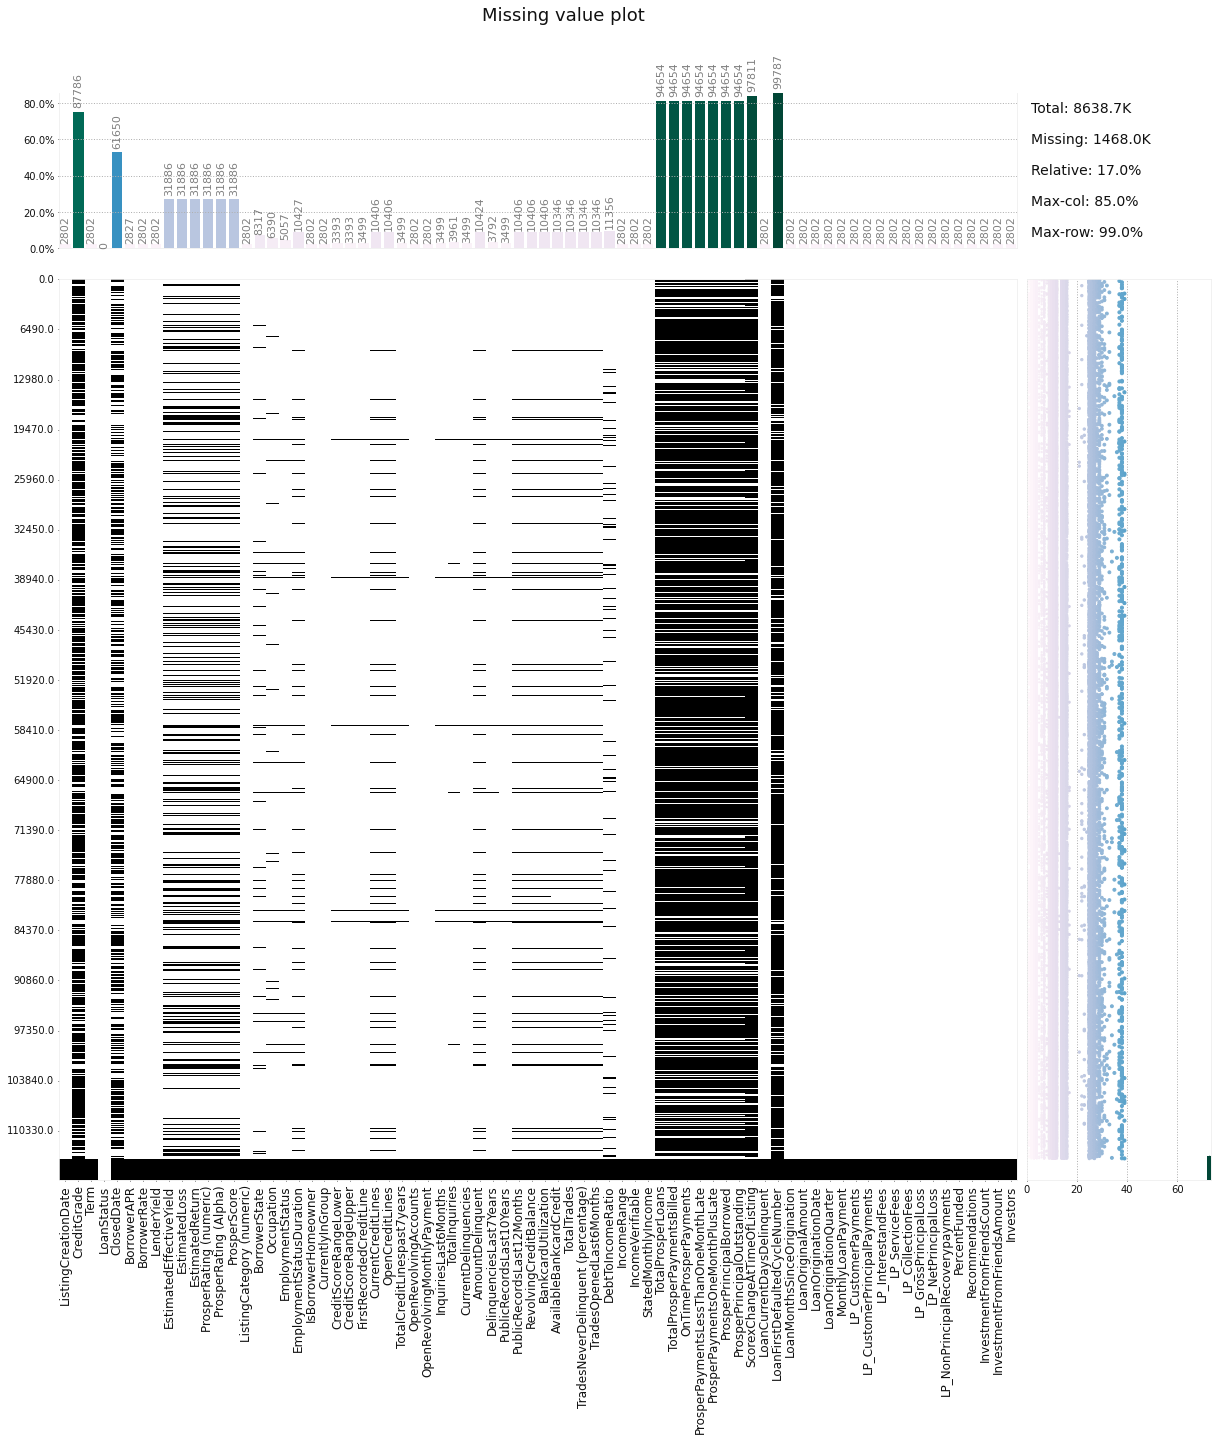

In [41]:
import klib
klib.missingval_plot(df)

In [42]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

cat_cols = df.select_dtypes(include=['category','object']).columns
cat_cols= cat_cols.drop('LoanStatus')
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [44]:
nulls=df.isnull().sum()
nulls

ListingCreationDate                    0
CreditGrade                            0
Term                                   0
LoanStatus                             0
ClosedDate                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperRating (Alpha)                  0
ProsperScore                           0
ListingCategory (numeric)              0
BorrowerState                          0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
FirstRecordedCreditLine                0
CurrentCreditLin

In [53]:
df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [54]:
df['IncomeRange'] = df['IncomeRange'].replace(['Not displayed', 'Not employed'], ['$0','$0'])

Date Formatting:

In [57]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['FirstRecordedCreditLine'] = pd.to_datetime(df['FirstRecordedCreditLine'])
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

# Data Visualisation of Categorical Variables

Text(0.5, 0, 'BorrowerState')

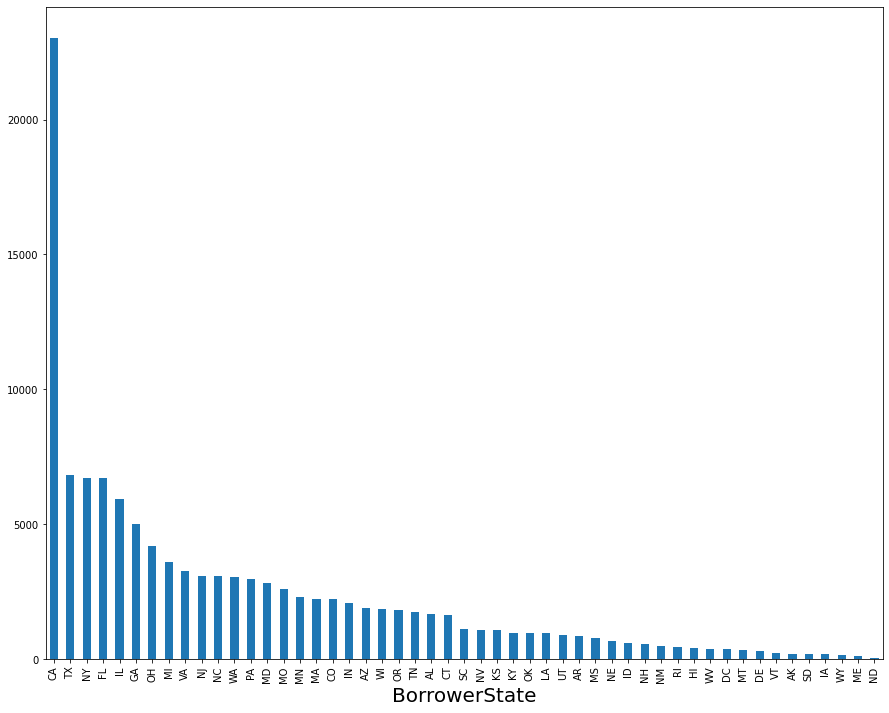

In [45]:
plt.figure(figsize=(15,12))
df['BorrowerState'].value_counts().plot.bar()
plt.xlabel('BorrowerState', fontsize=20)

Text(0.5, 0, 'Occupation')

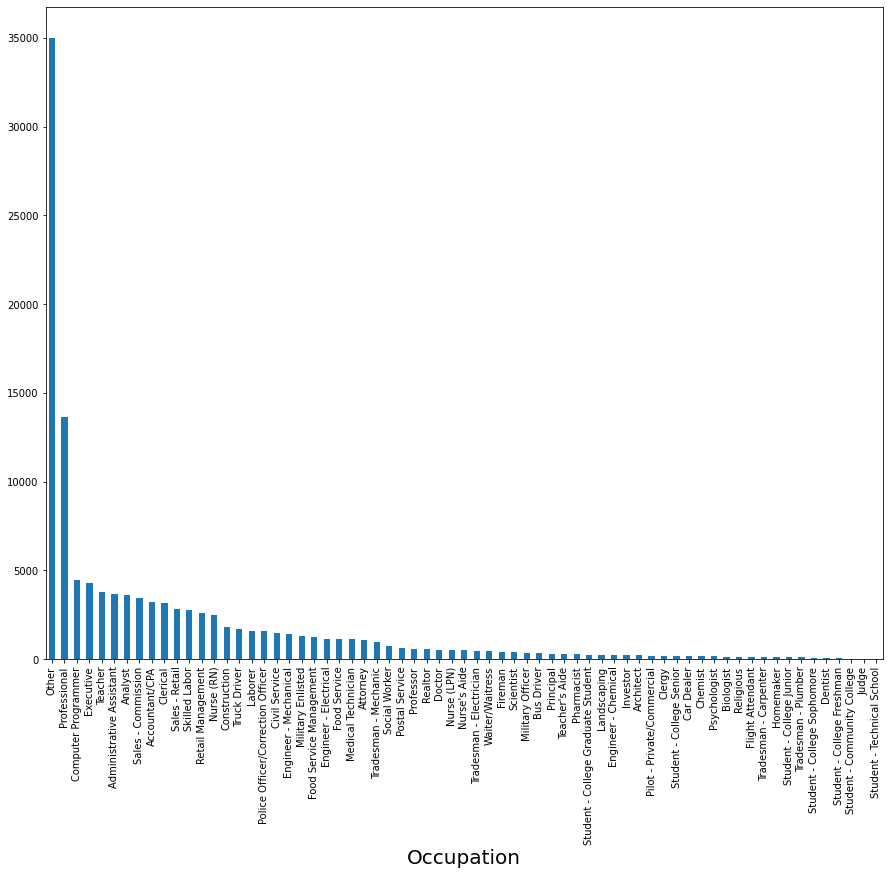

In [46]:
plt.figure(figsize=(15,12))
df['Occupation'].value_counts().plot.bar()
plt.xlabel('Occupation', fontsize=20)

Text(0.5, 0, 'EmploymentStatus')

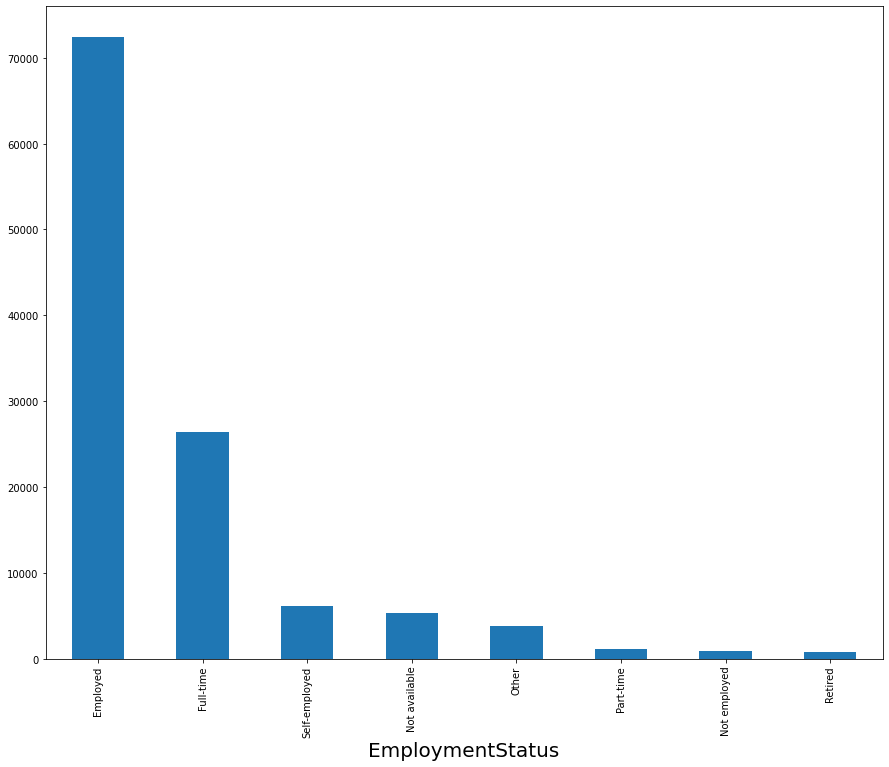

In [47]:
plt.figure(figsize=(15,12))
df['EmploymentStatus'].value_counts().plot.bar()
plt.xlabel('EmploymentStatus', fontsize=20)

Text(0.5, 0, 'IncomeRange')

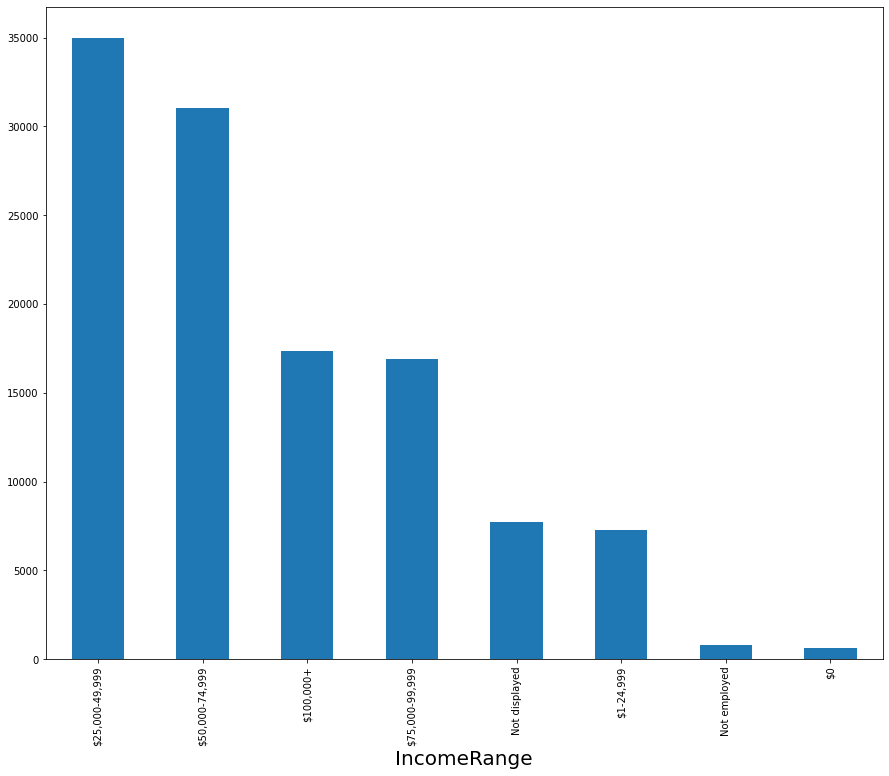

In [48]:
plt.figure(figsize=(15,12))
df['IncomeRange'].value_counts().plot.bar()
plt.xlabel('IncomeRange', fontsize=20)  

Text(0.5, 0, 'EmploymentStatus')

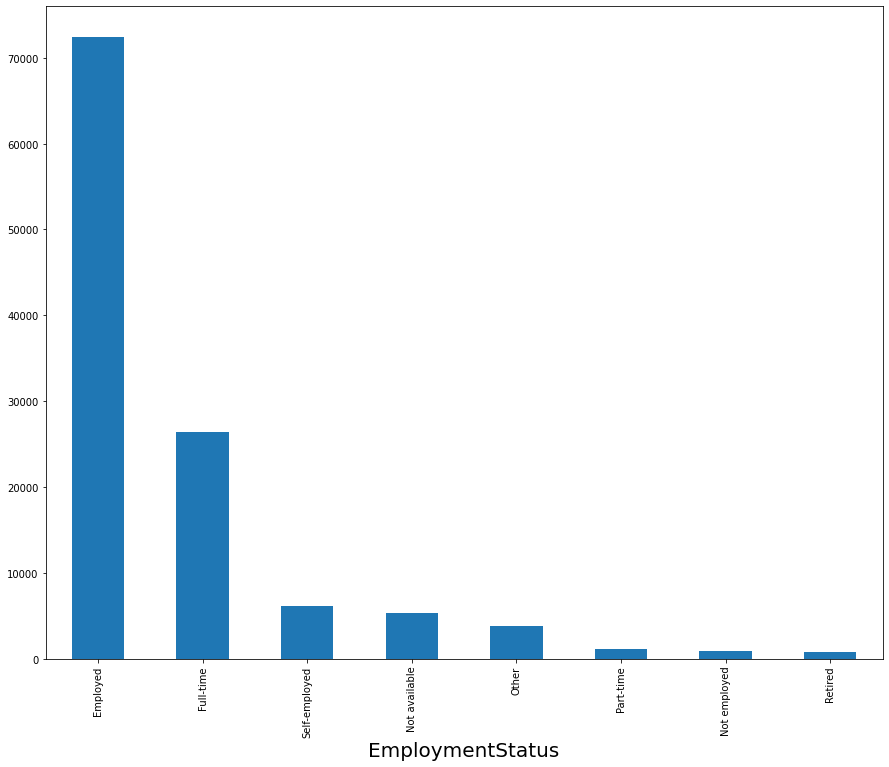

In [49]:
plt.figure(figsize=(15,12))
df['EmploymentStatus'].value_counts().plot.bar()
plt.xlabel('EmploymentStatus', fontsize=20)

<ipython-input-51-8a54bd8cddfe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-51-8a54bd8cddfe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-51-8a54bd8cddfe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

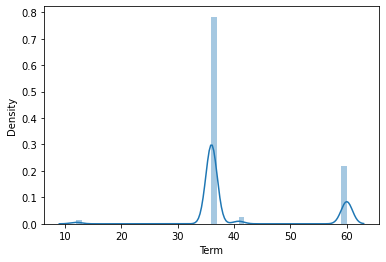

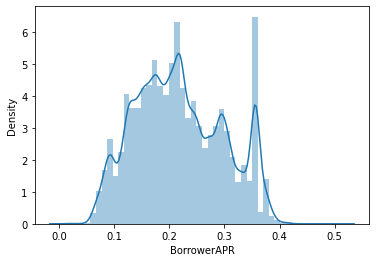

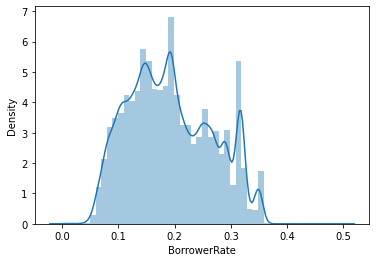

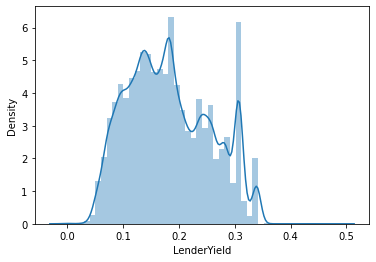

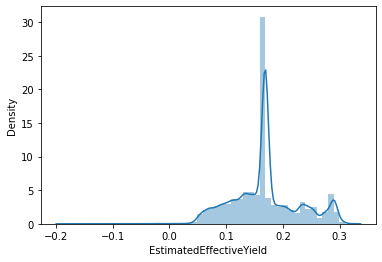

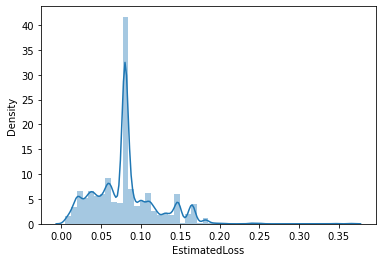

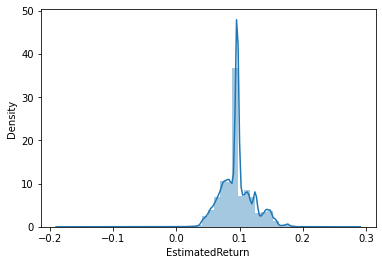

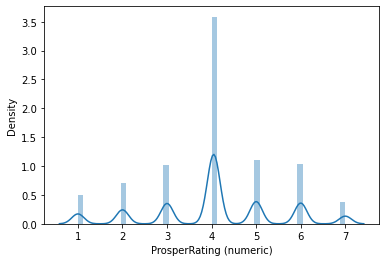

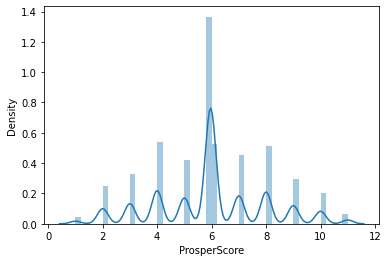

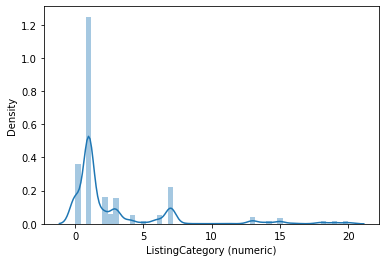

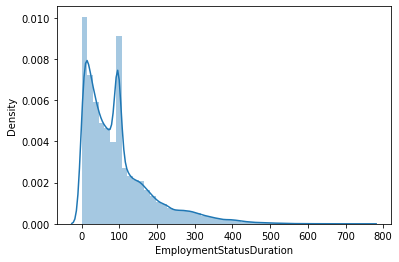

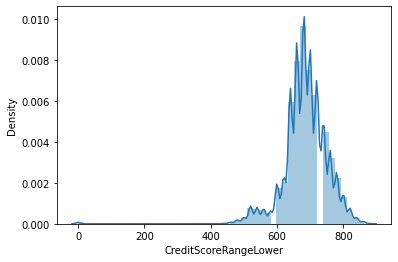

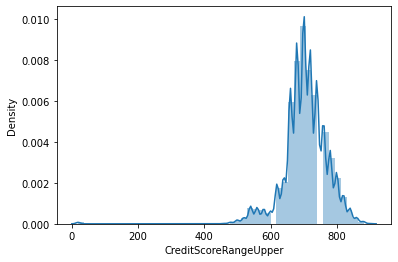

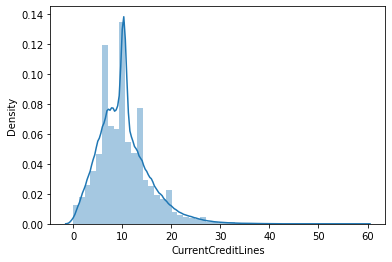

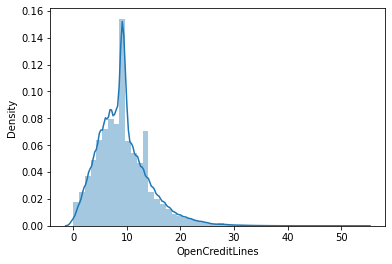

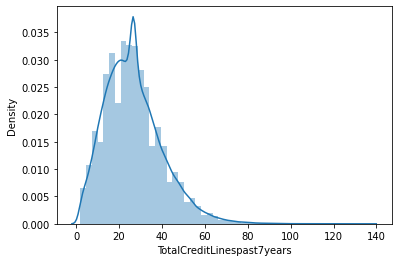

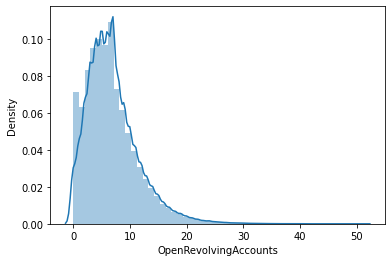

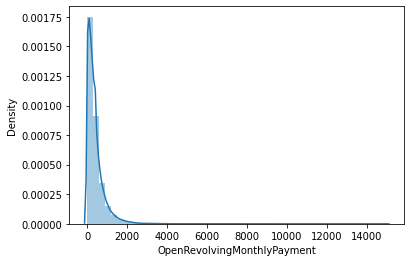

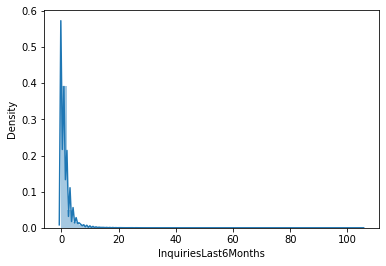

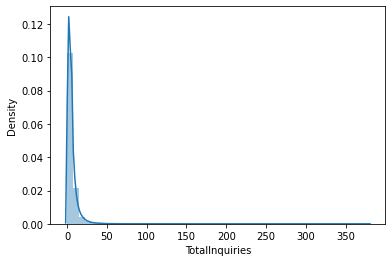

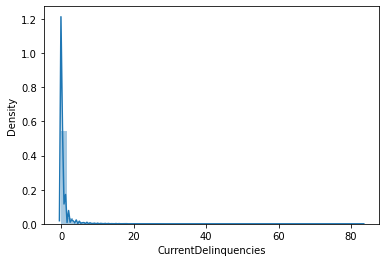

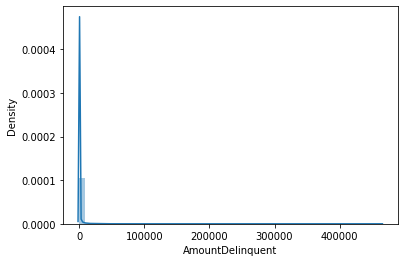

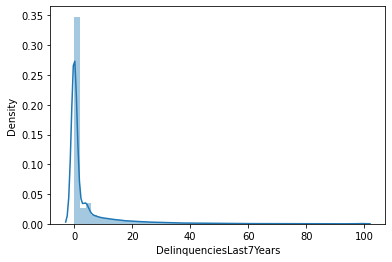

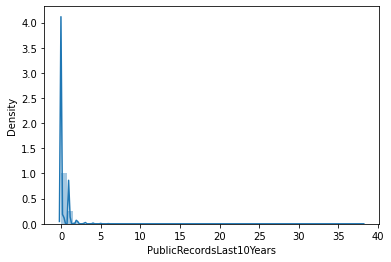

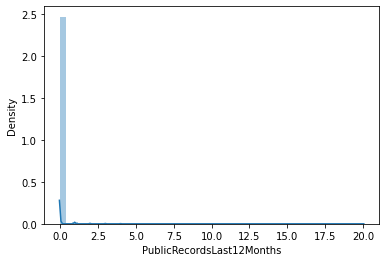

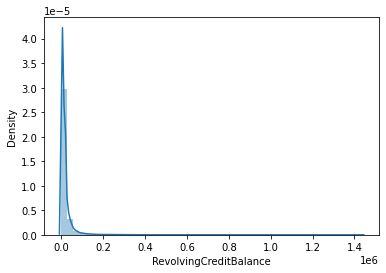

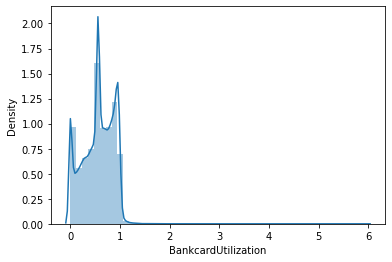

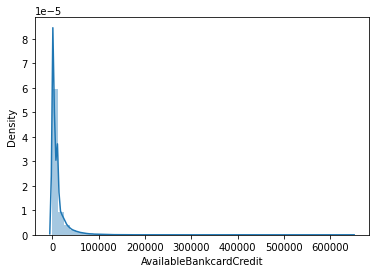

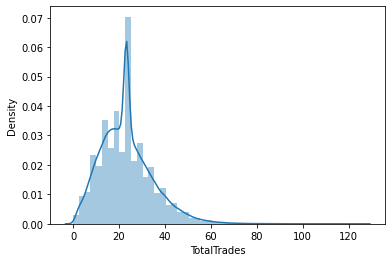

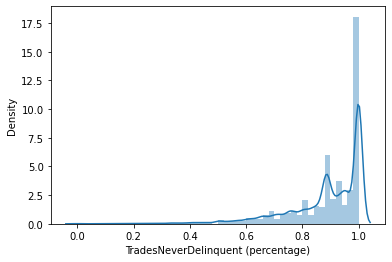

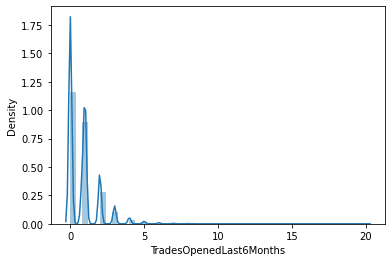

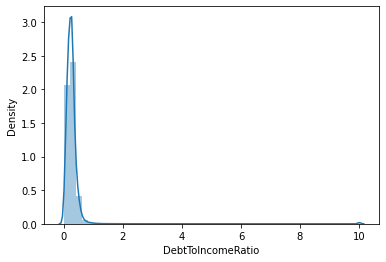

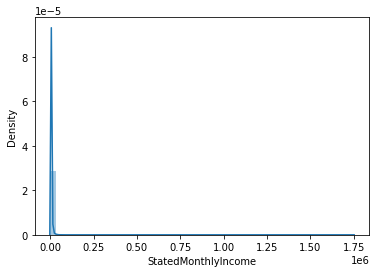

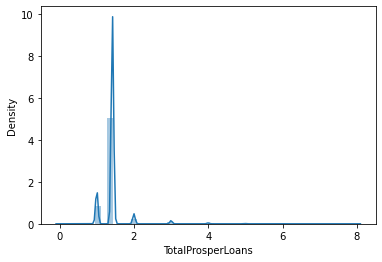

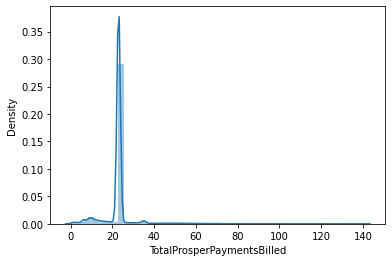

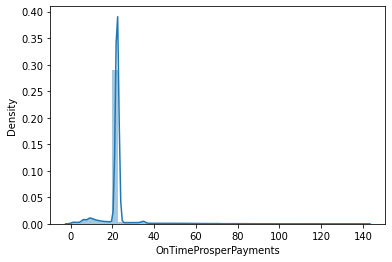

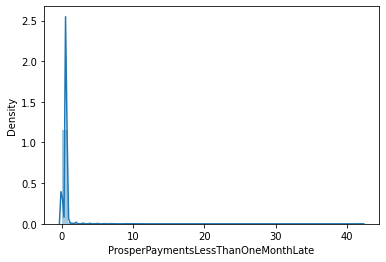

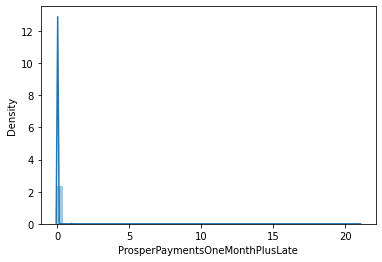

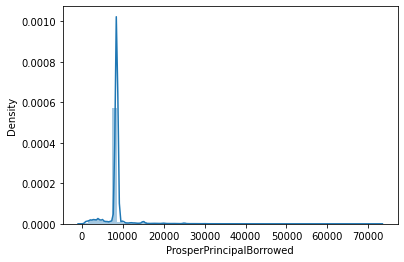

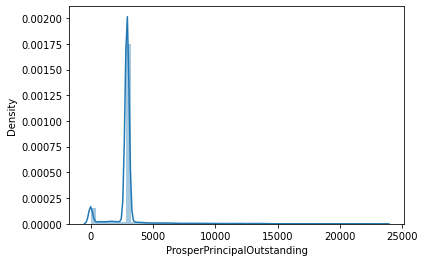

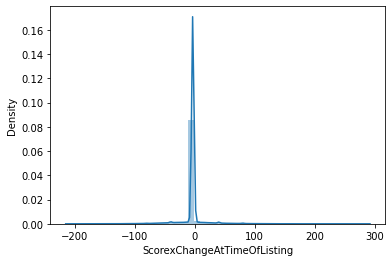

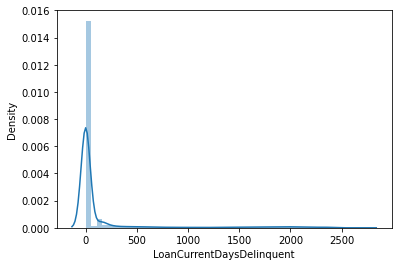

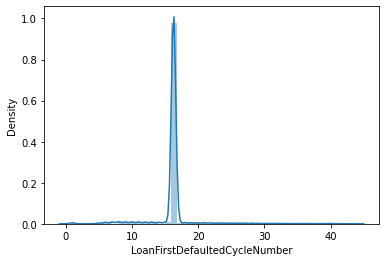

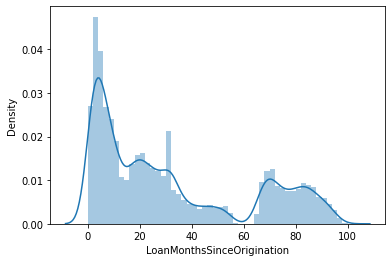

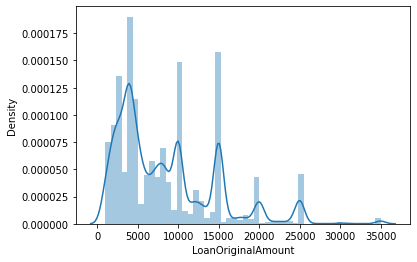

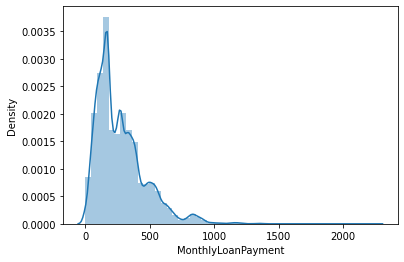

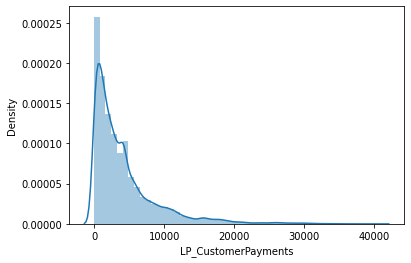

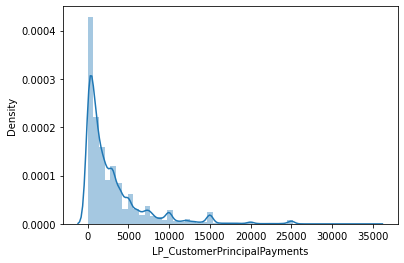

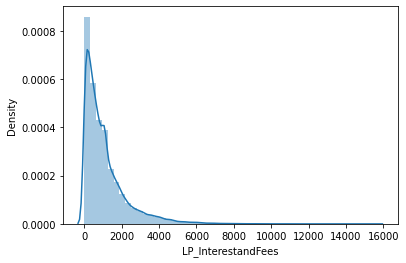

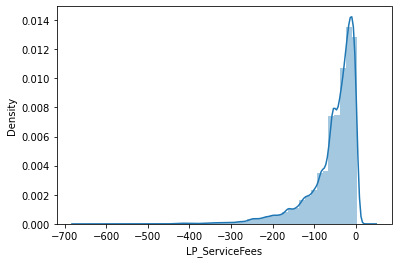

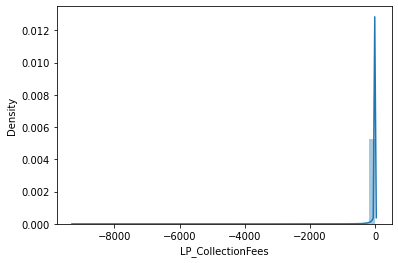

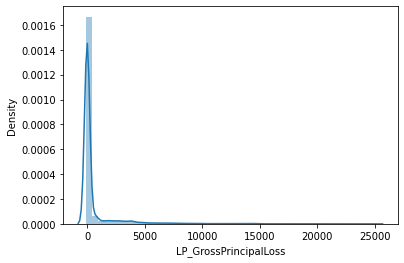

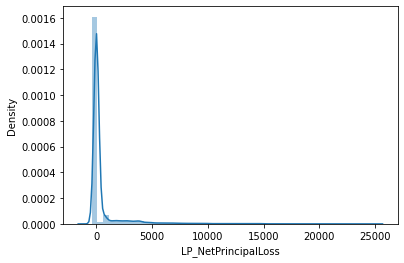

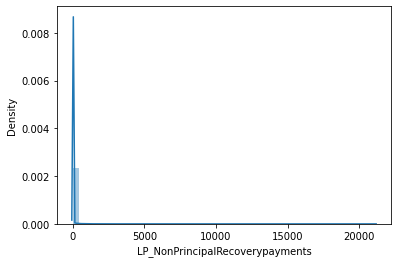

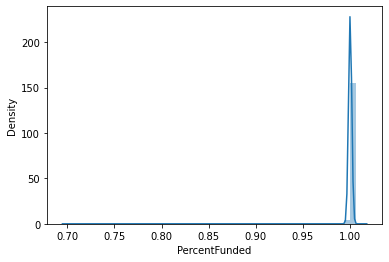

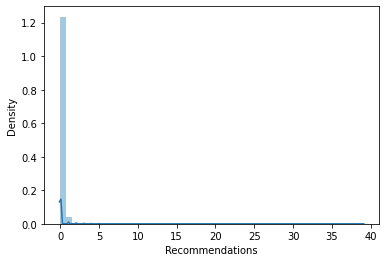

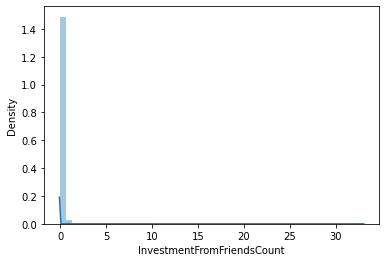

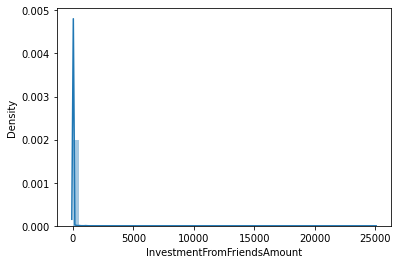

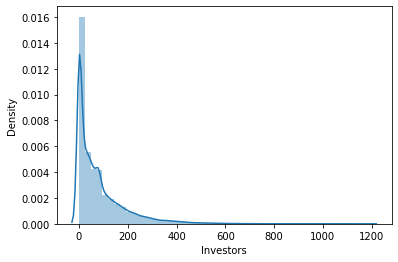

In [51]:
for i in num_cols:
    plt.figure()
    sns.distplot(df[i])

# Handling Outliers:

In [62]:
num_cols

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperP

<ipython-input-64-acc3eea1b29d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


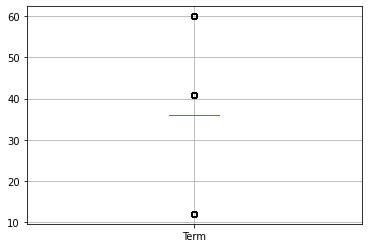

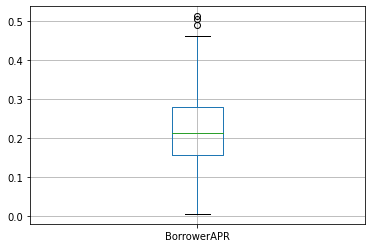

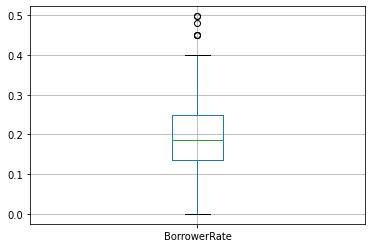

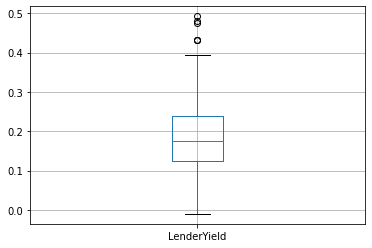

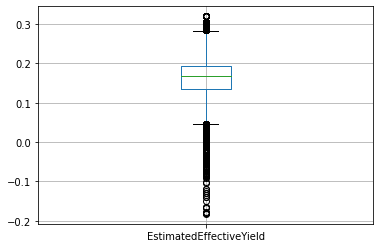

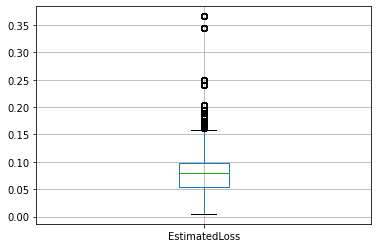

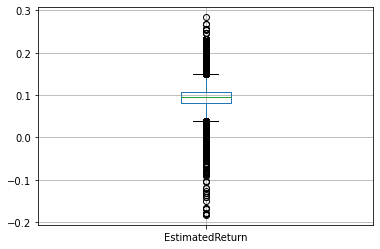

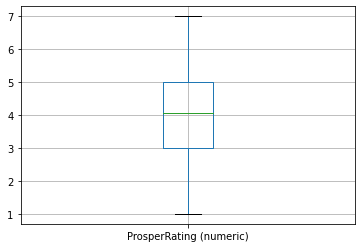

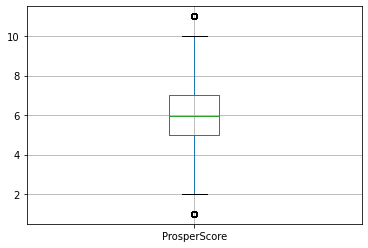

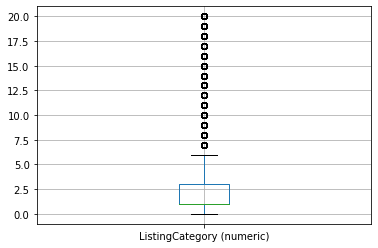

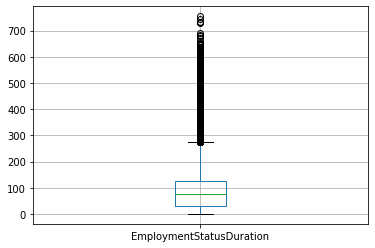

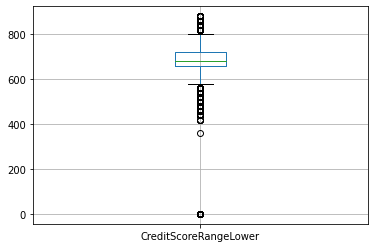

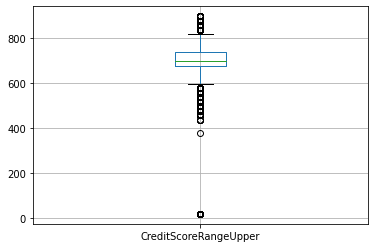

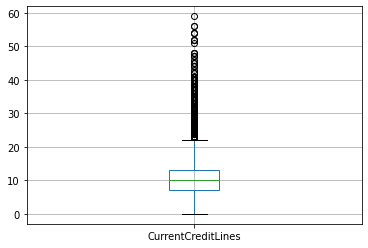

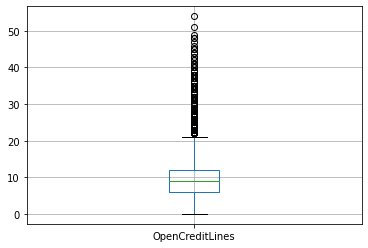

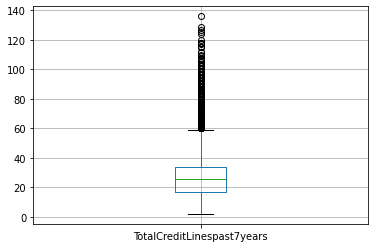

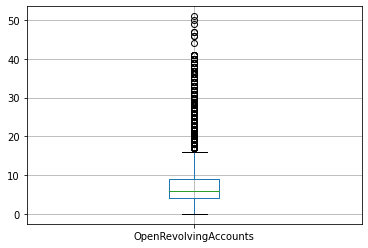

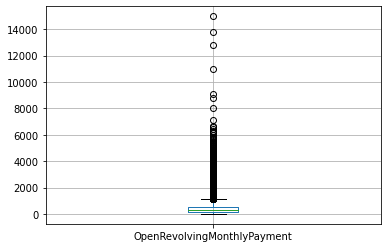

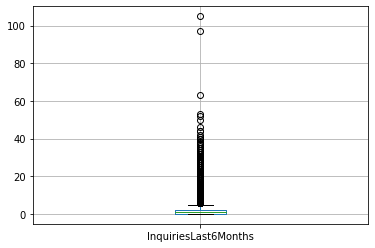

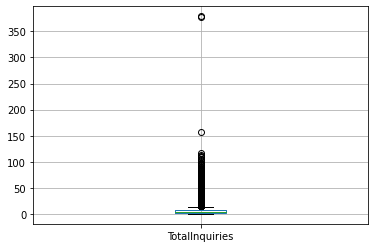

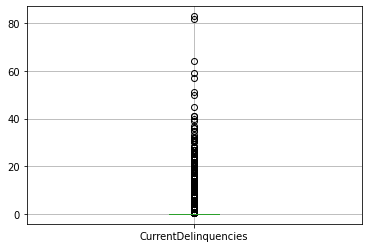

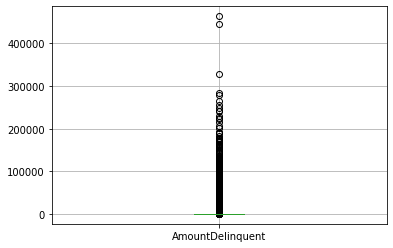

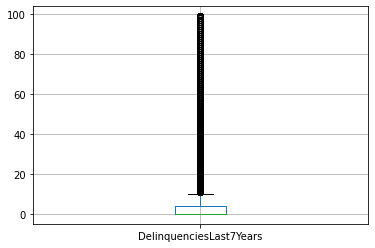

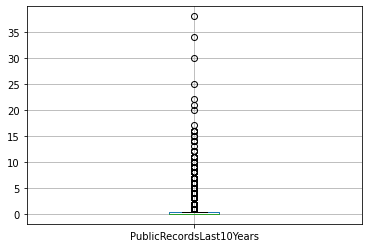

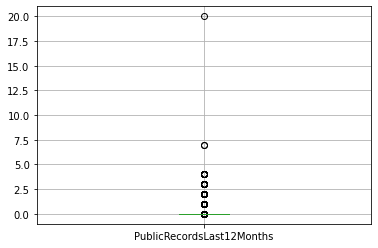

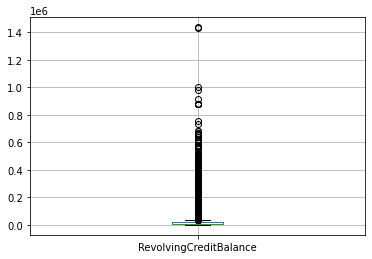

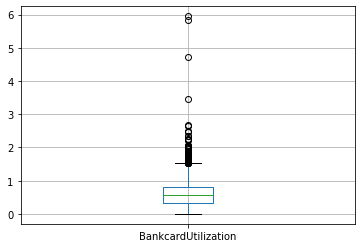

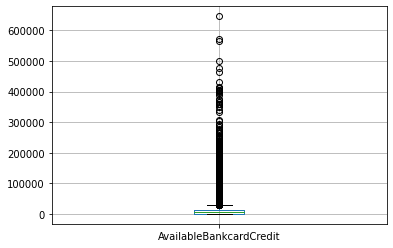

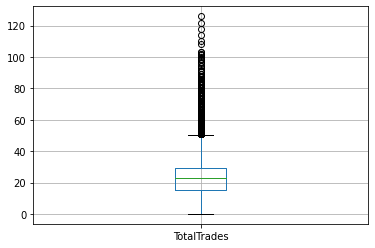

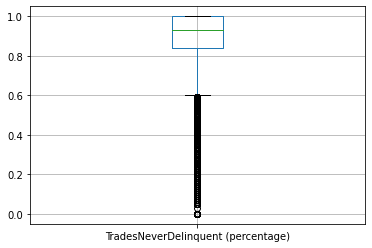

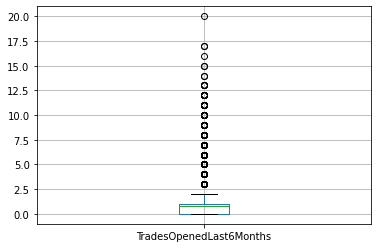

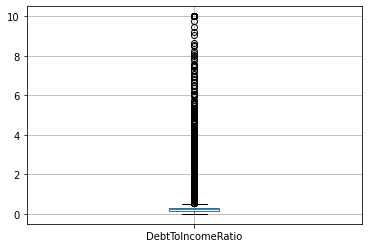

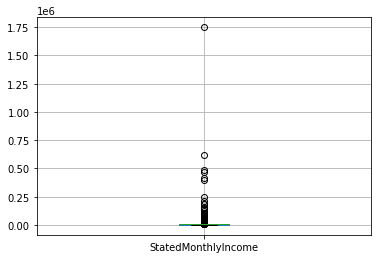

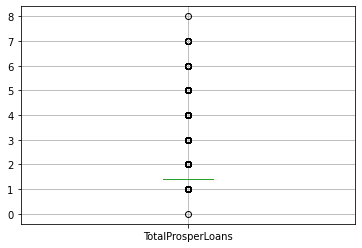

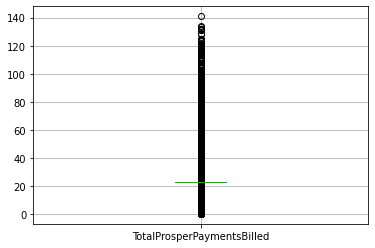

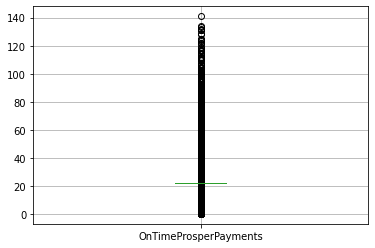

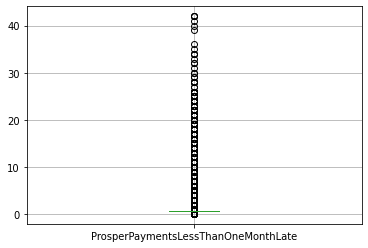

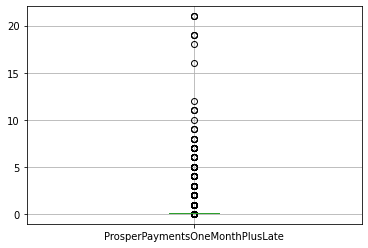

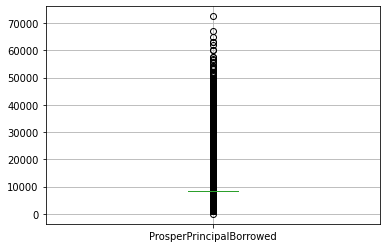

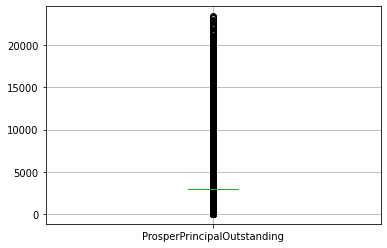

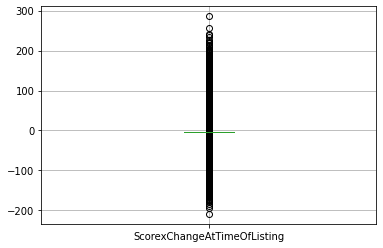

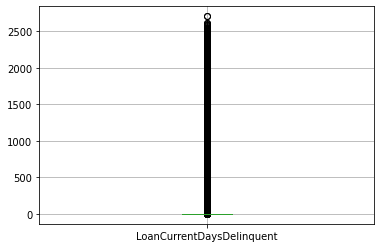

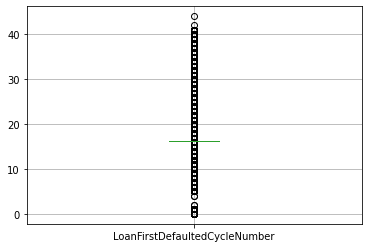

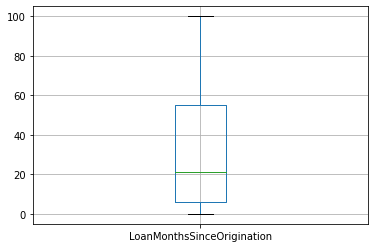

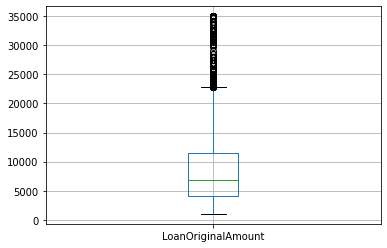

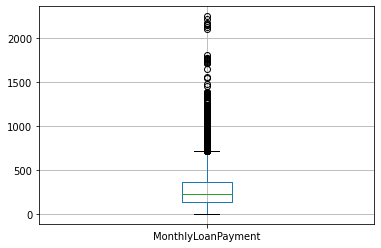

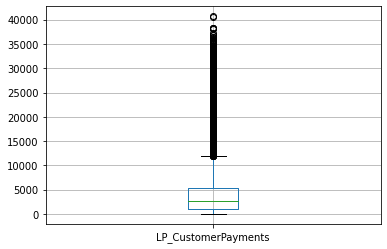

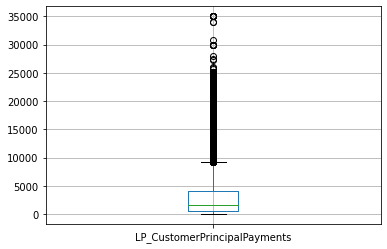

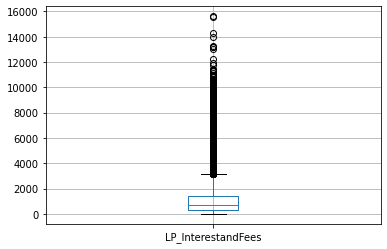

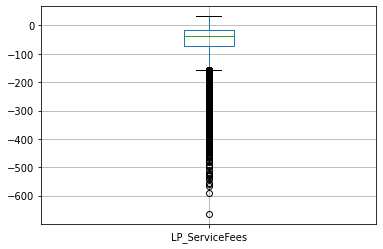

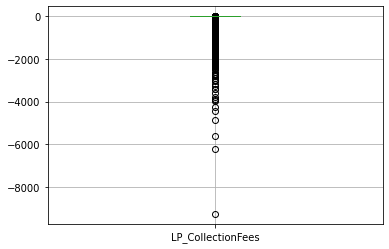

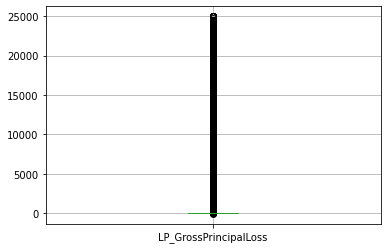

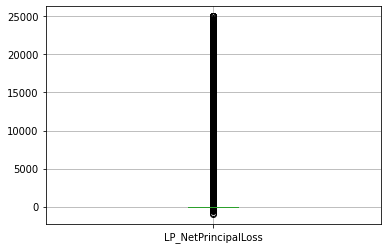

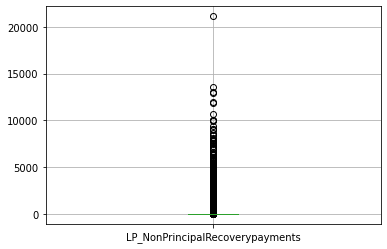

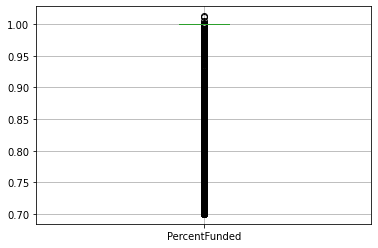

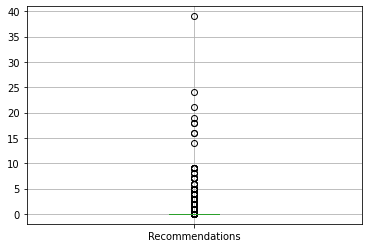

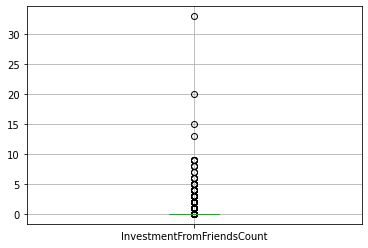

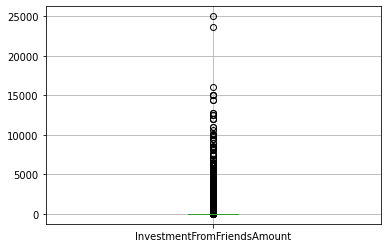

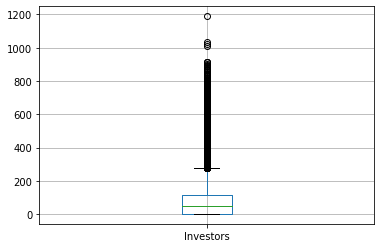

In [64]:
for i in num_cols:
    plt.figure()
    df.boxplot(column=i)
    plt.show

In [67]:
for i in num_cols :
    Q3 = df[i].quantile(.75)
    Q1 = df[i].quantile(.25)
    IQR = Q3 - Q1 
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR
    filt2 = df[i] >  upper_whisker 
    filt3 = df[i] <  lower_whisker
    out2 = df[filt2].index
    out3 = df[filt3].index
    df= df.drop(out3 , axis = 0)

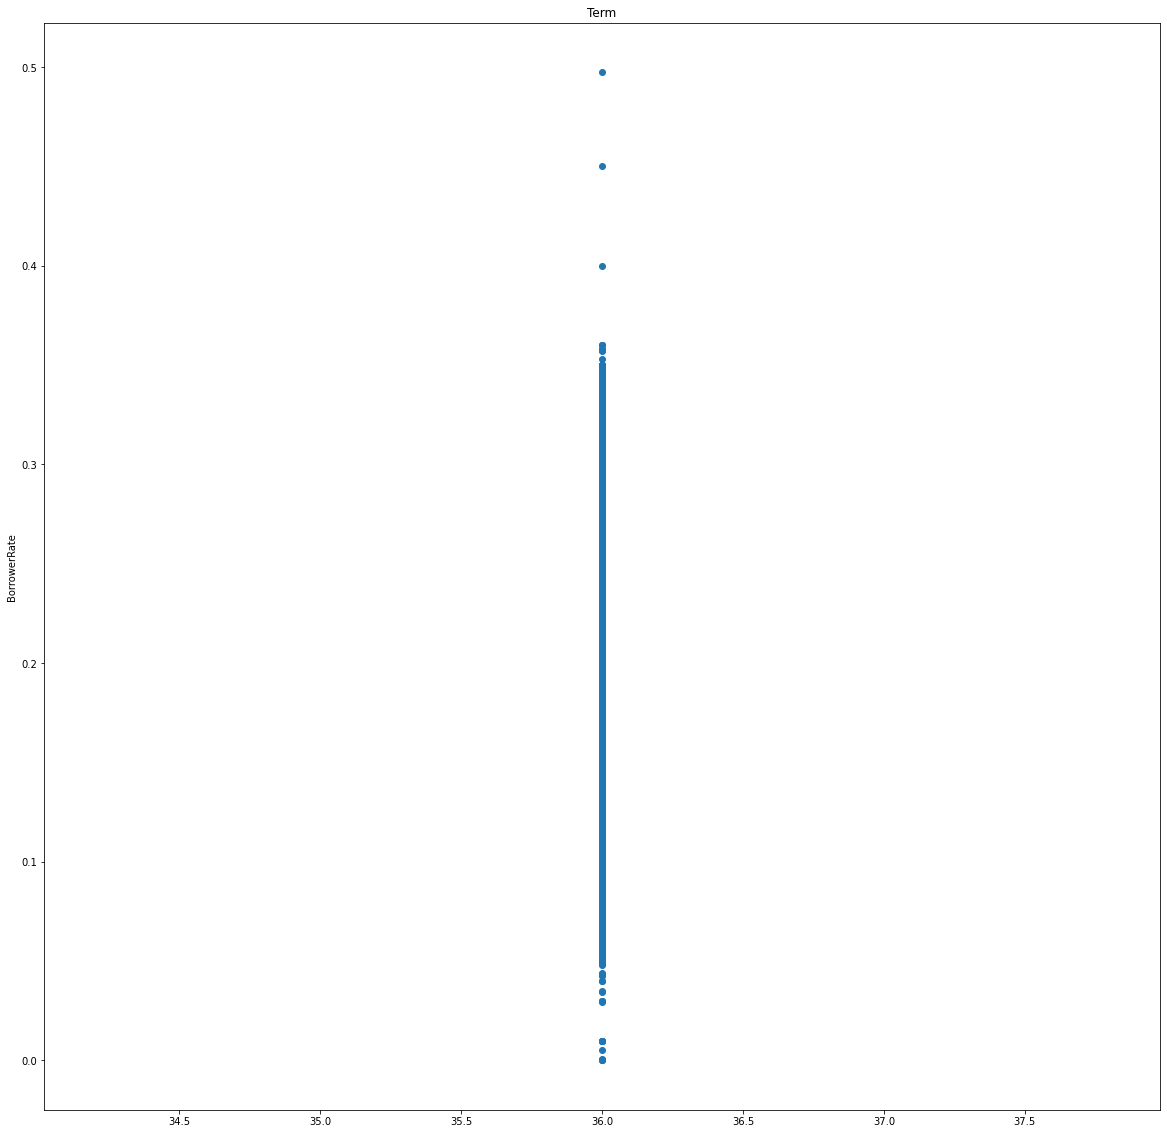

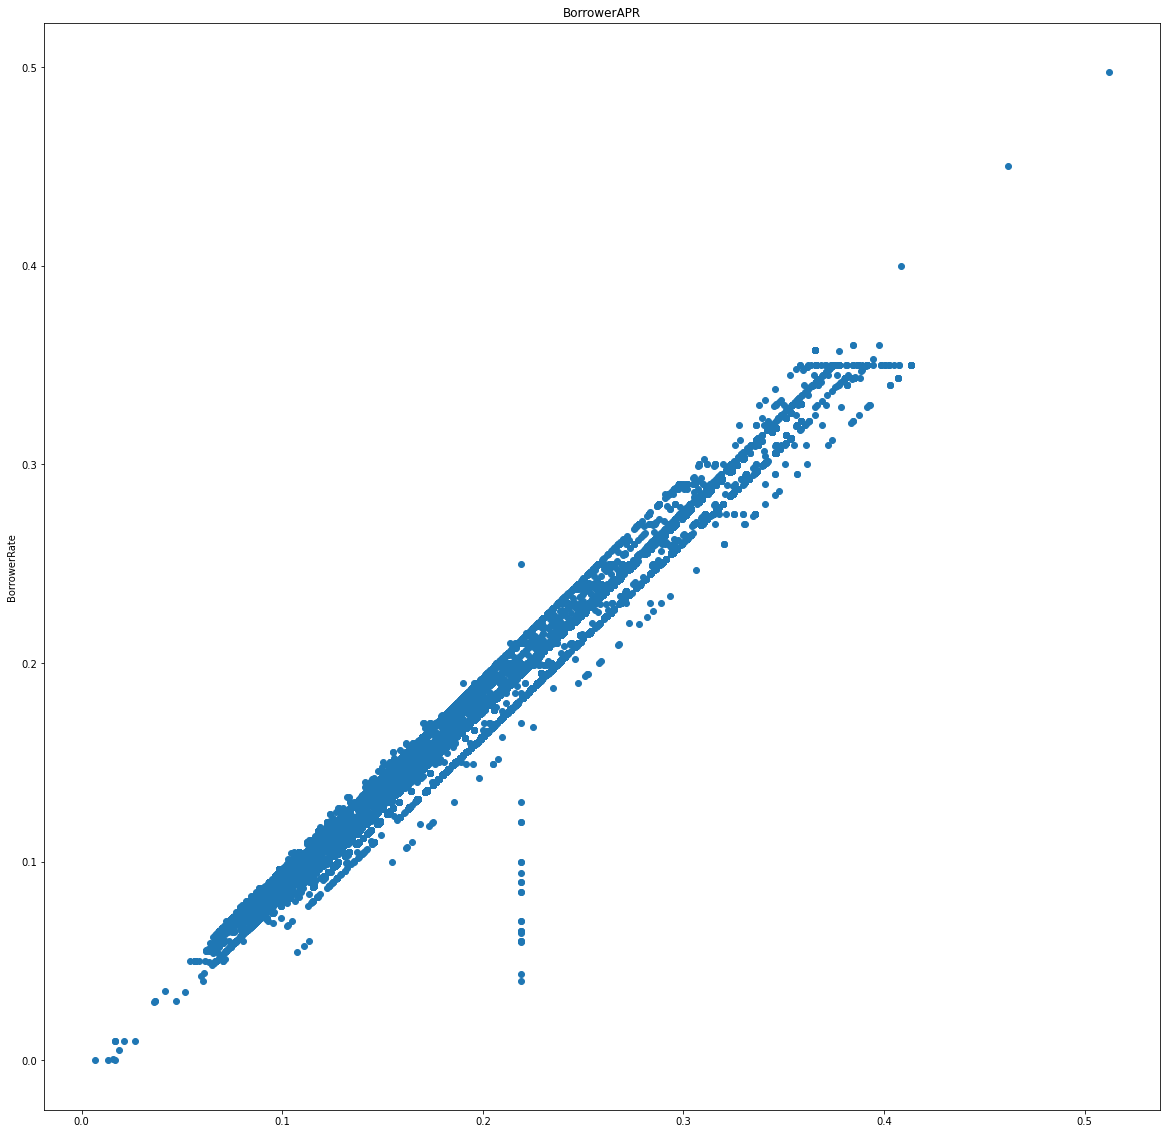

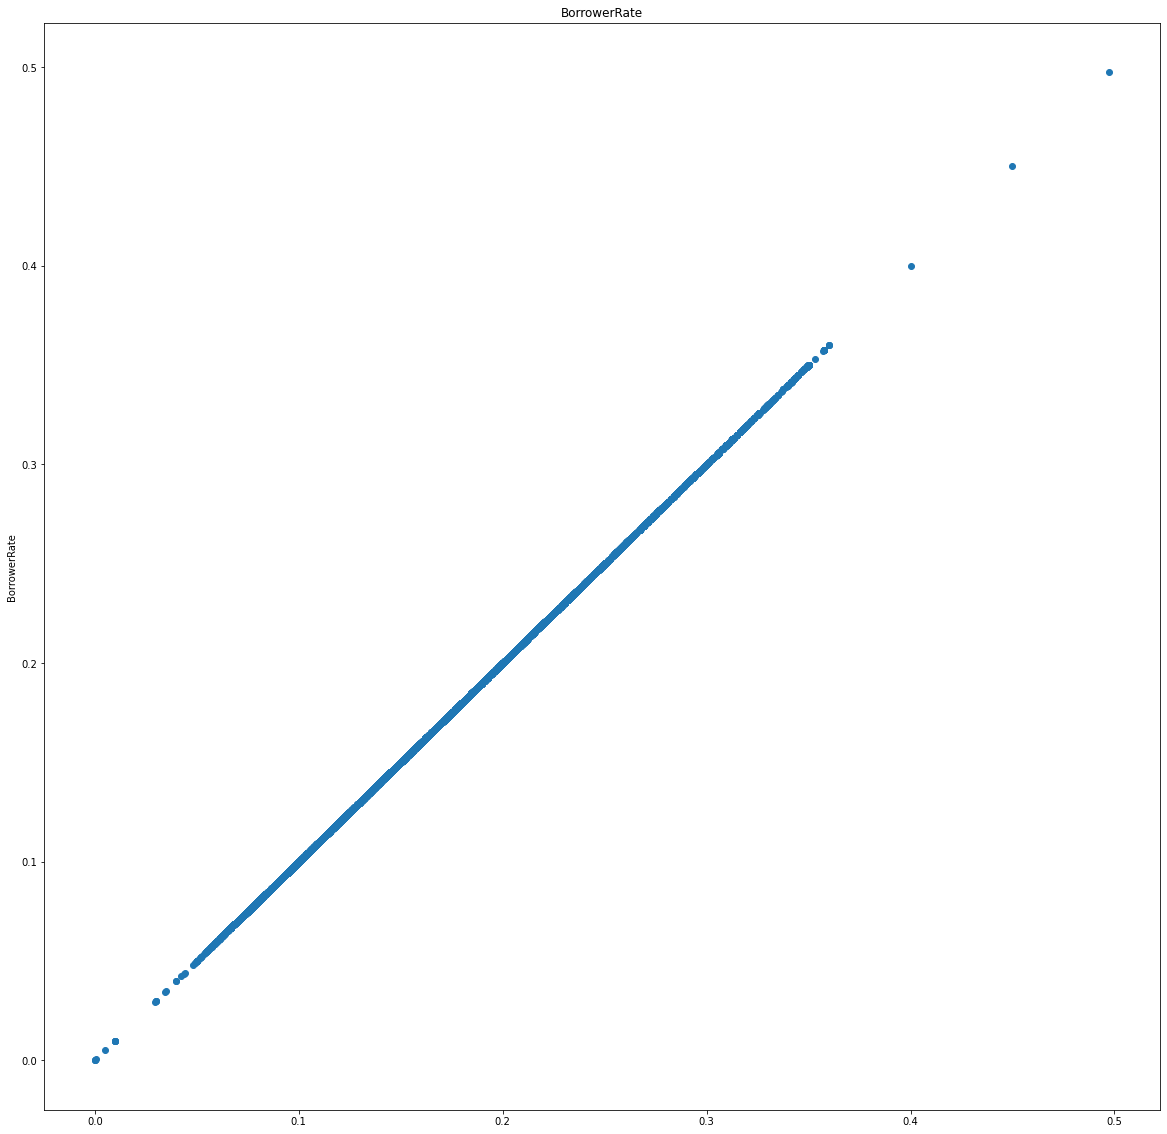

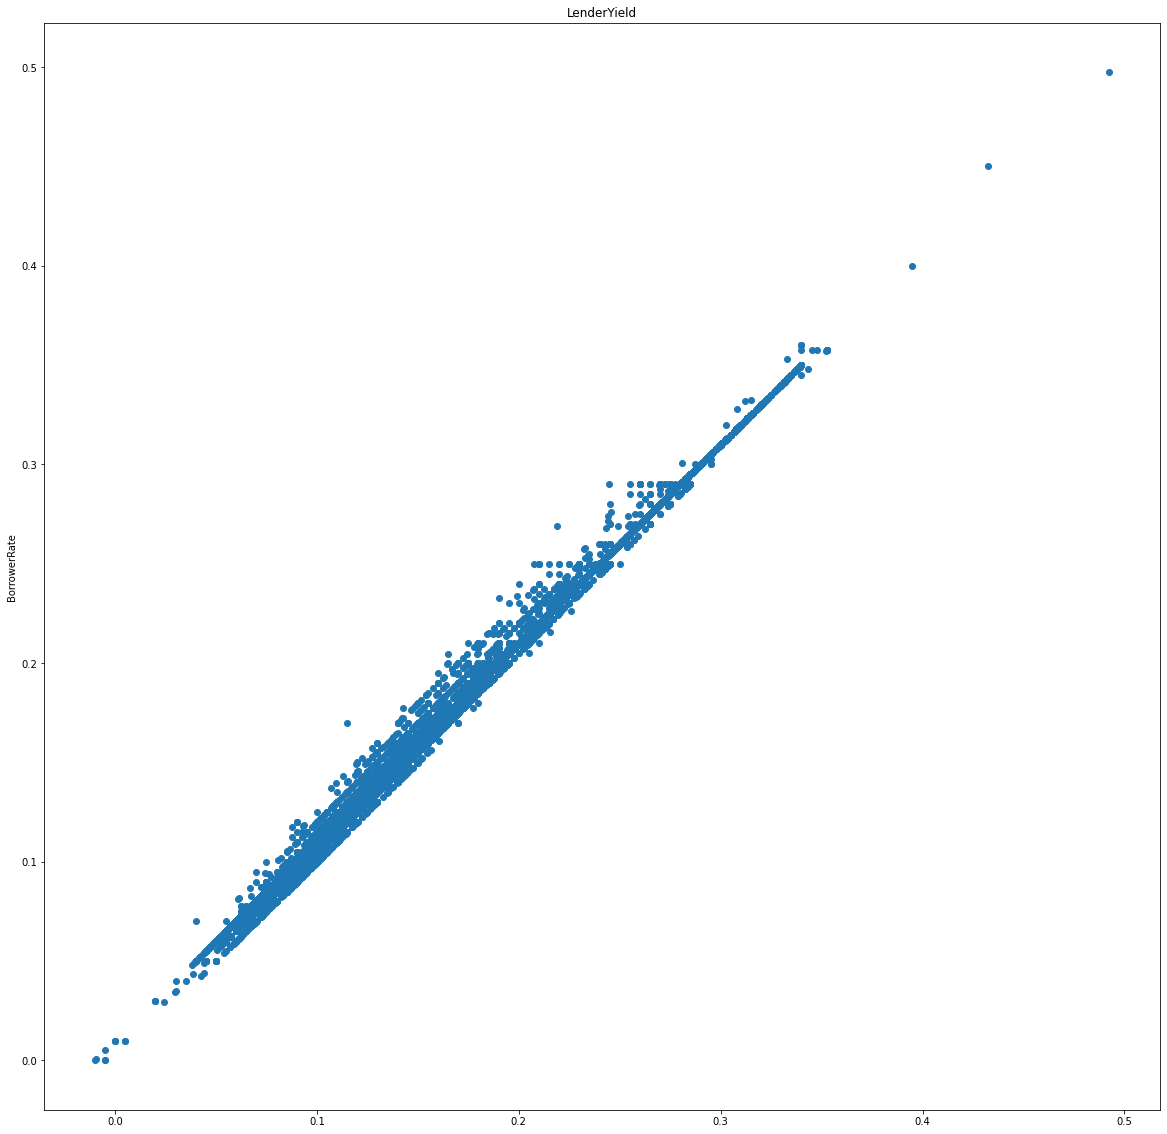

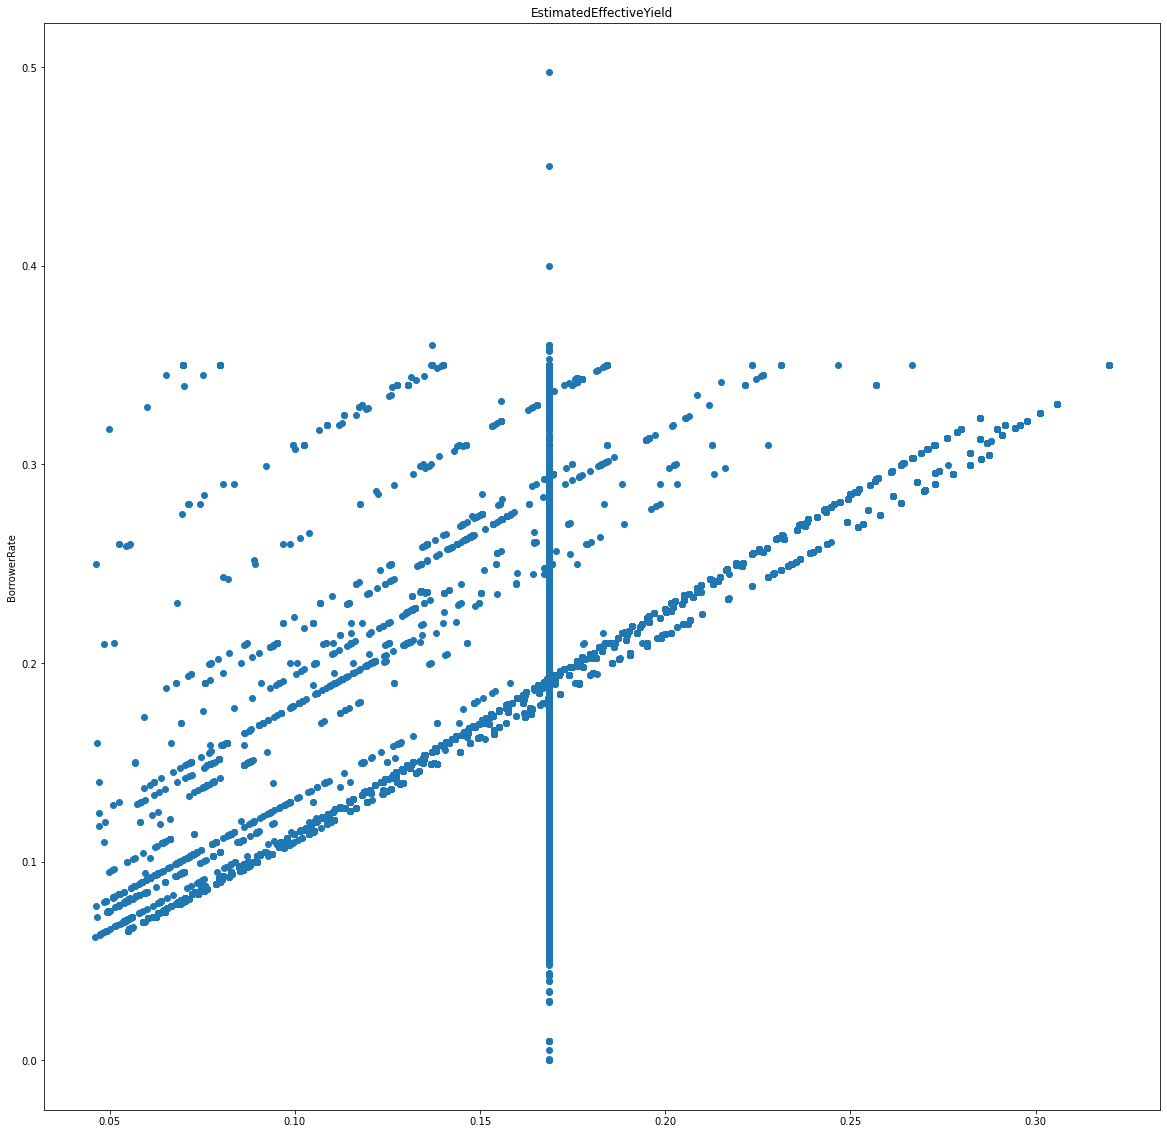

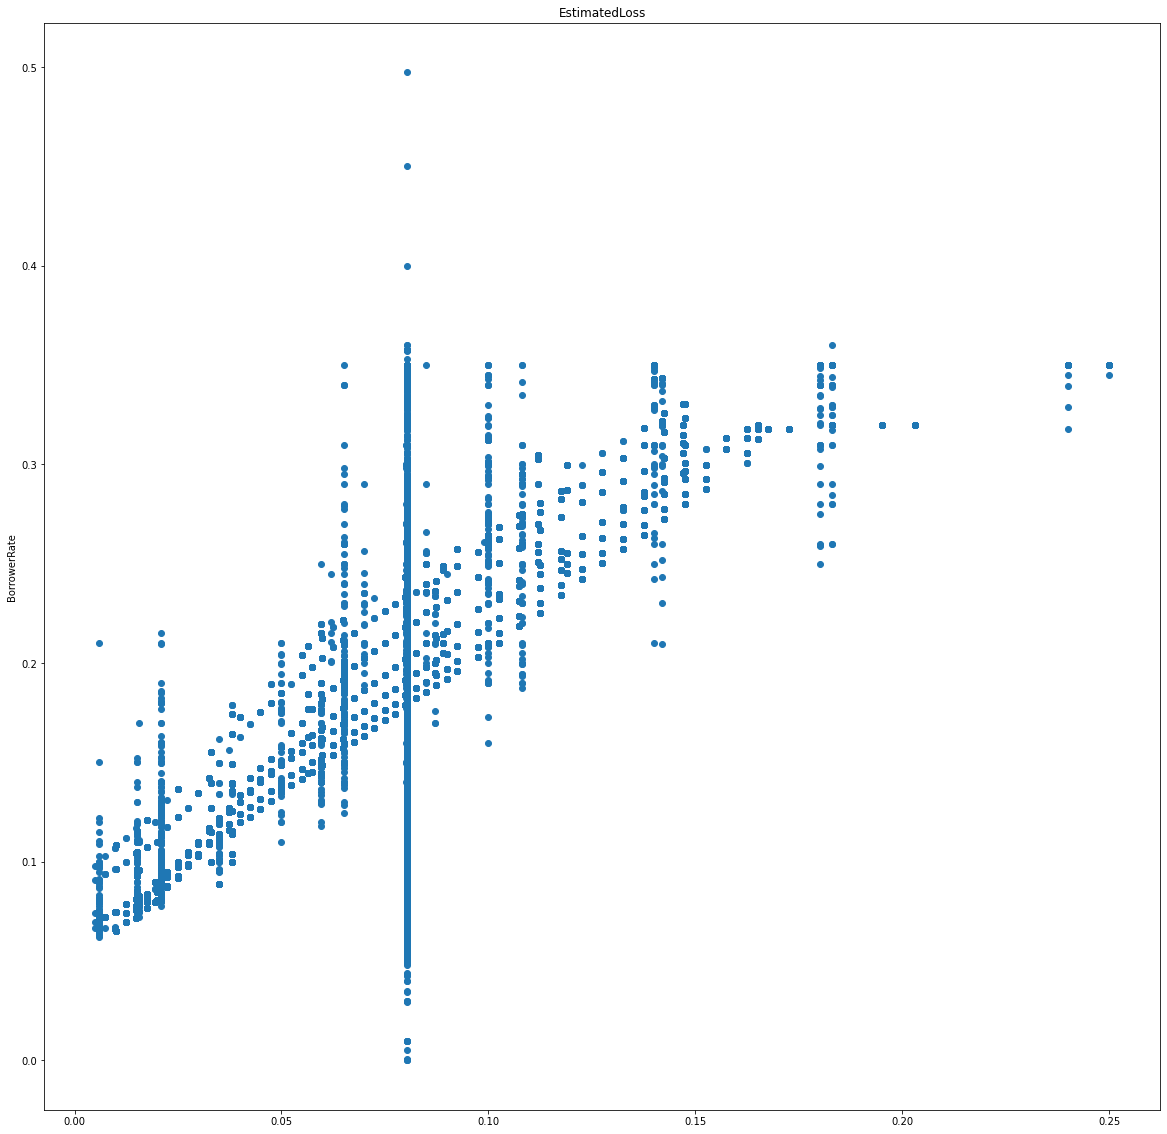

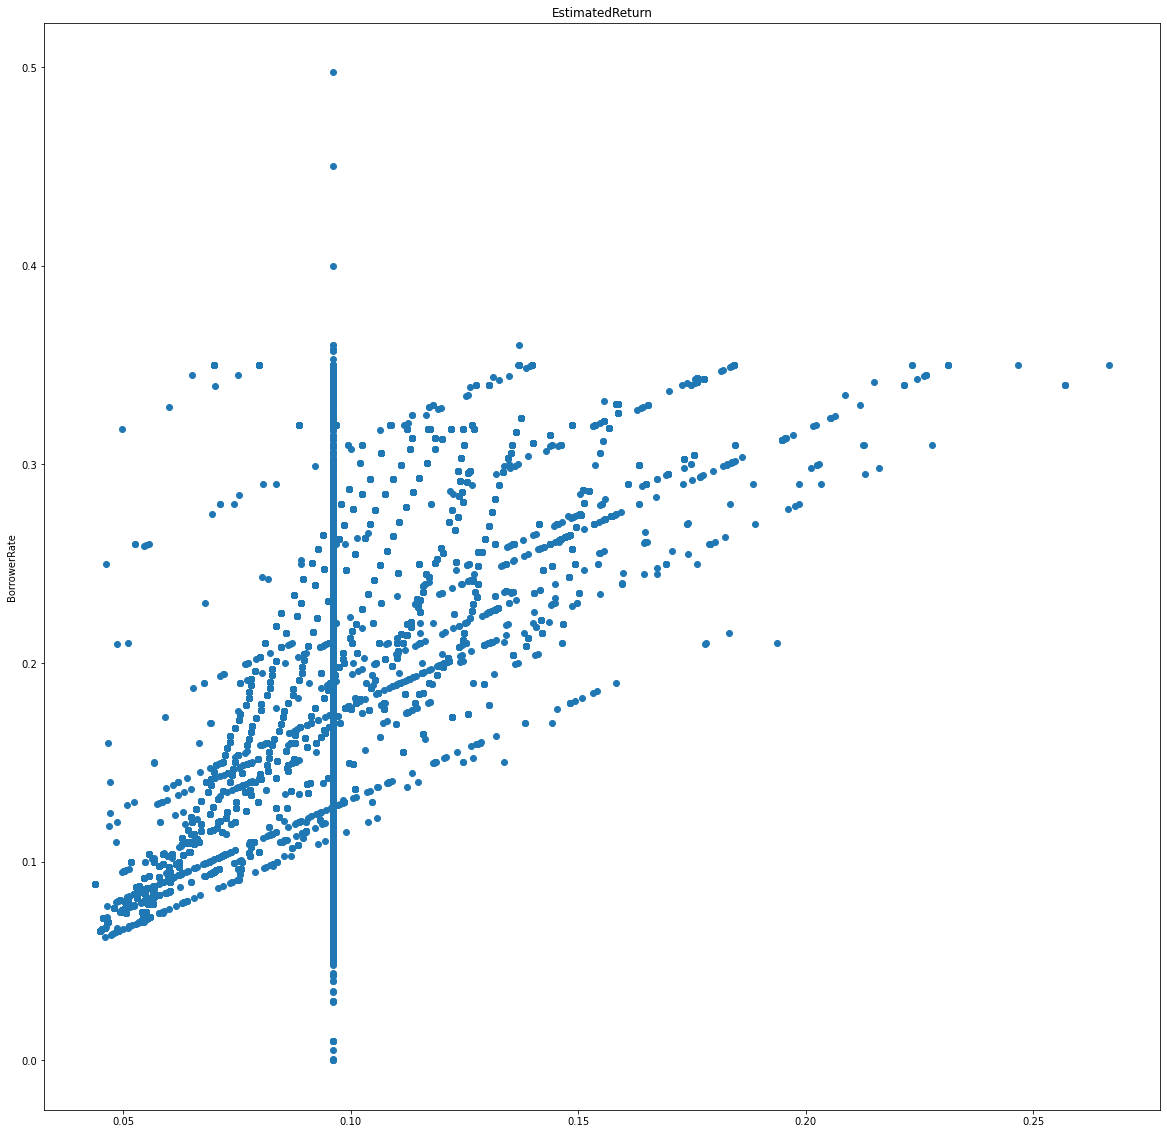

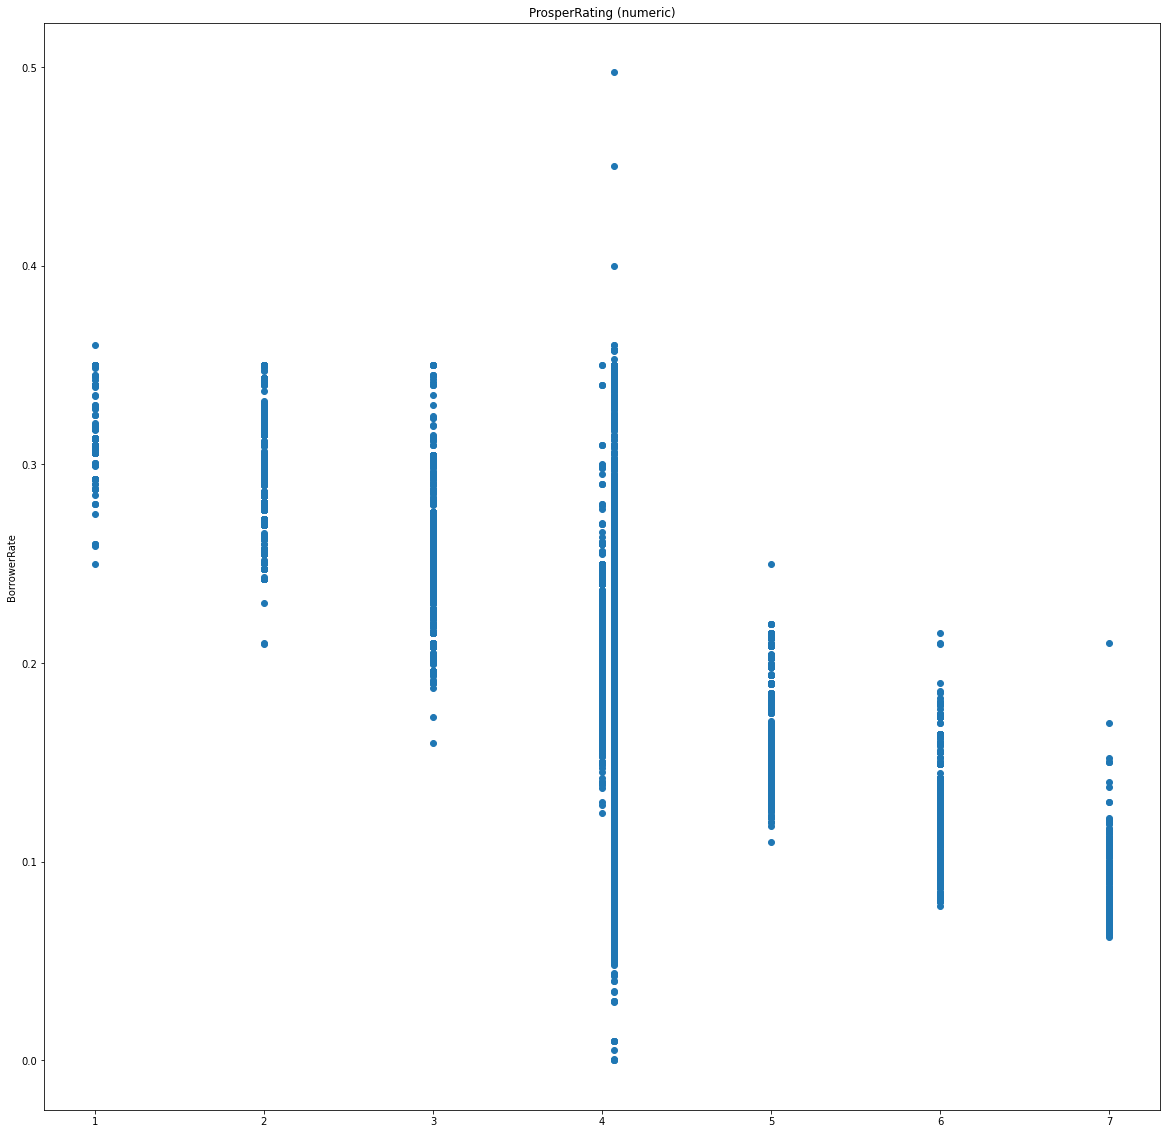

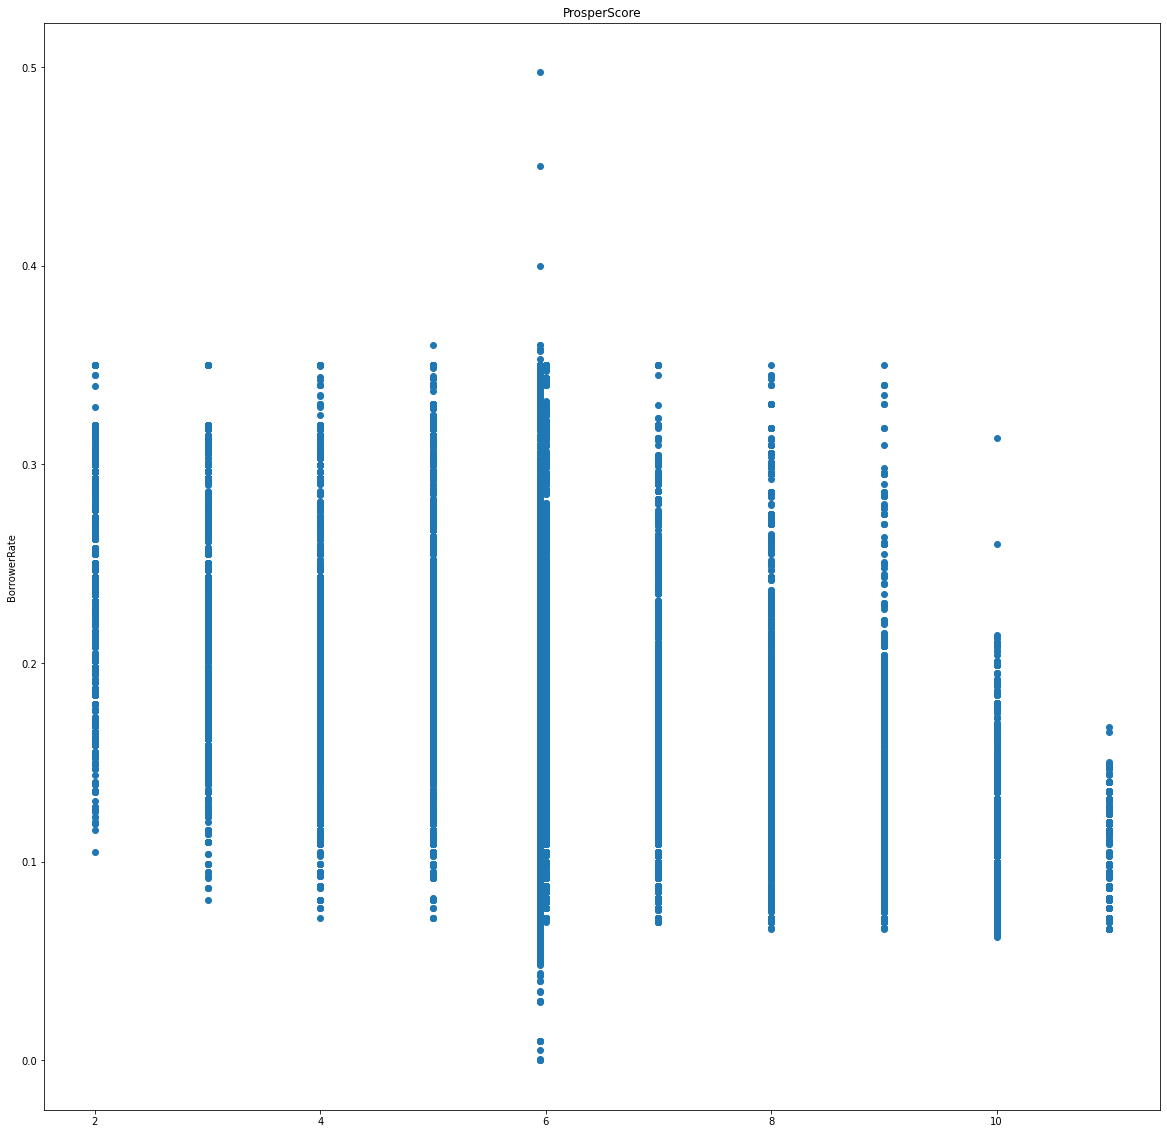

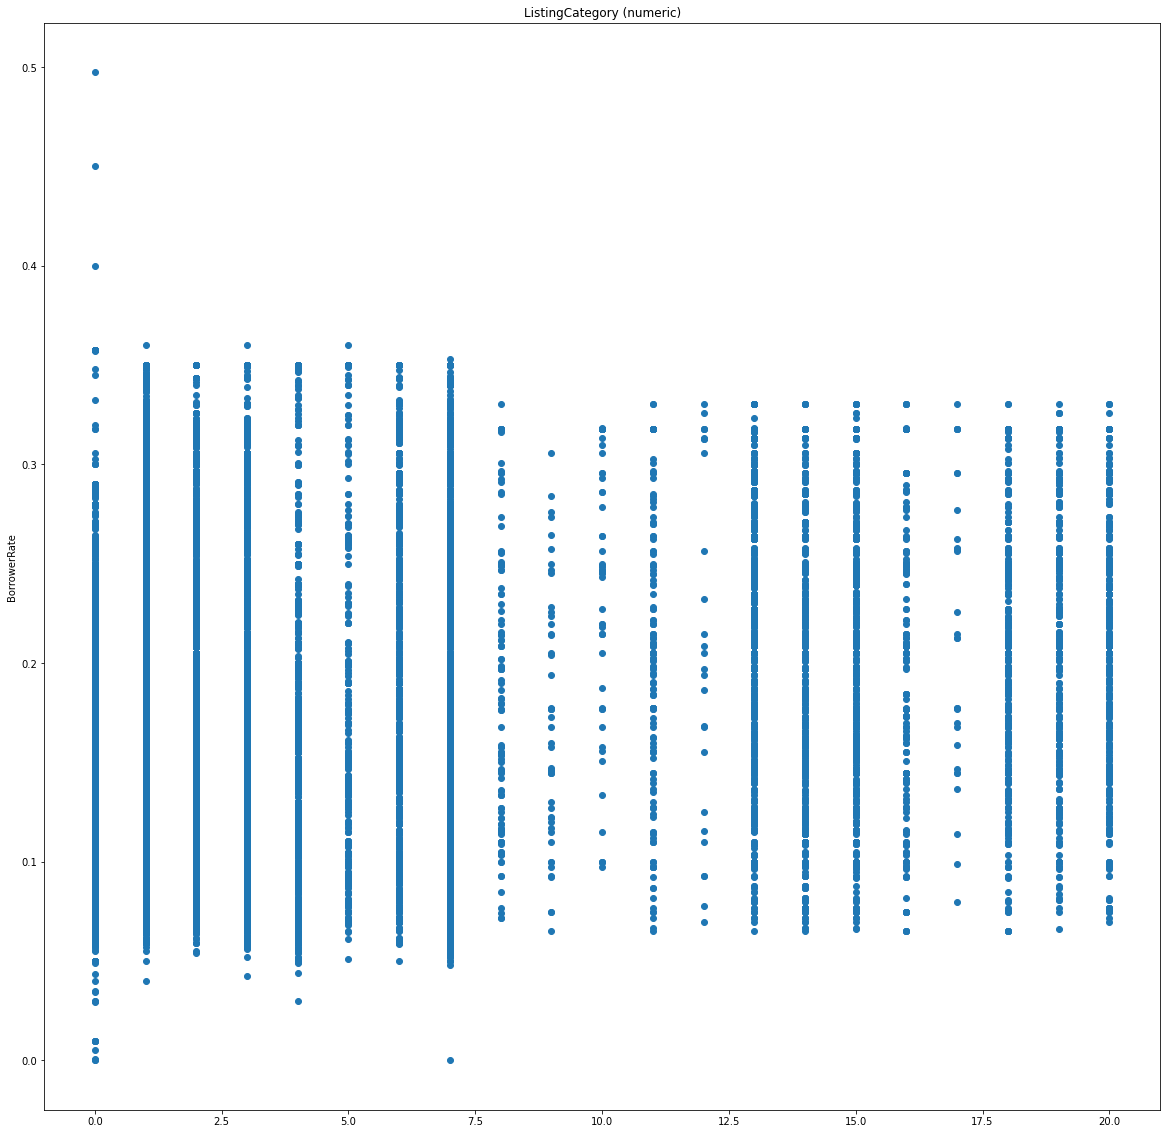

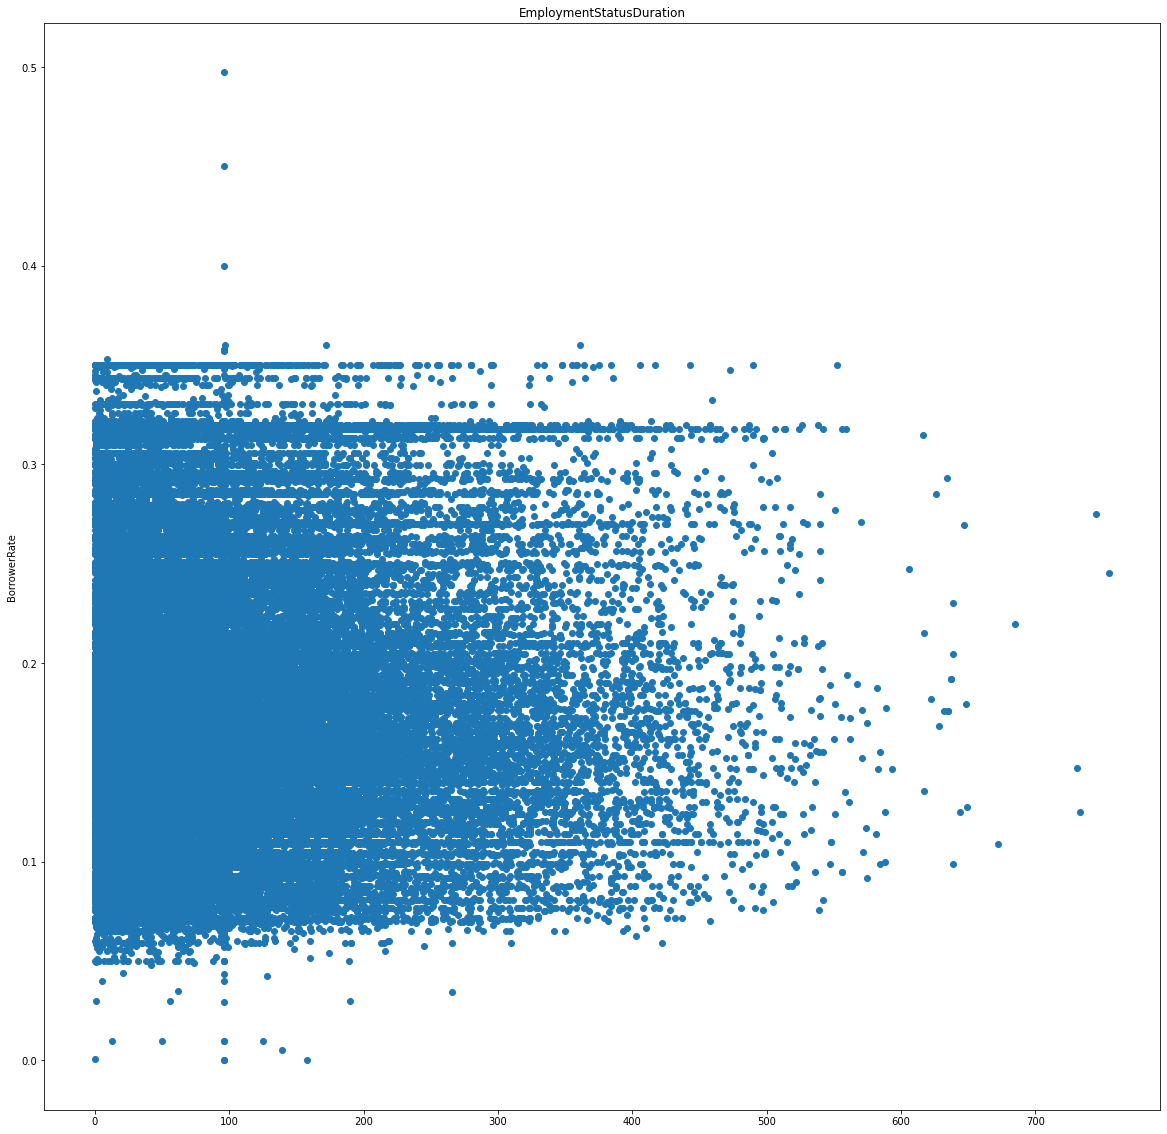

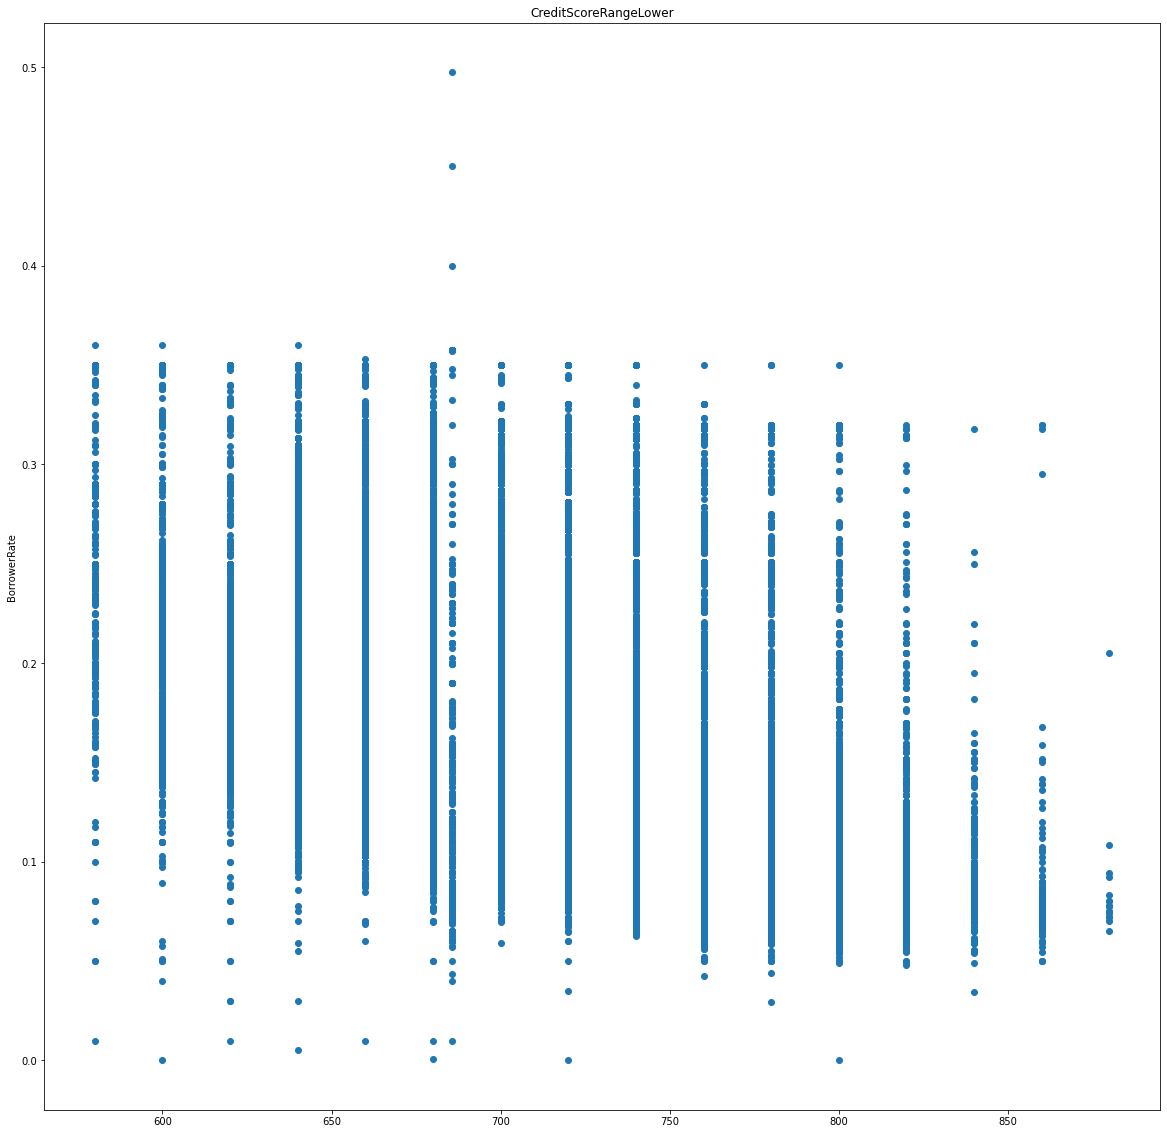

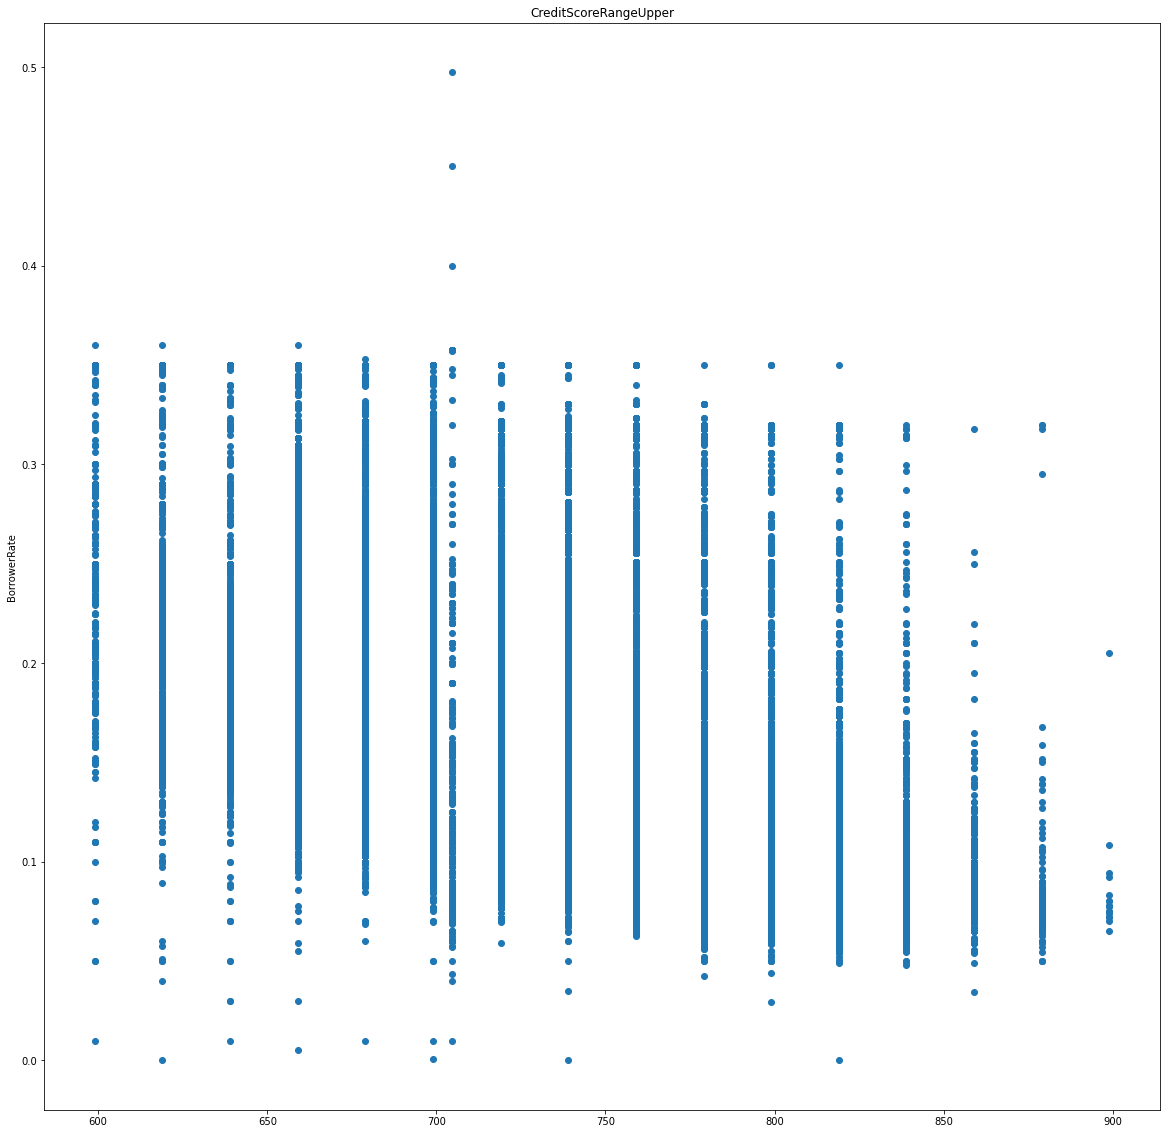

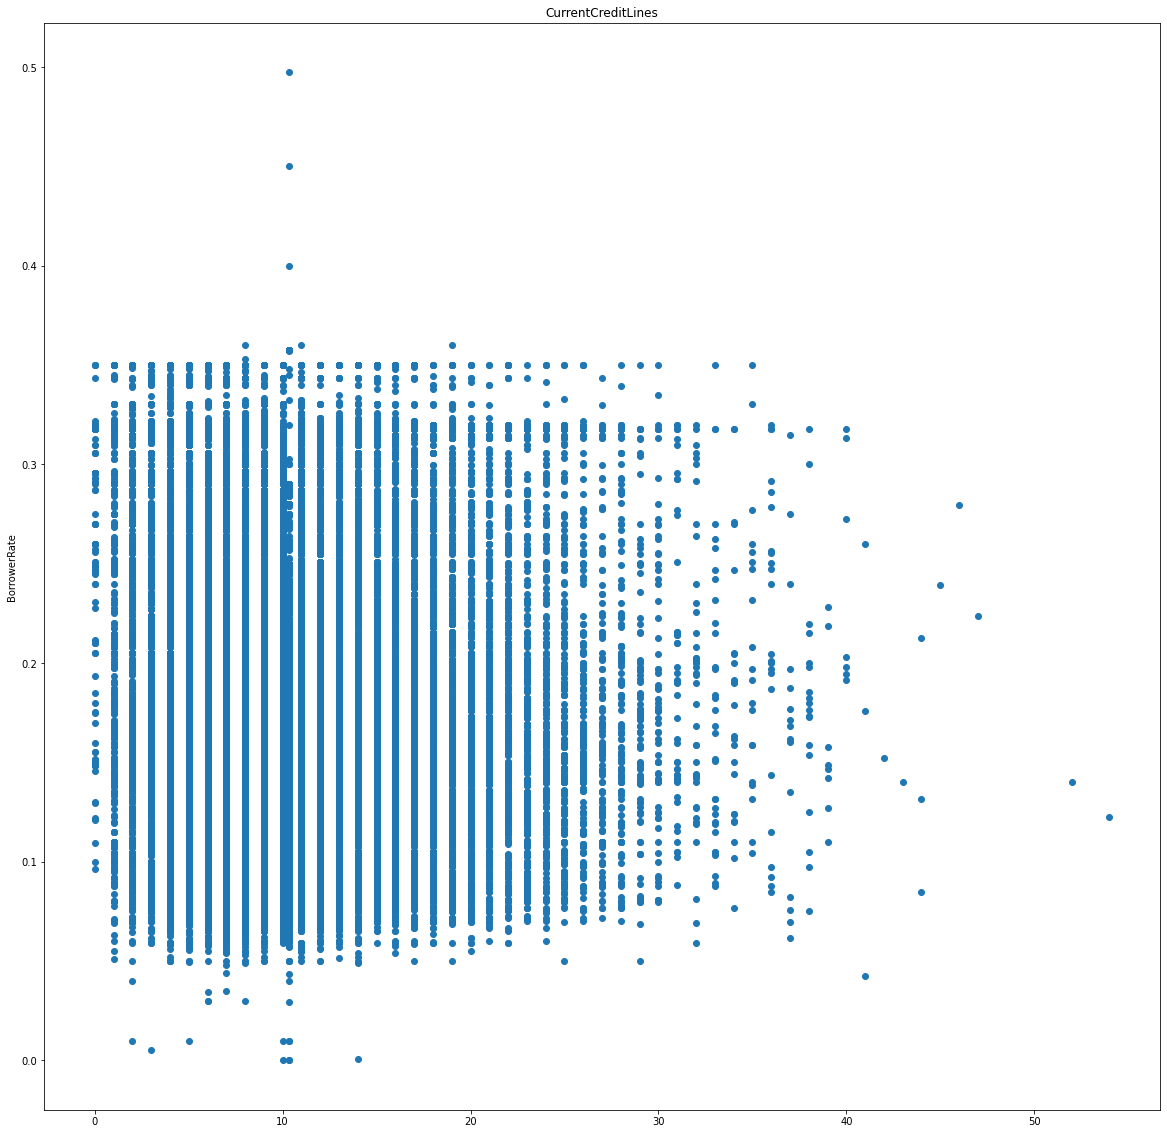

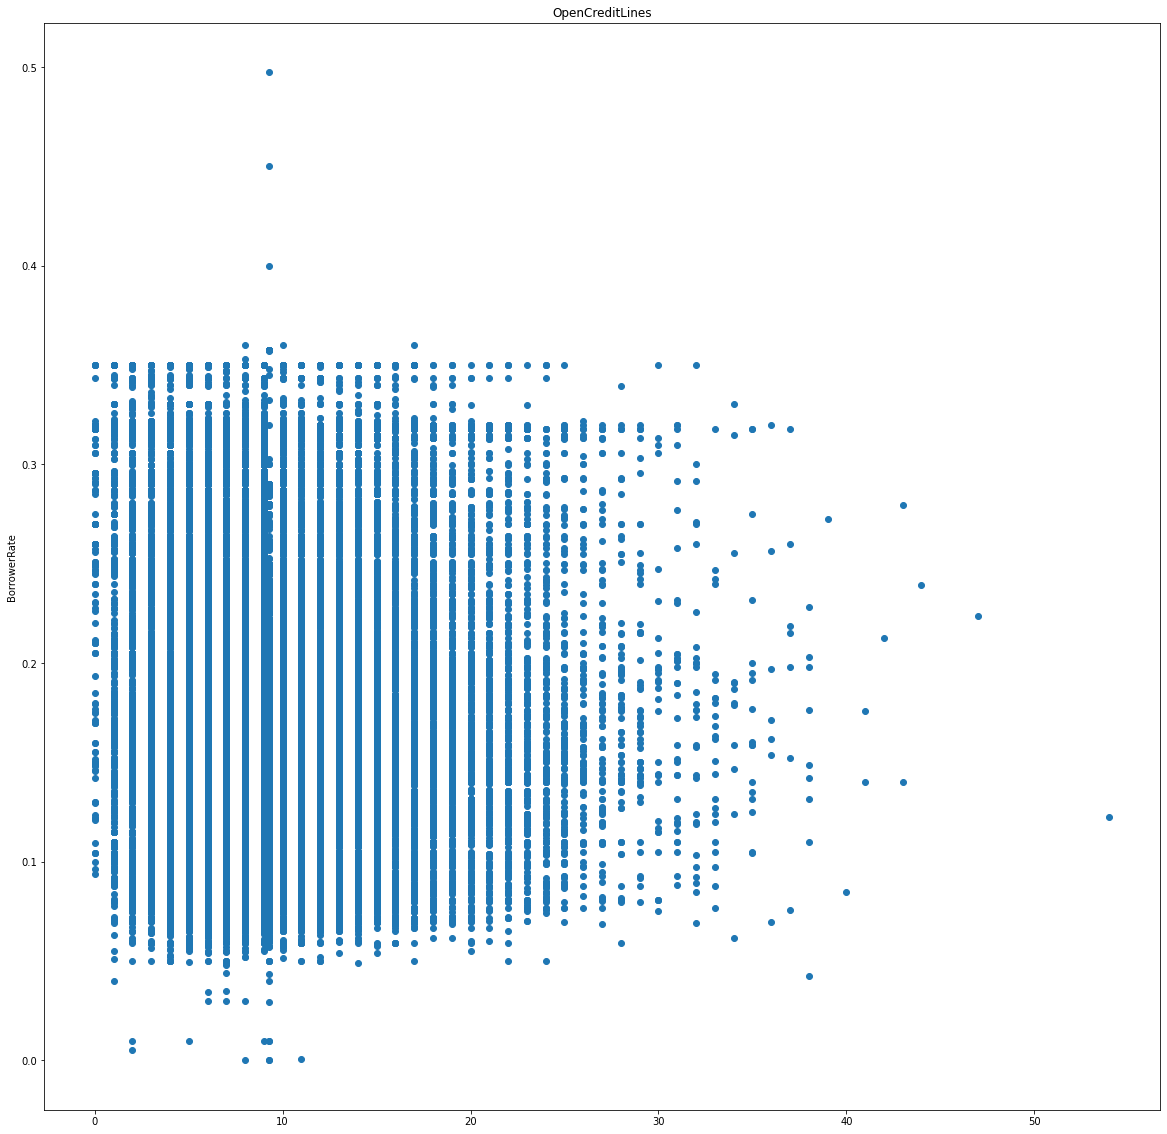

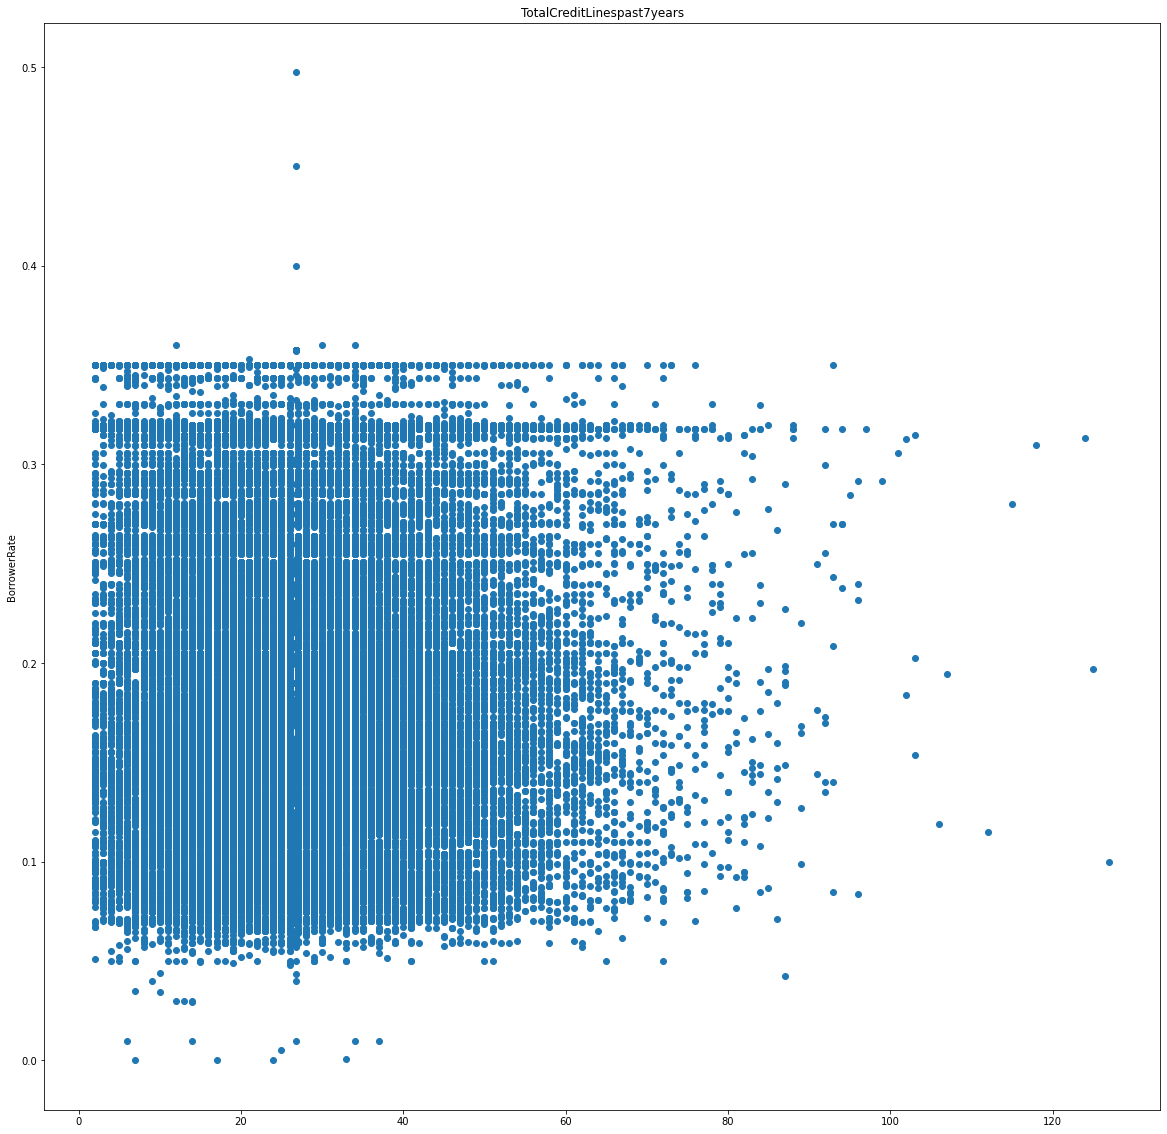

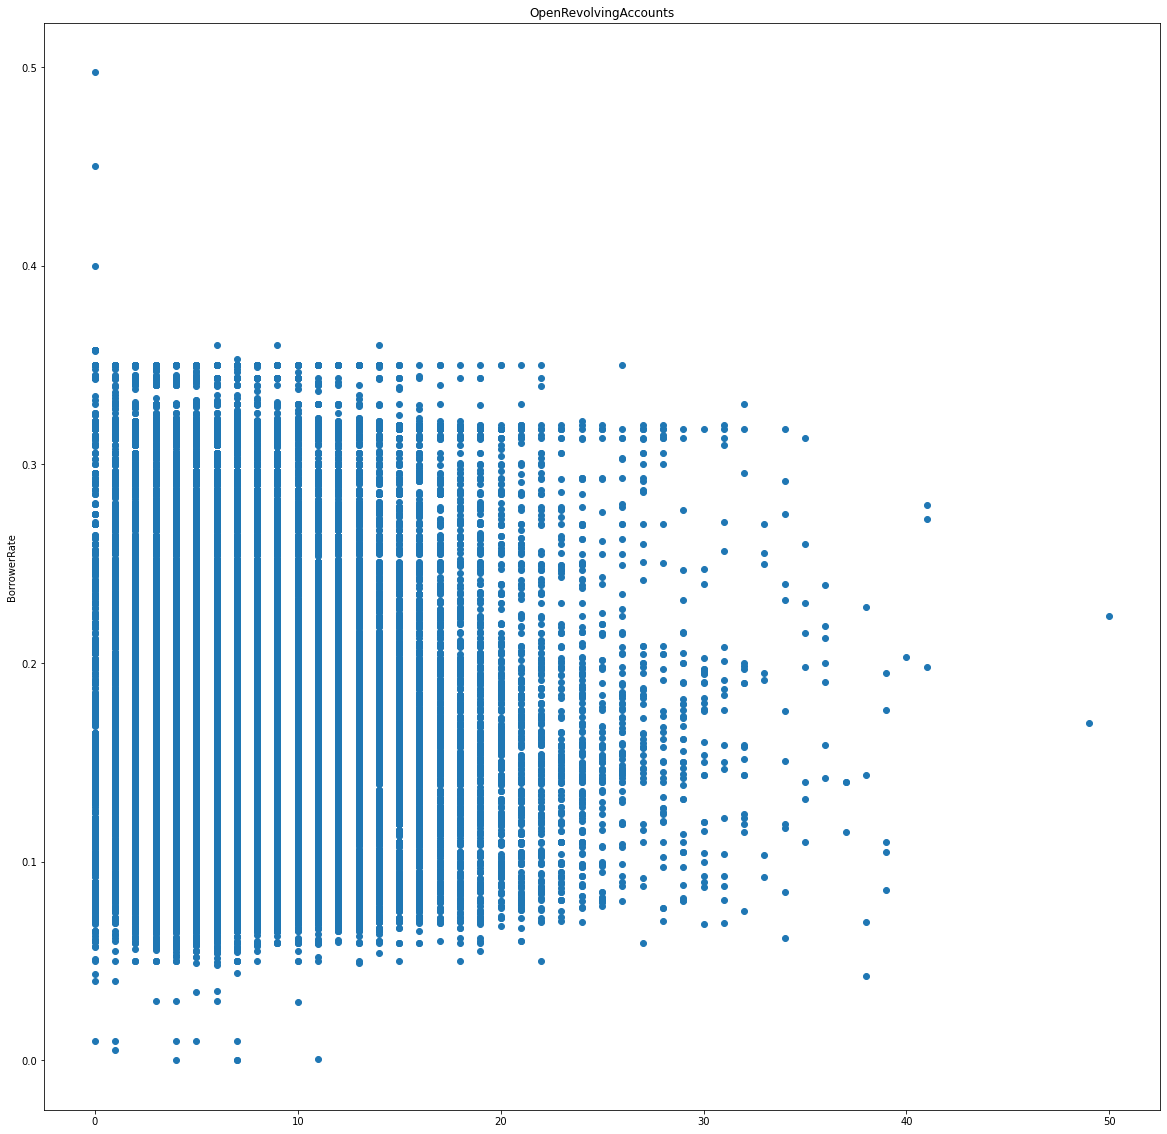

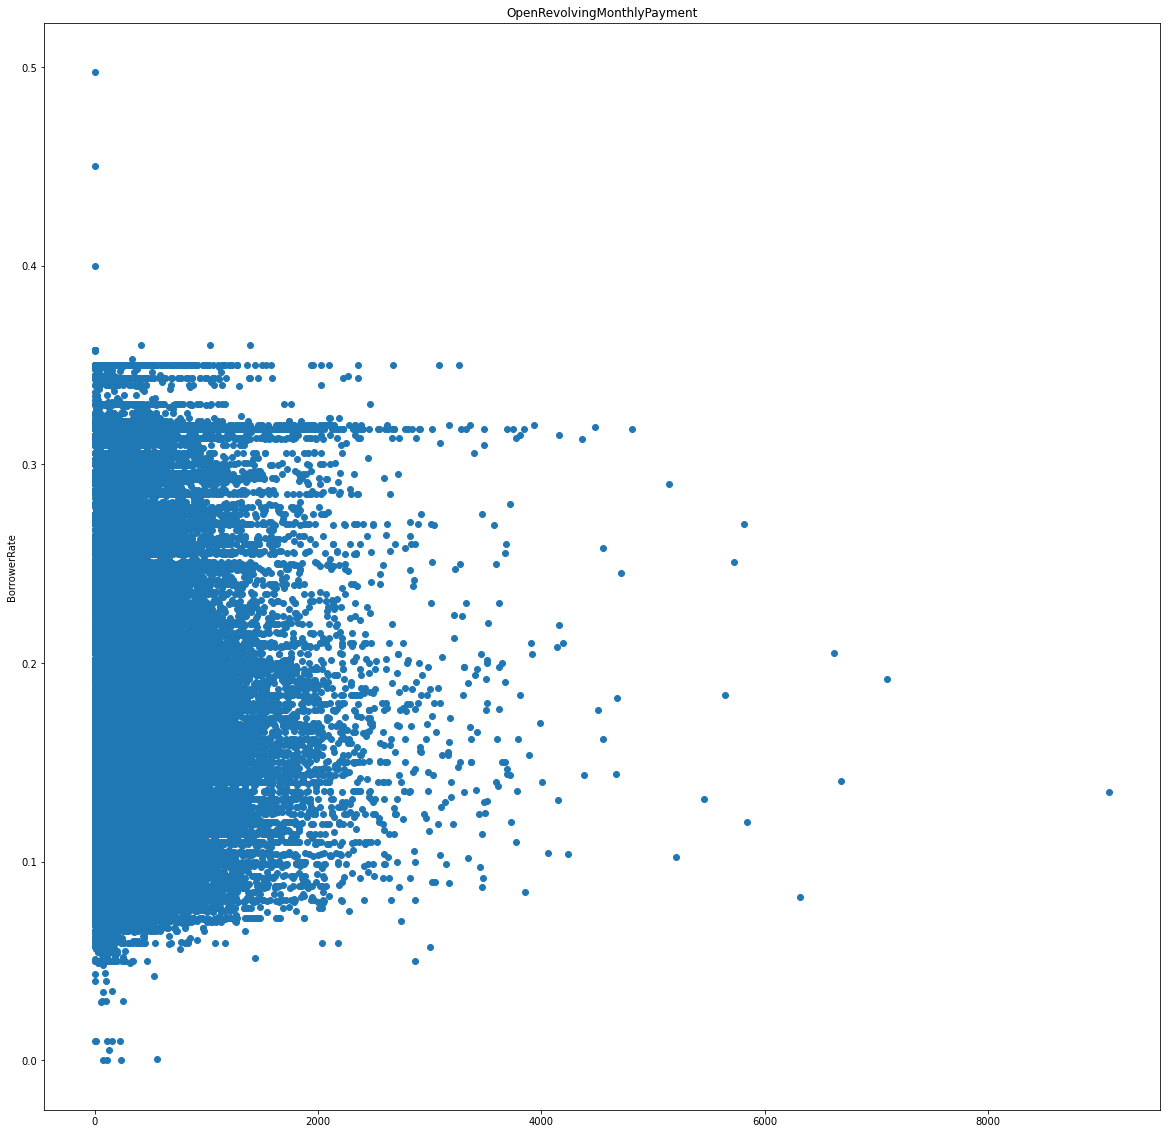

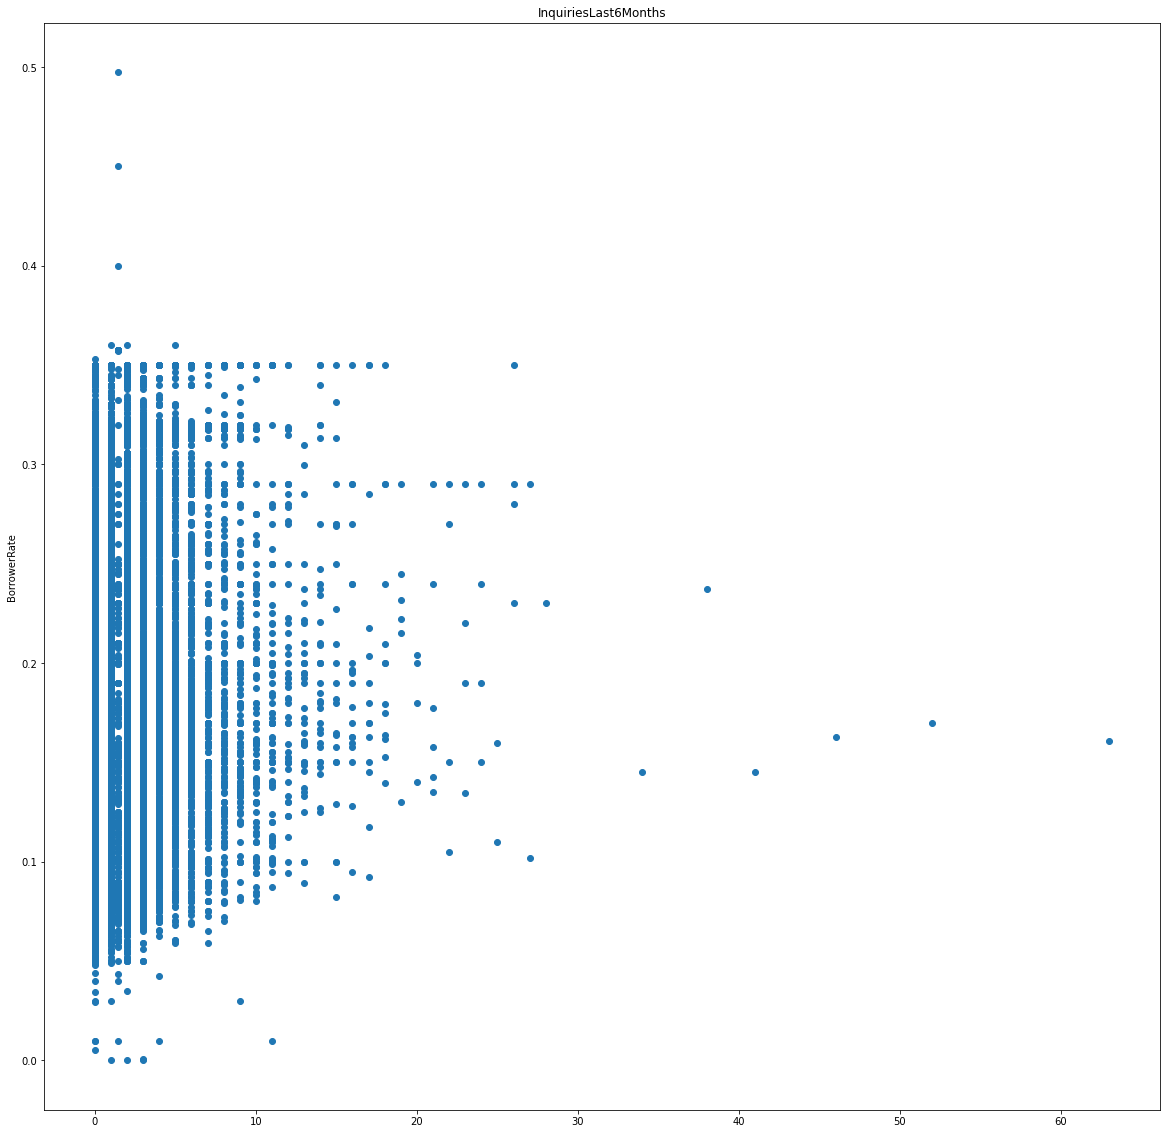

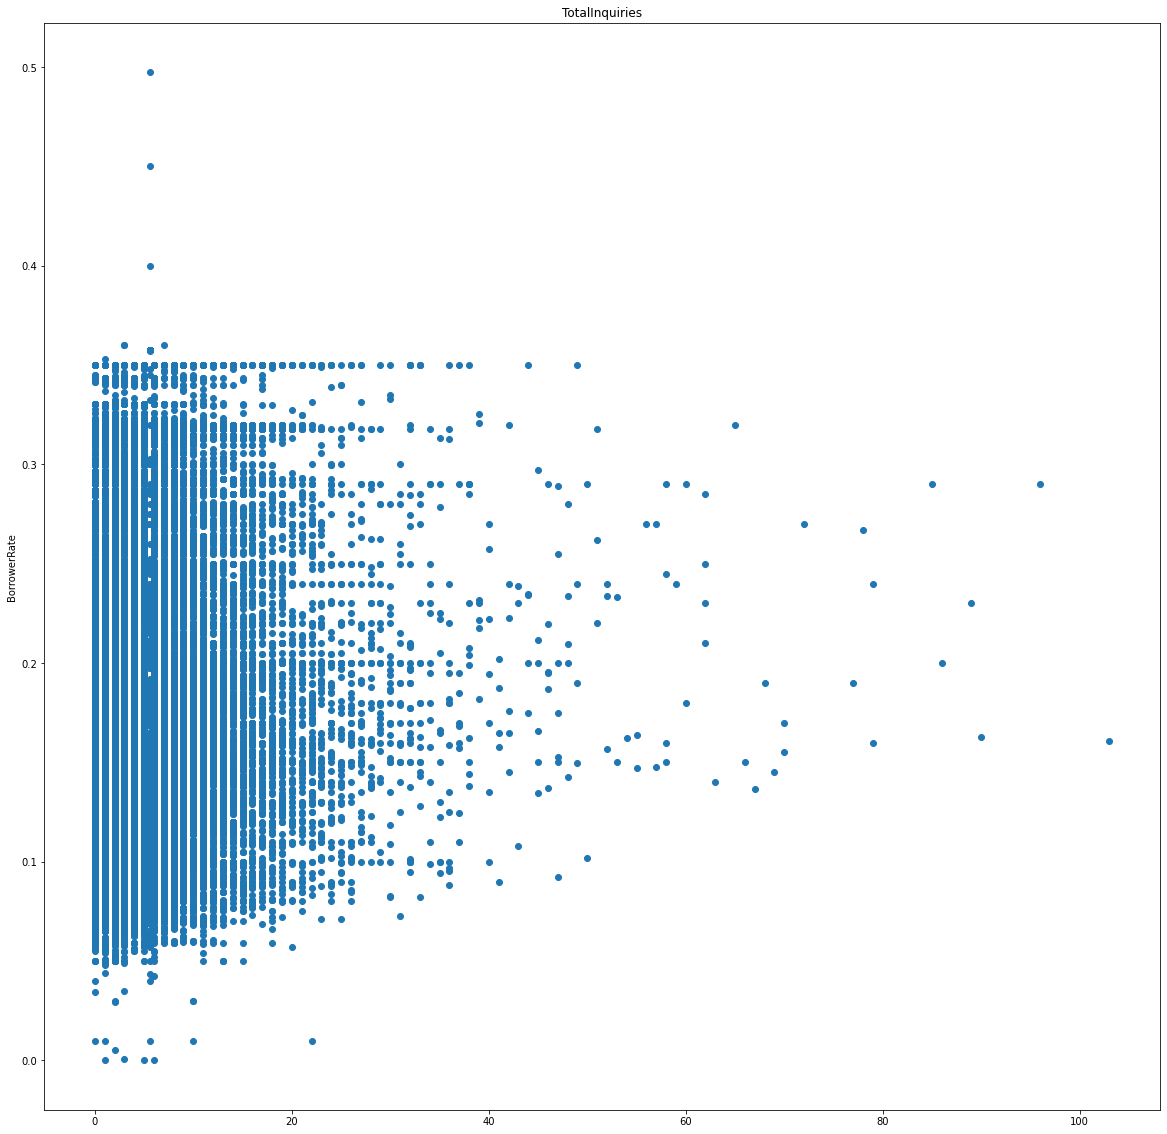

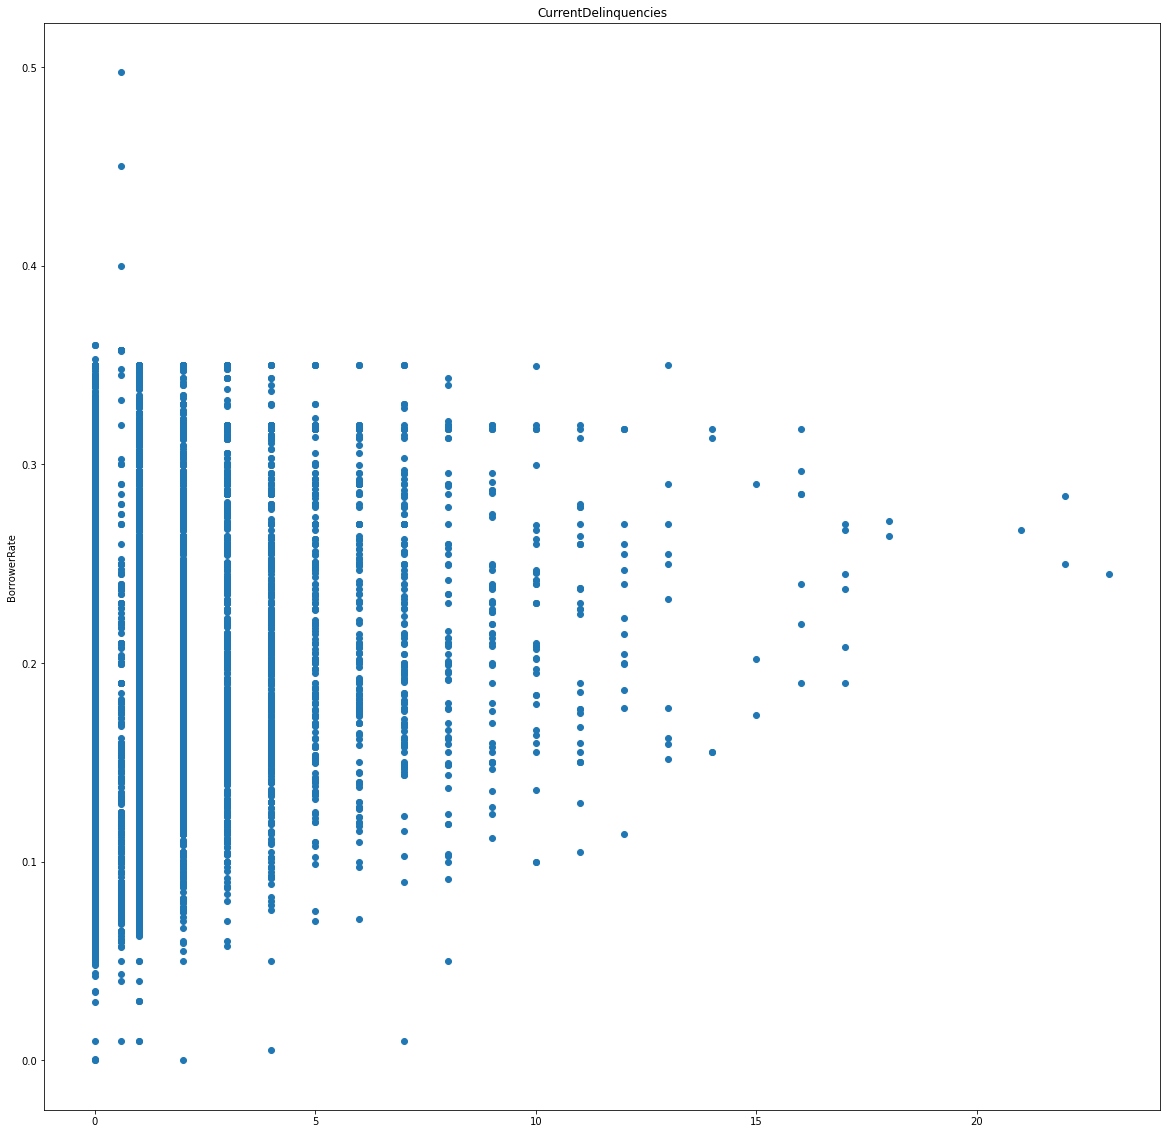

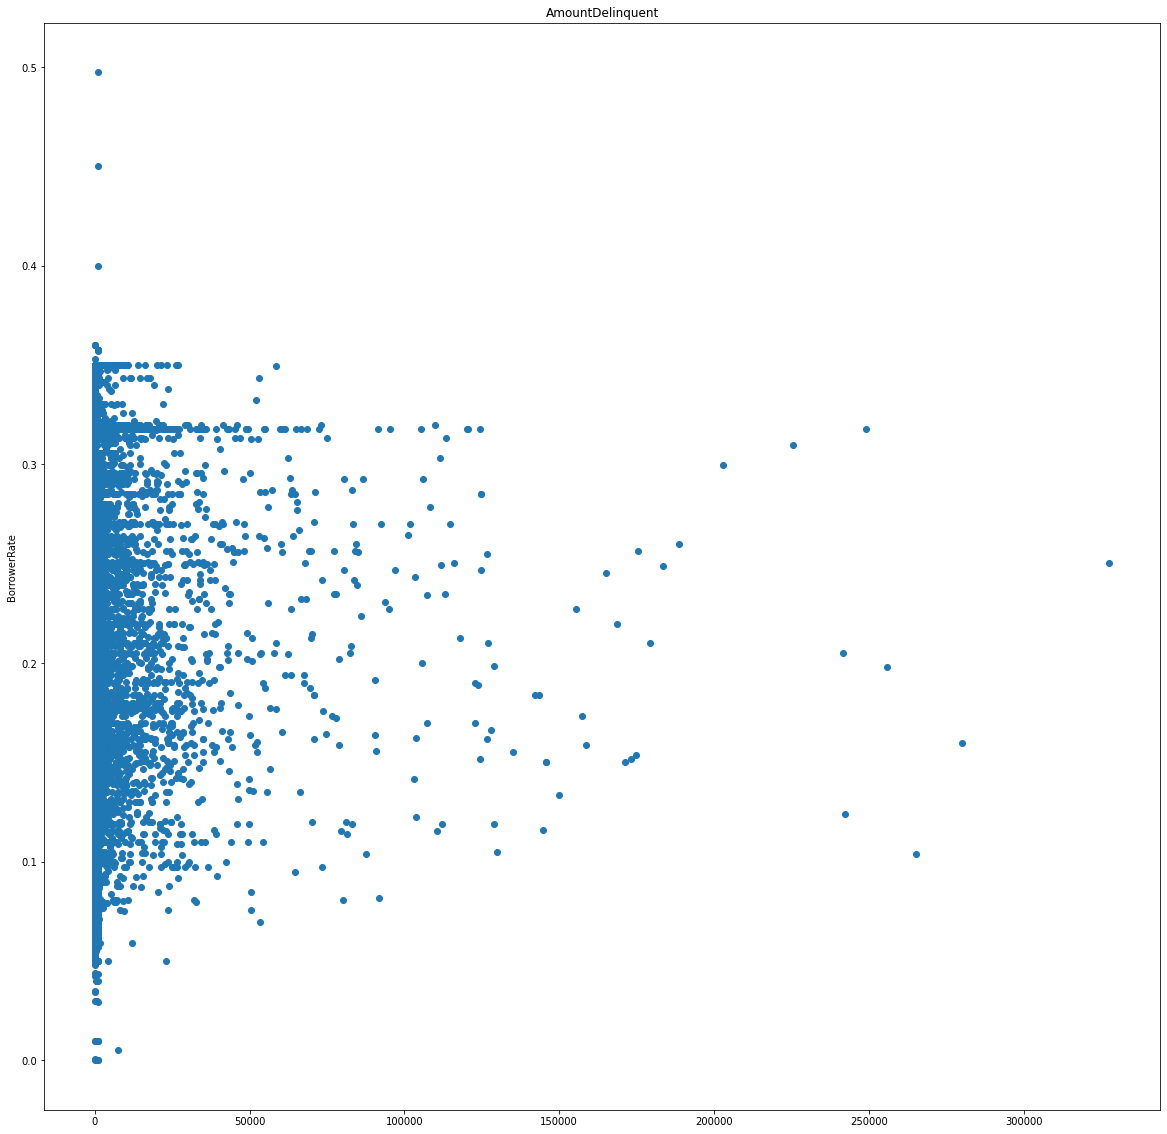

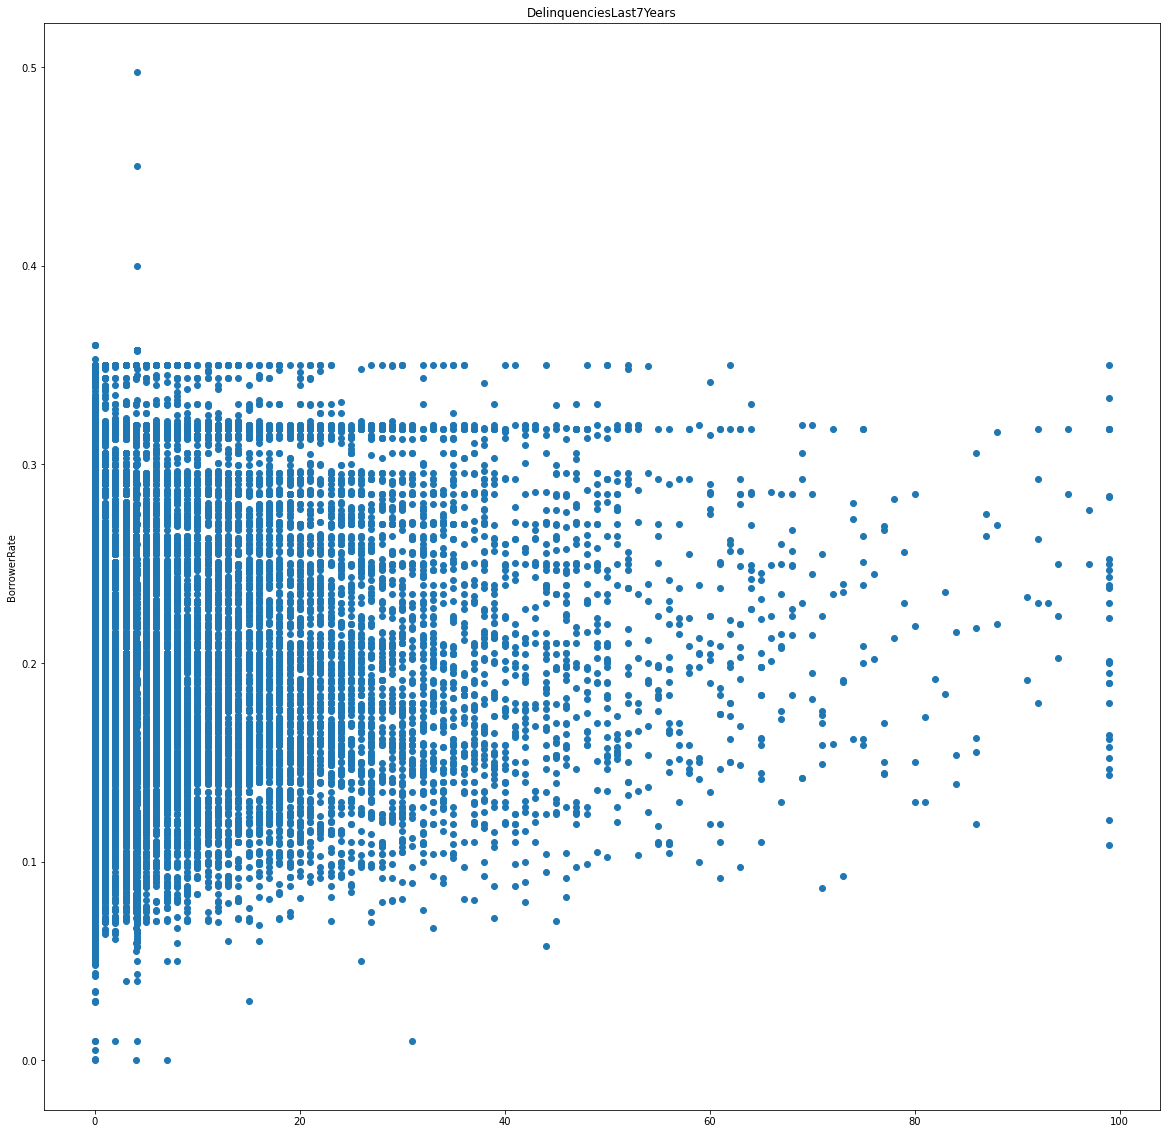

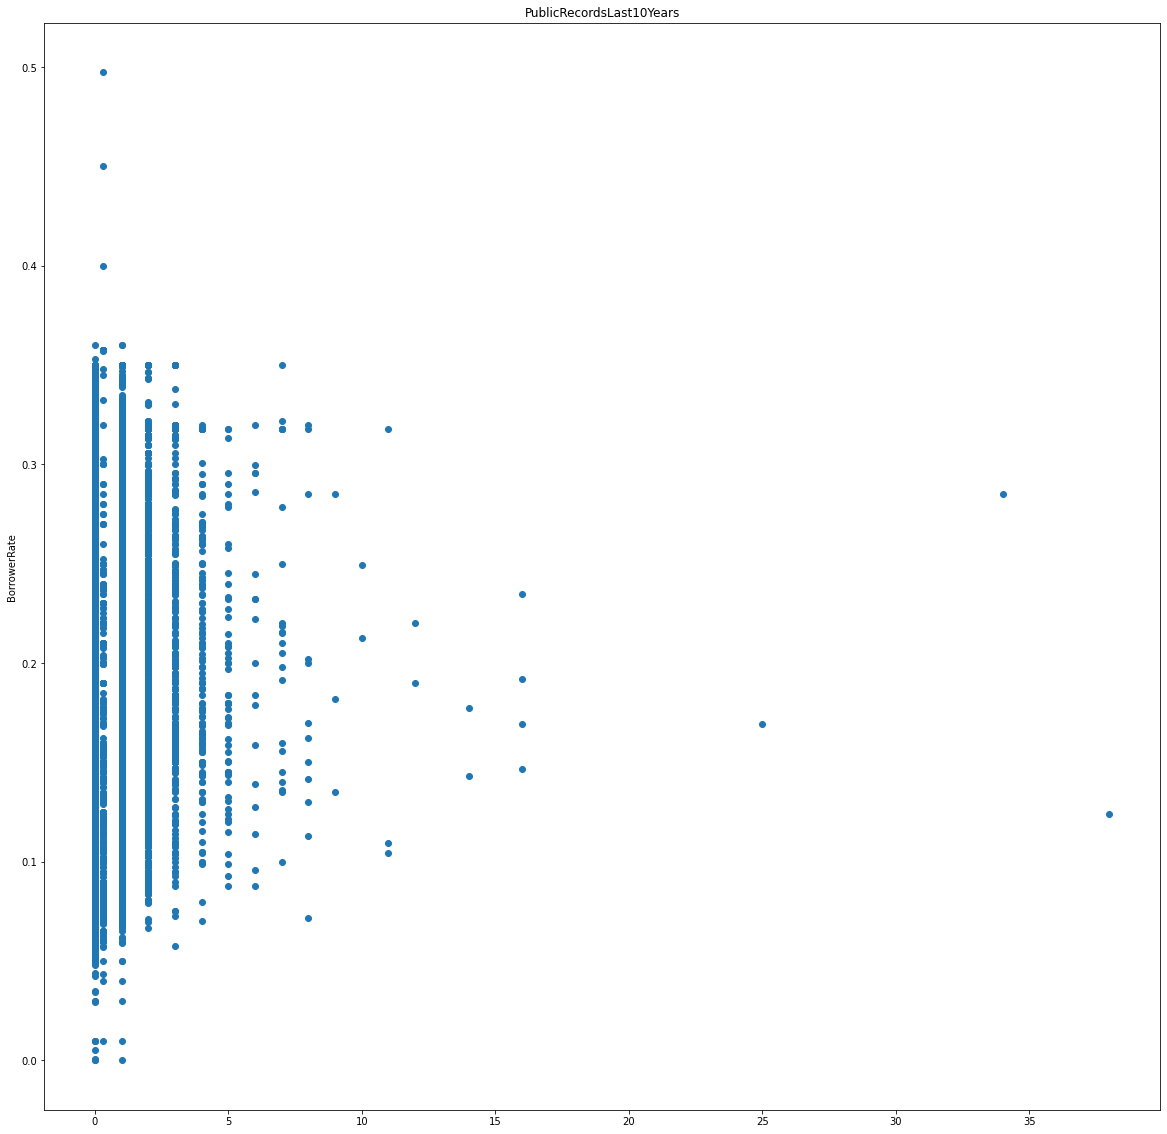

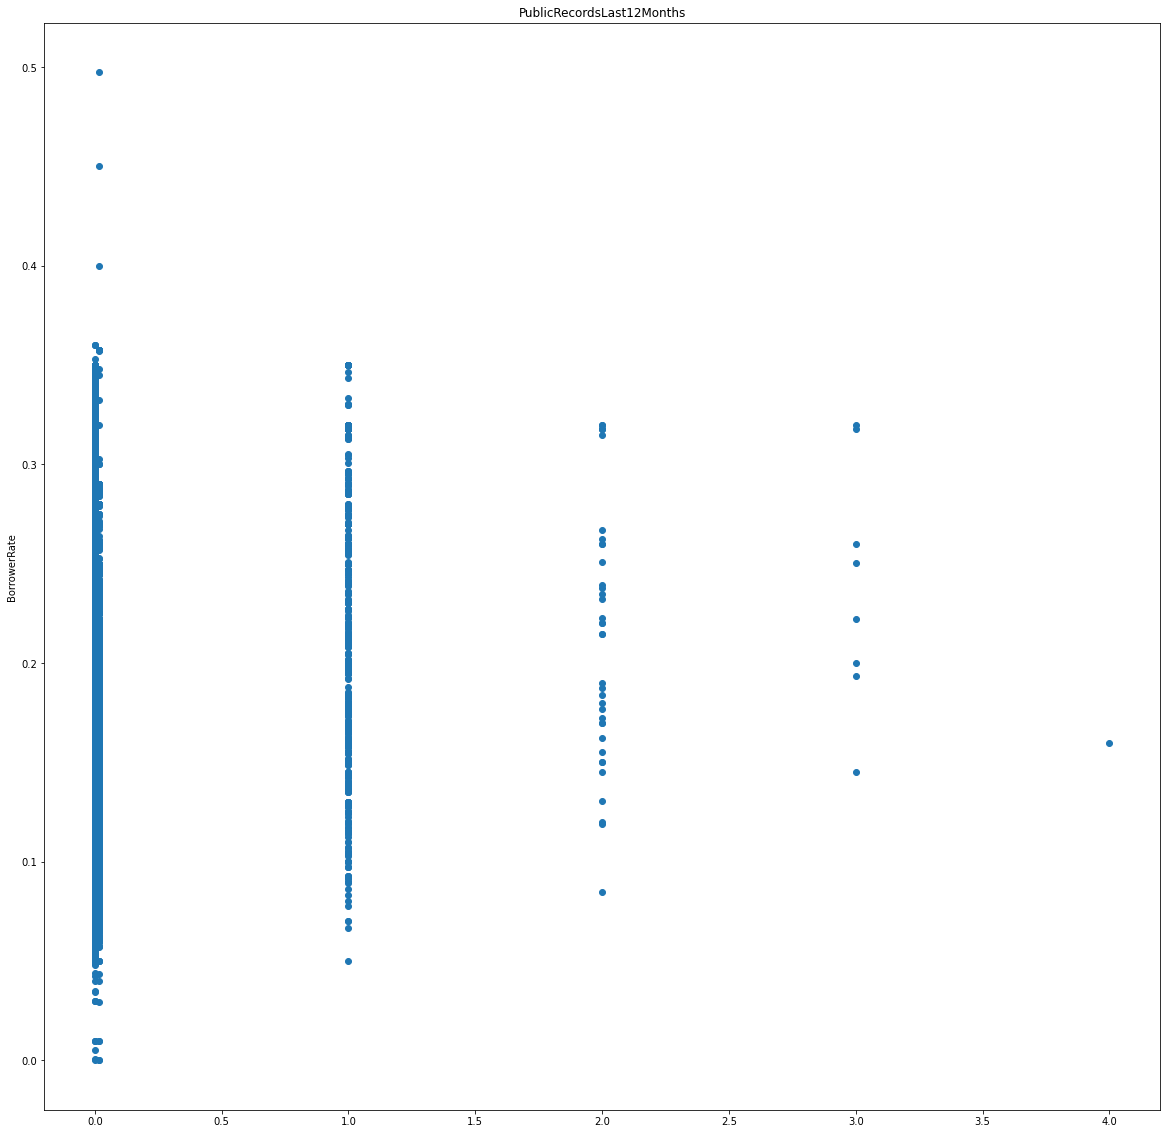

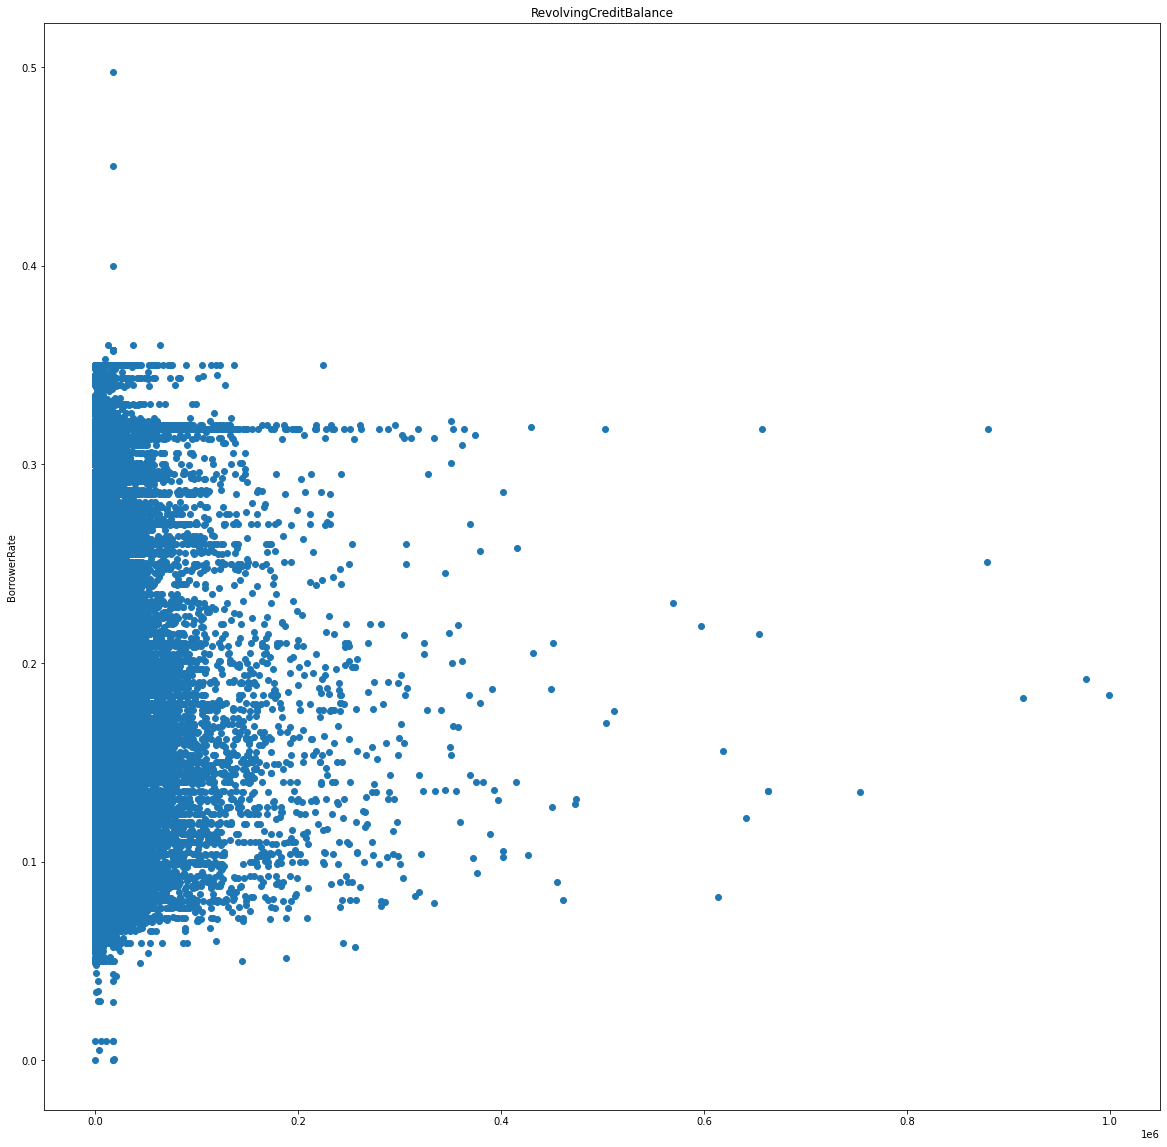

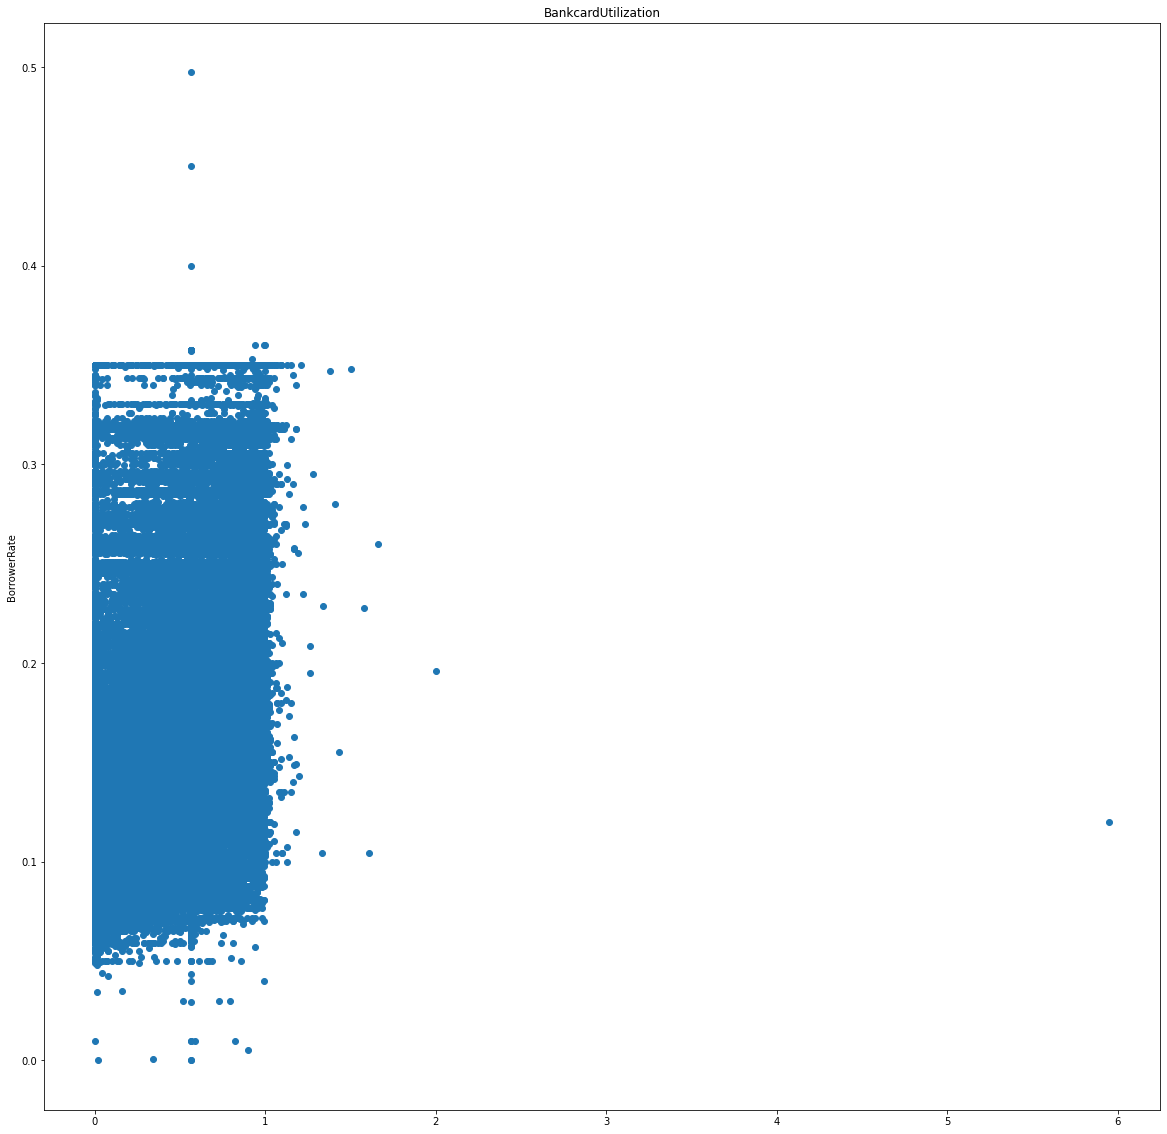

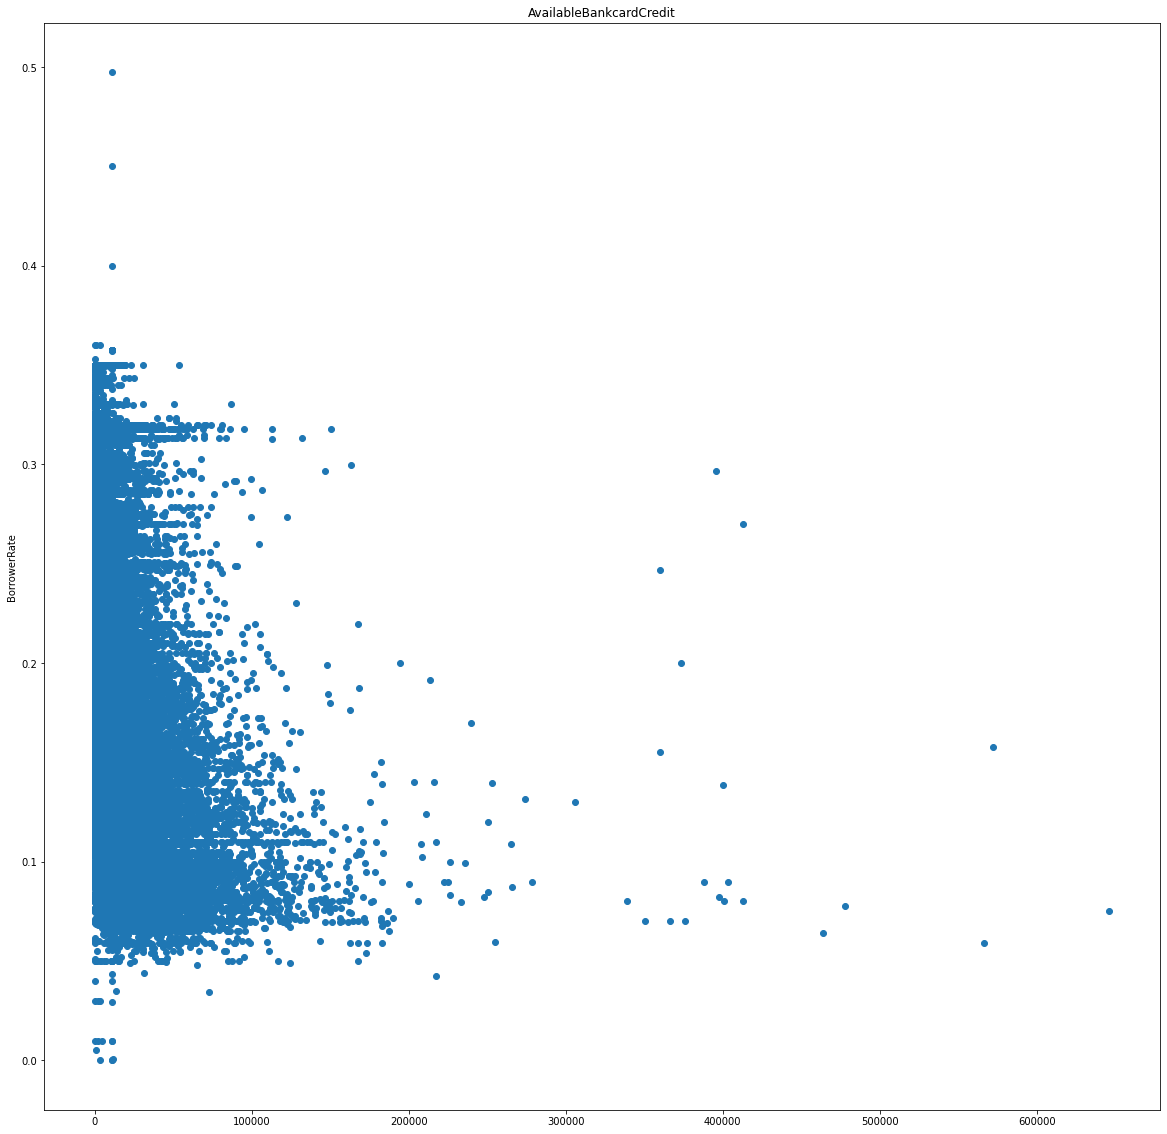

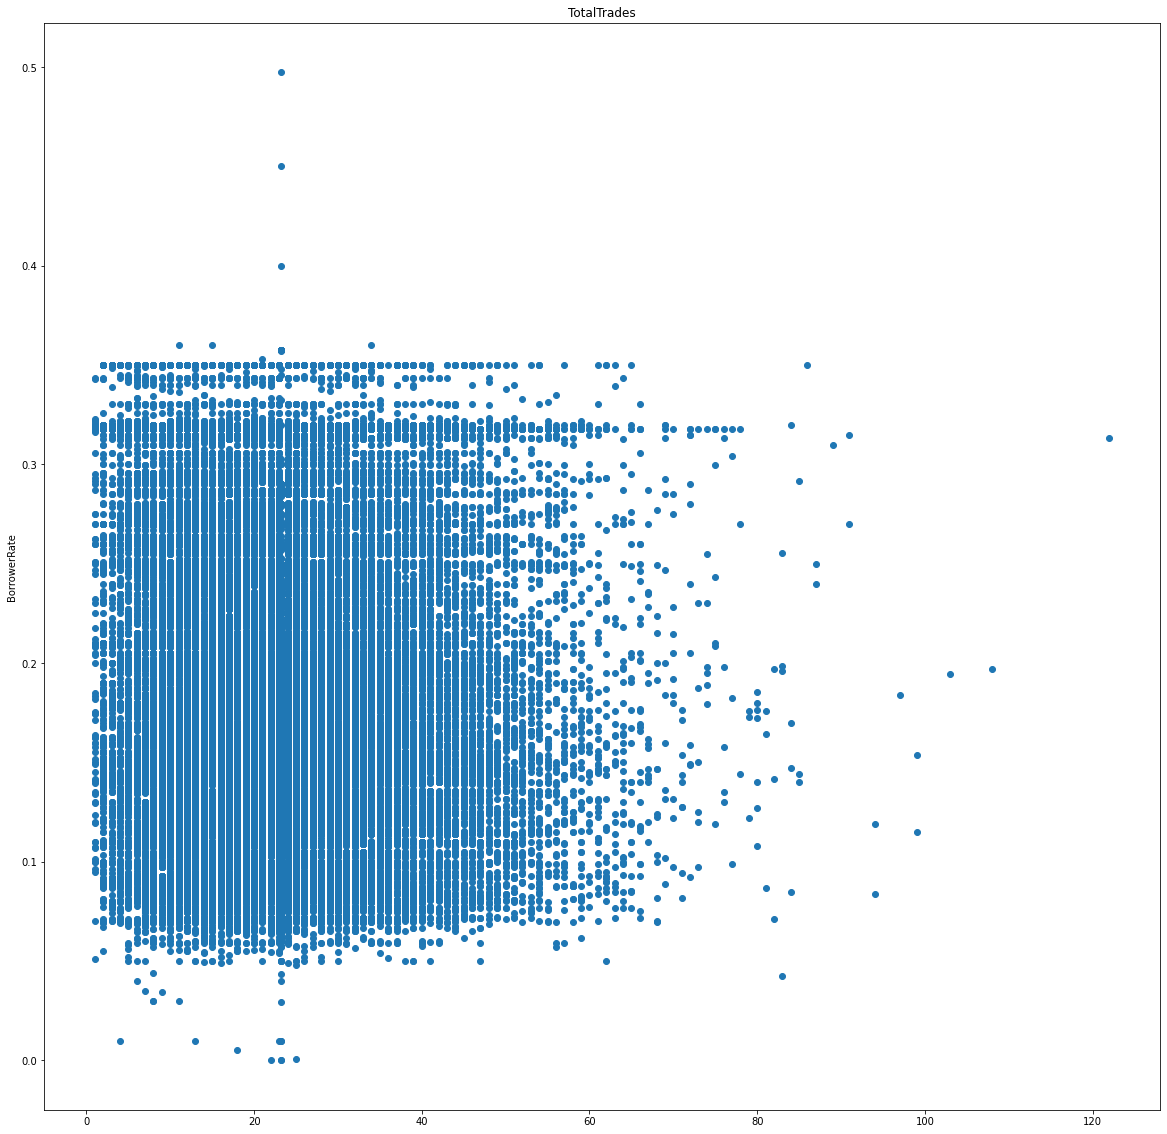

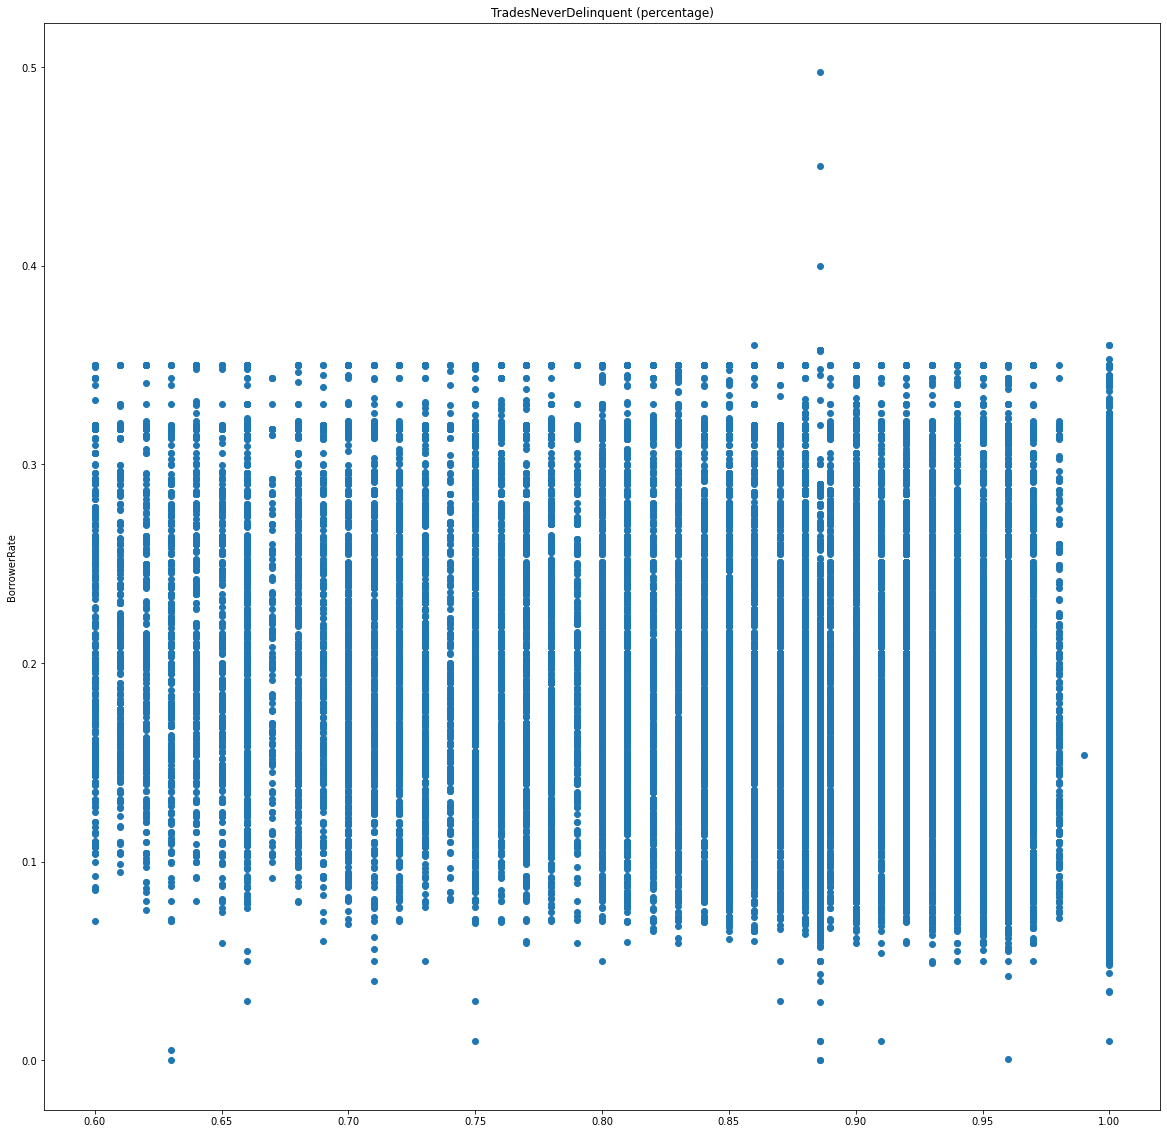

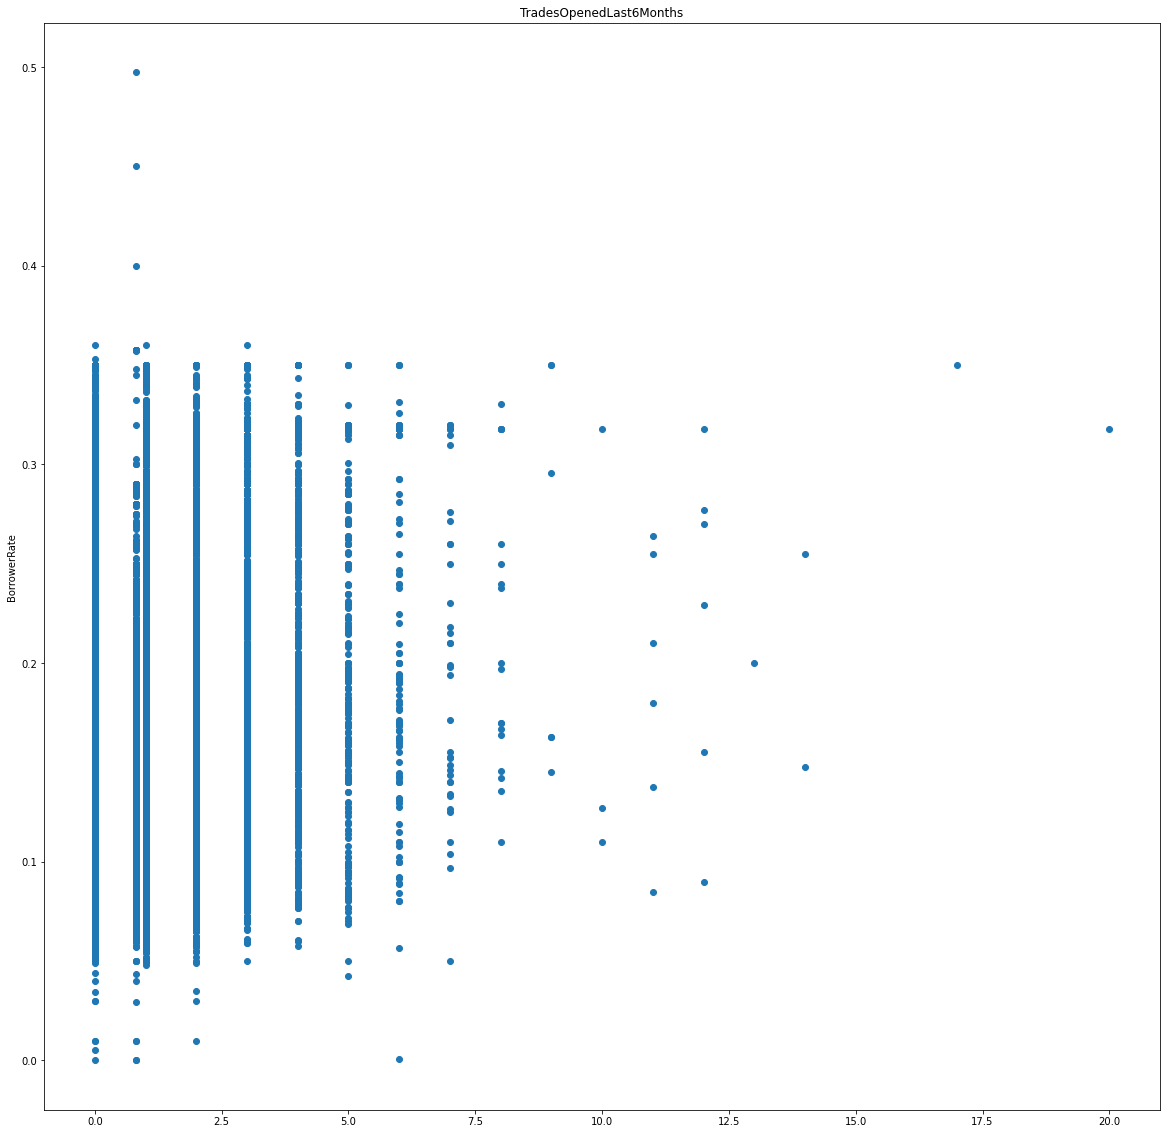

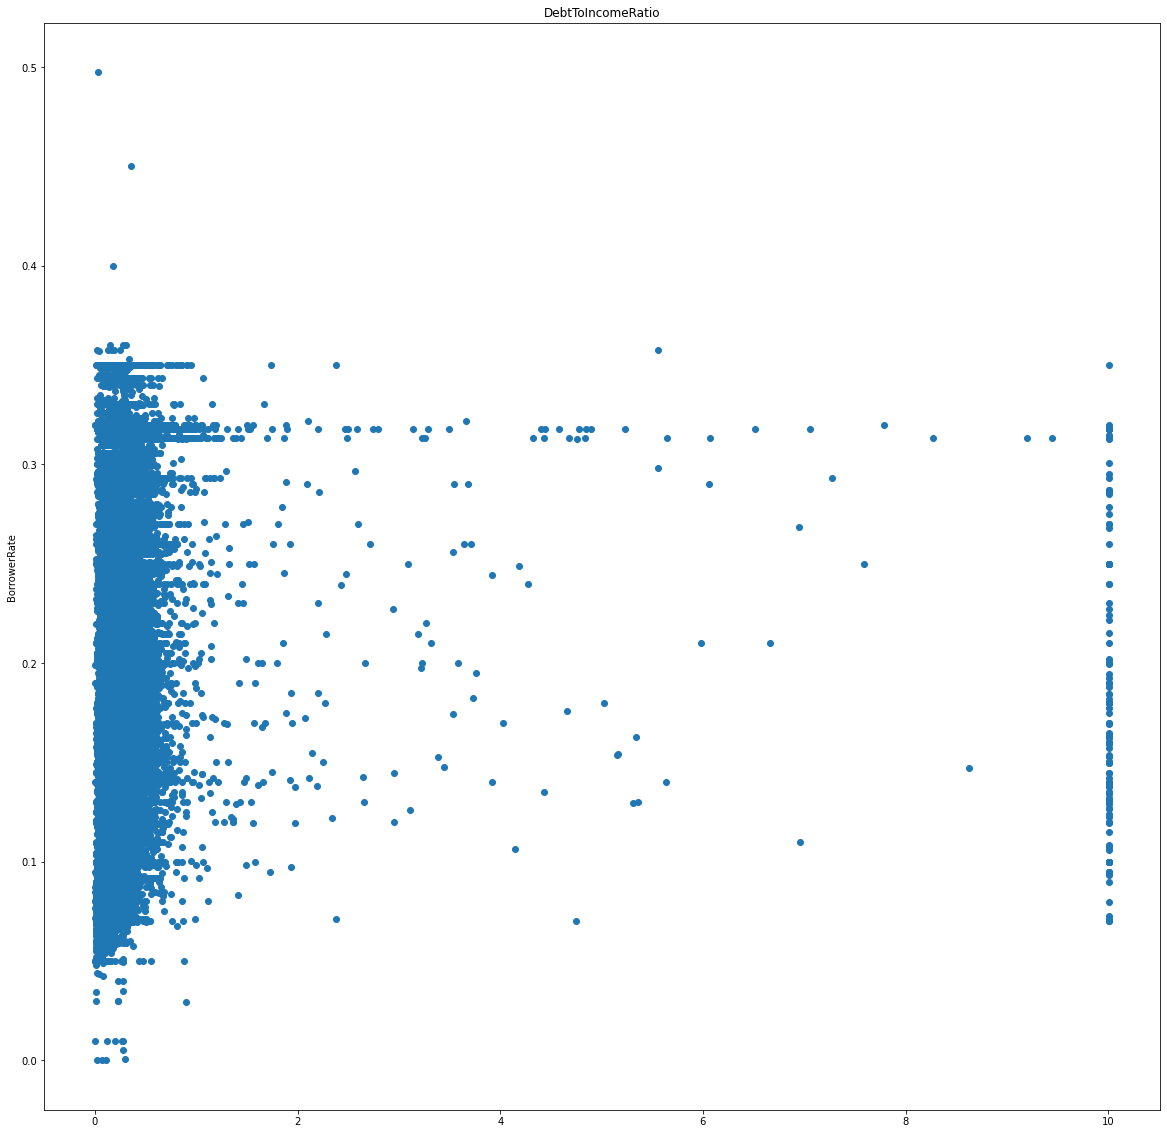

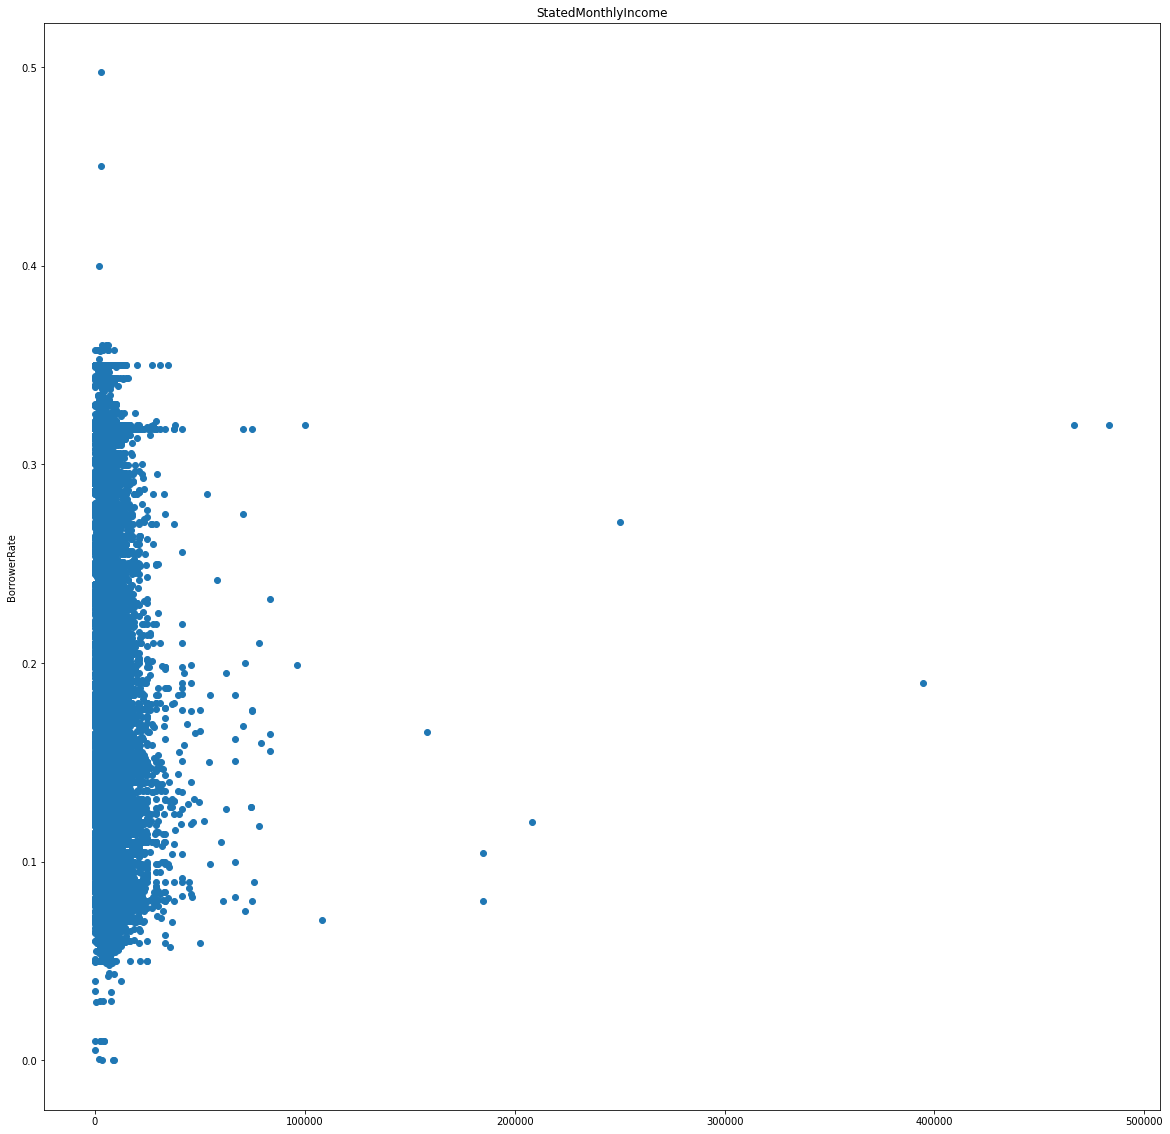

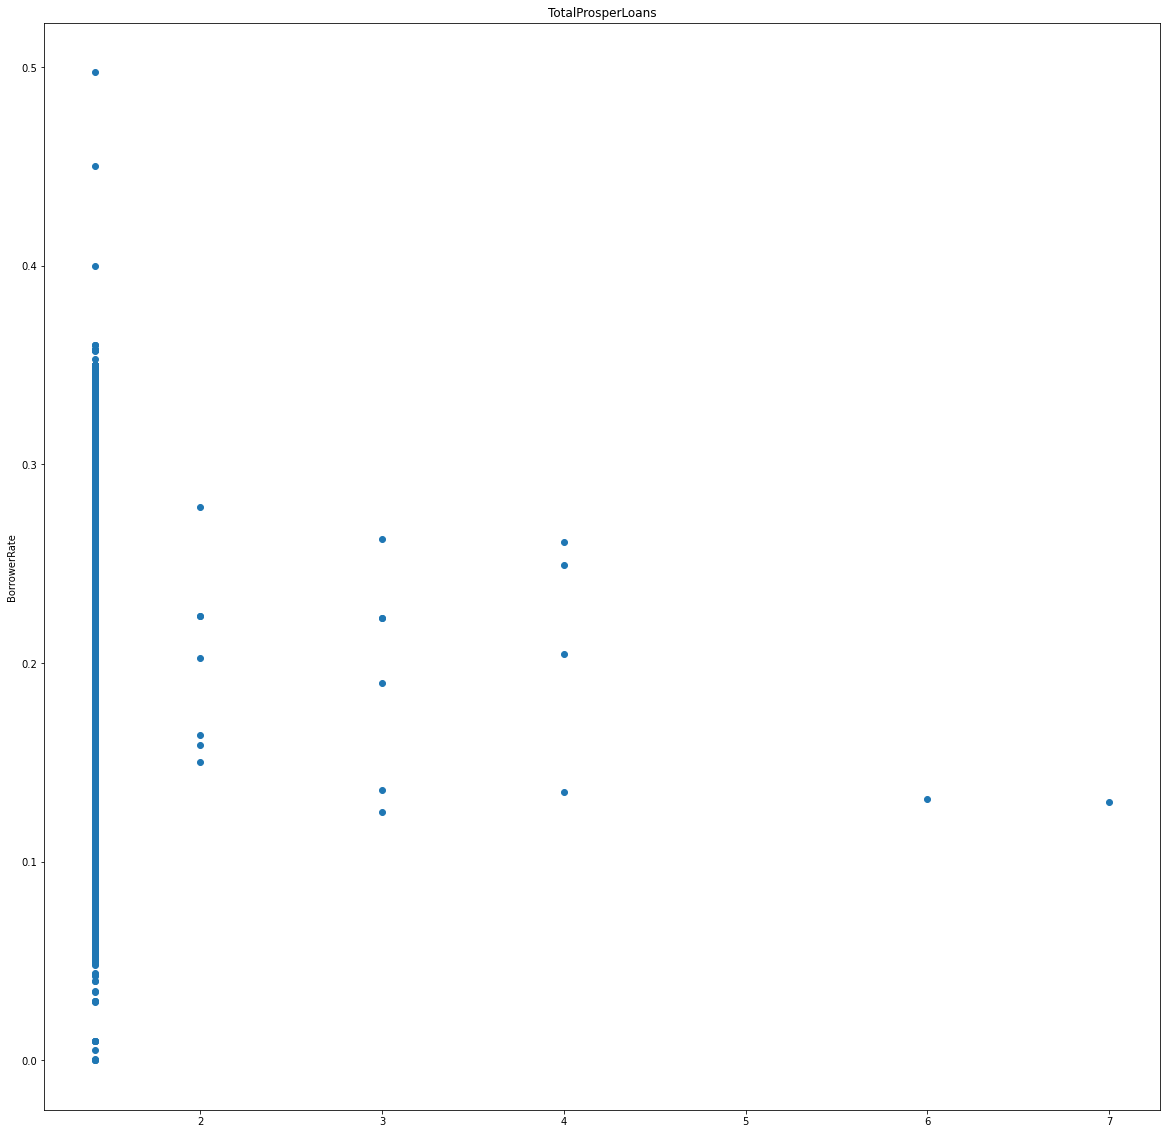

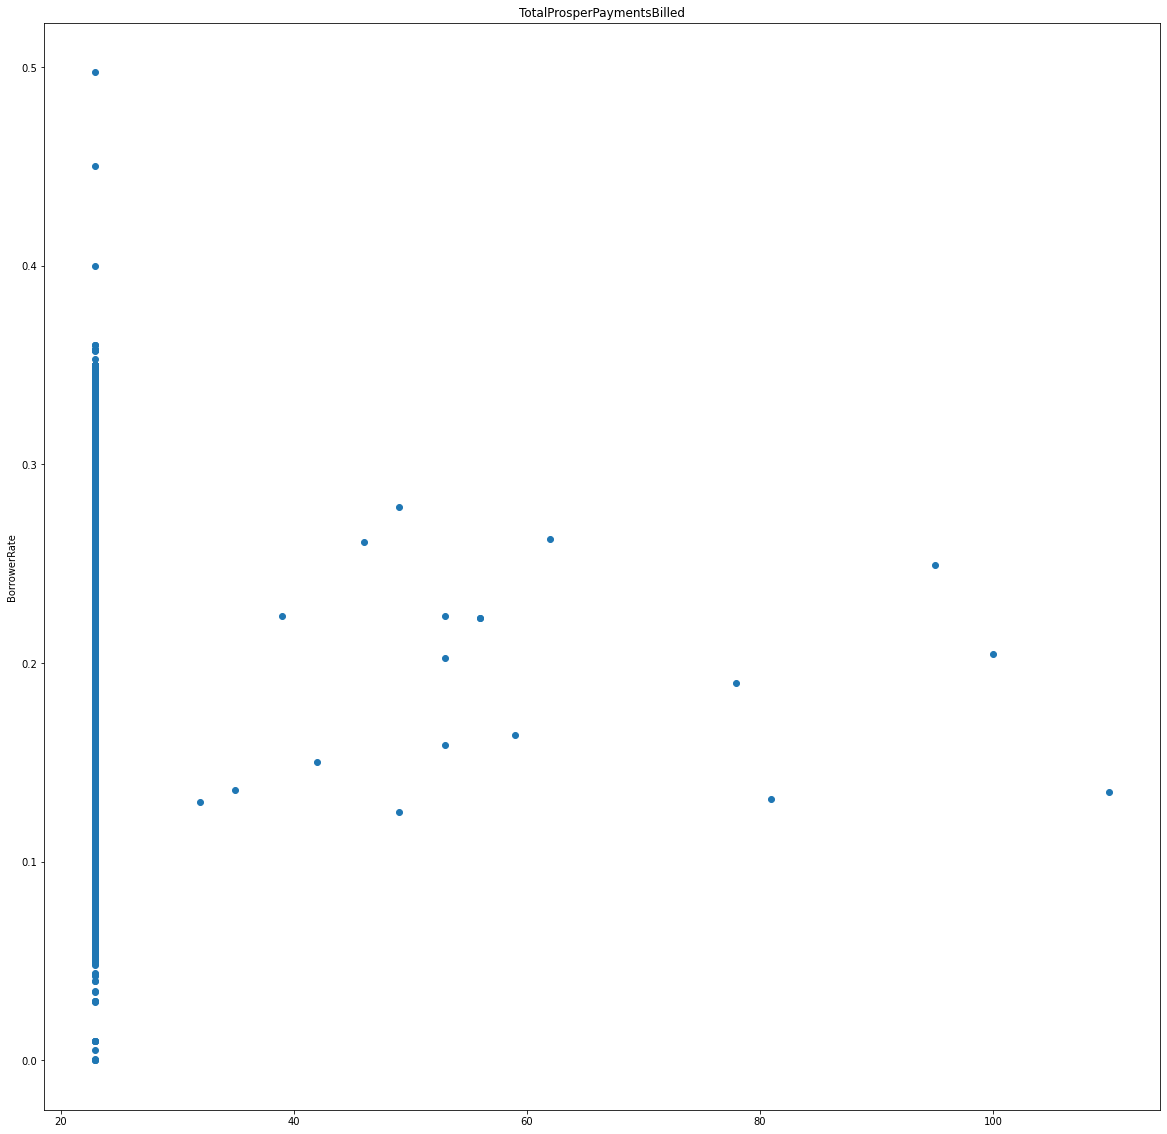

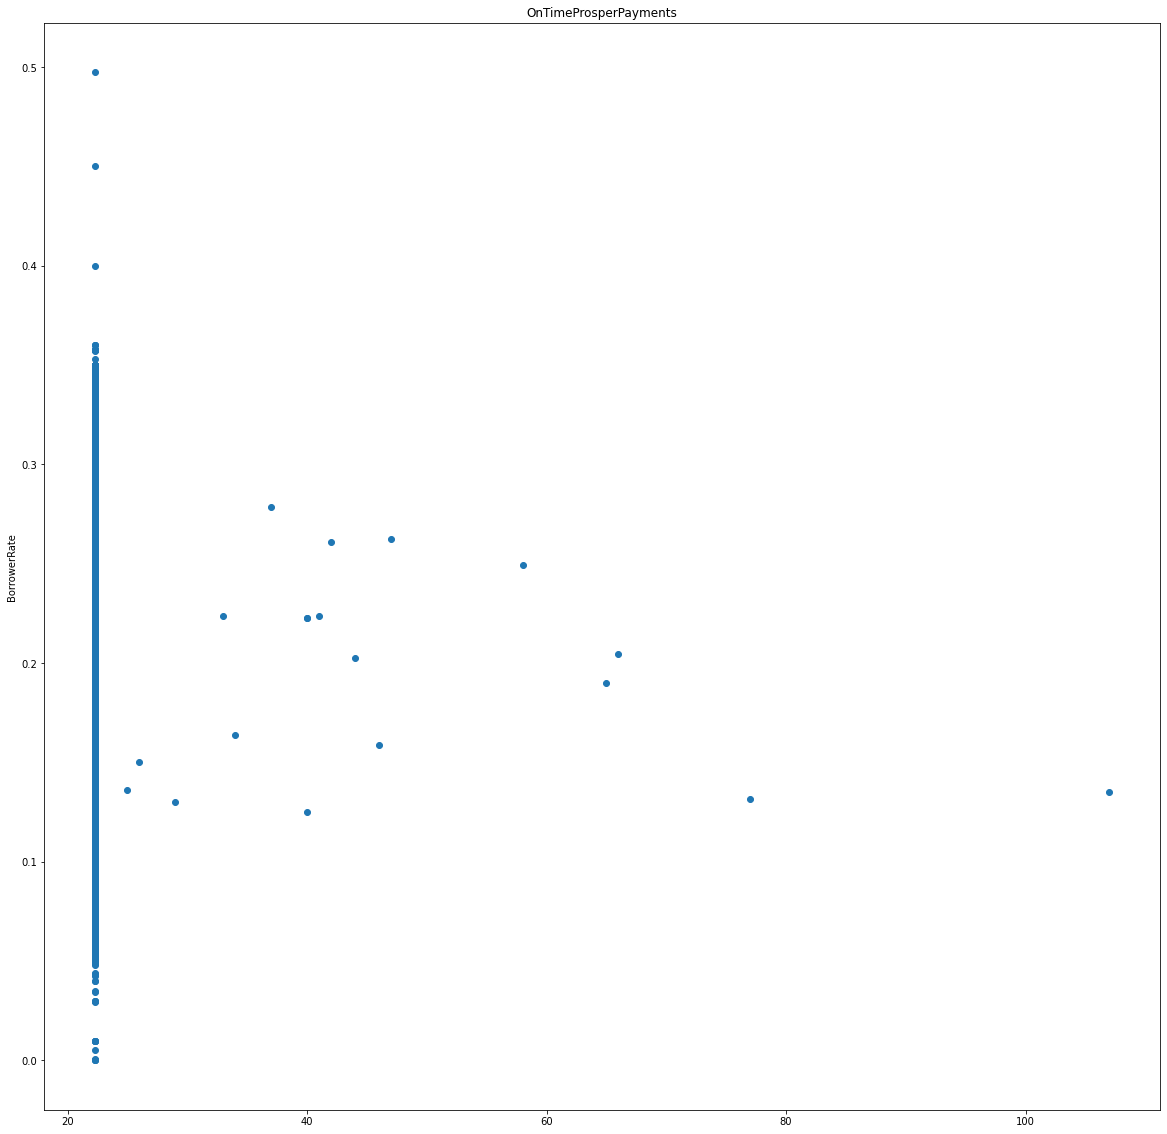

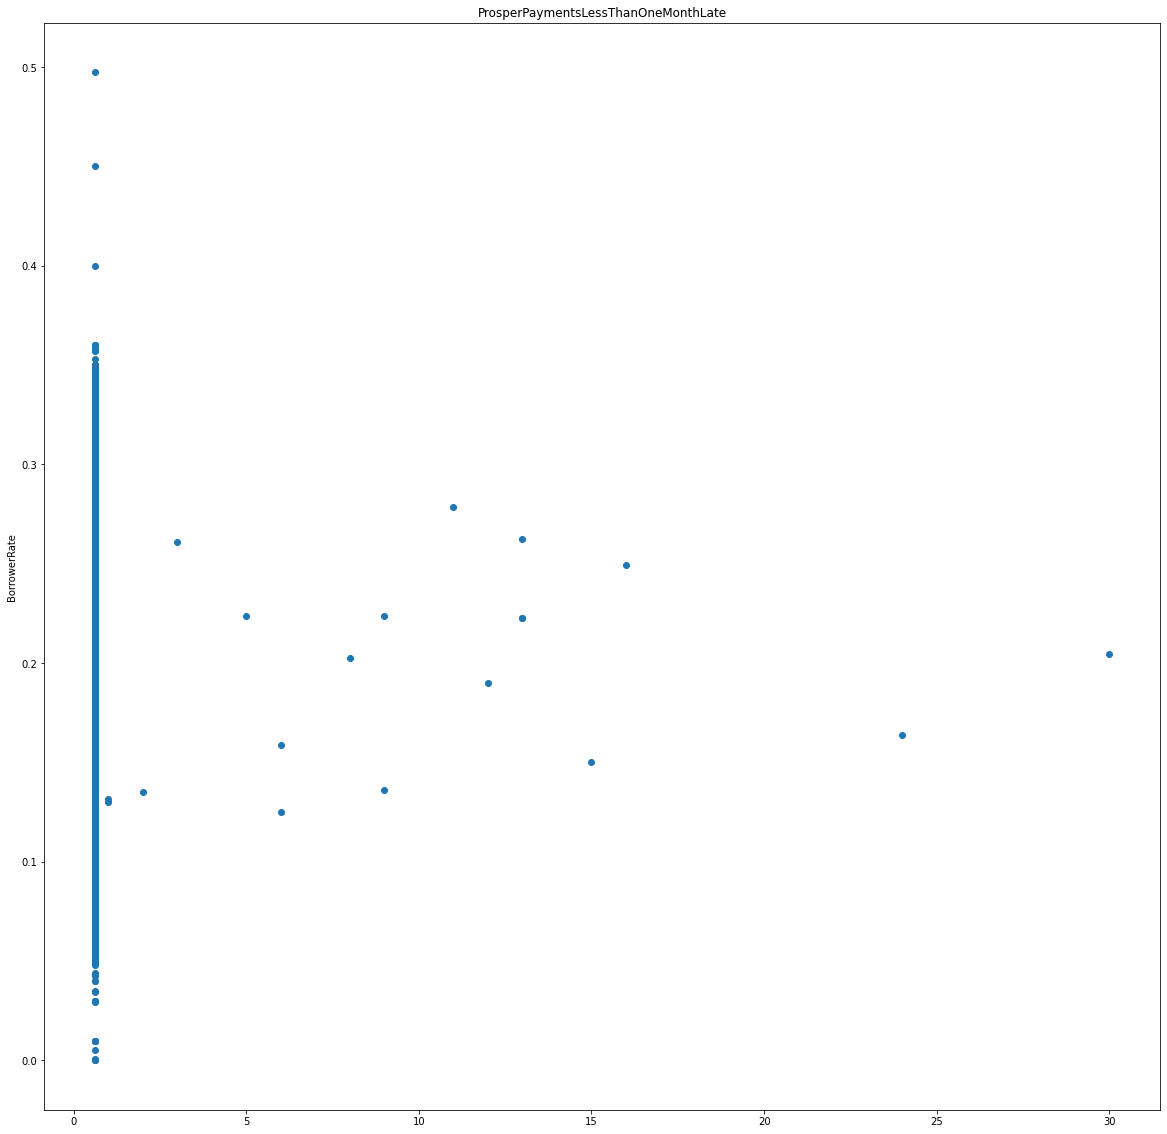

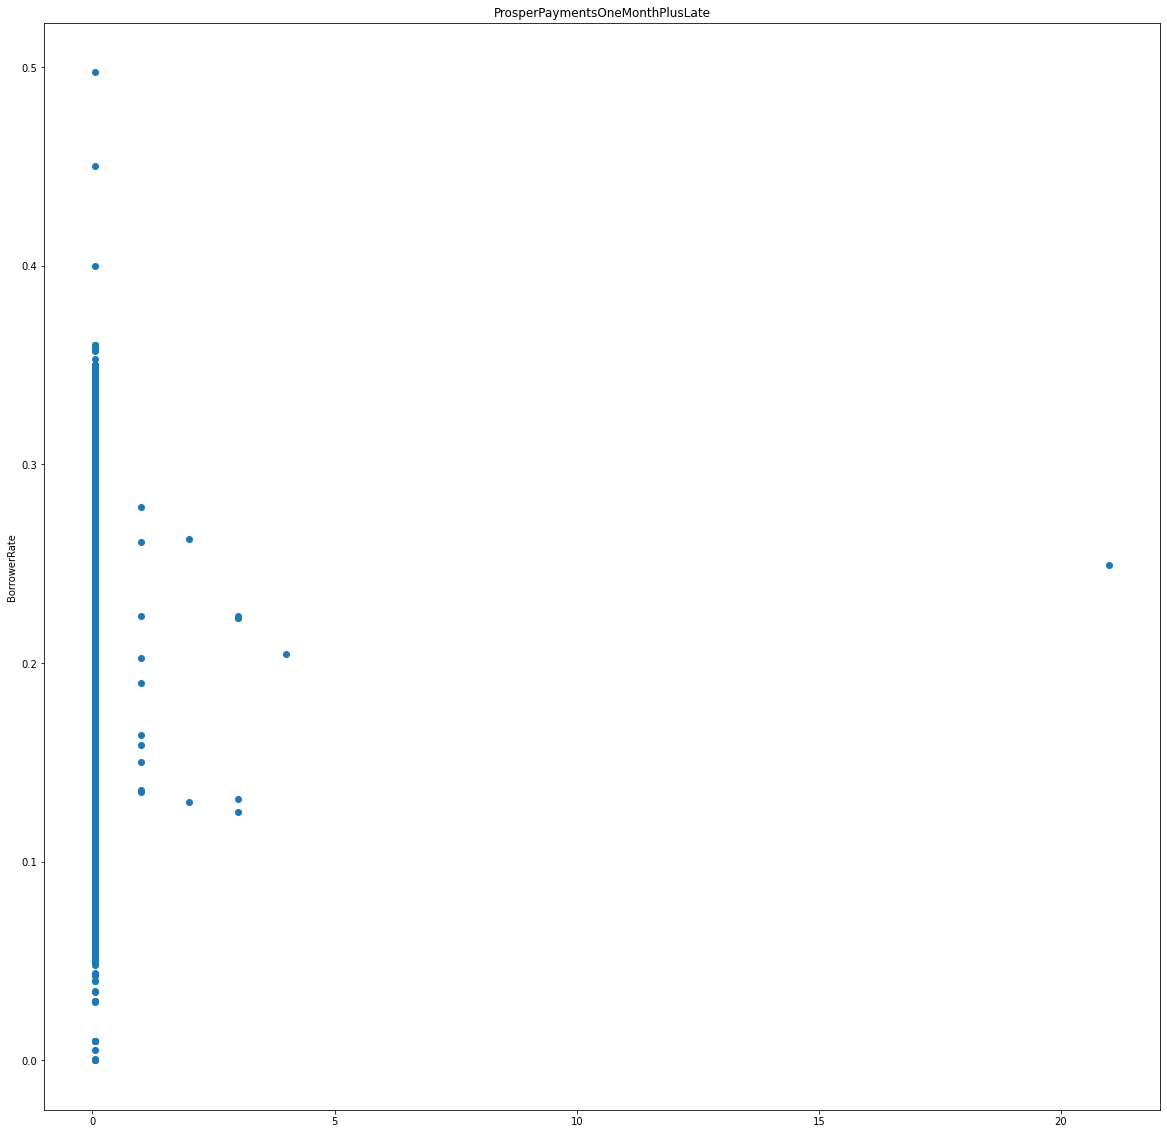

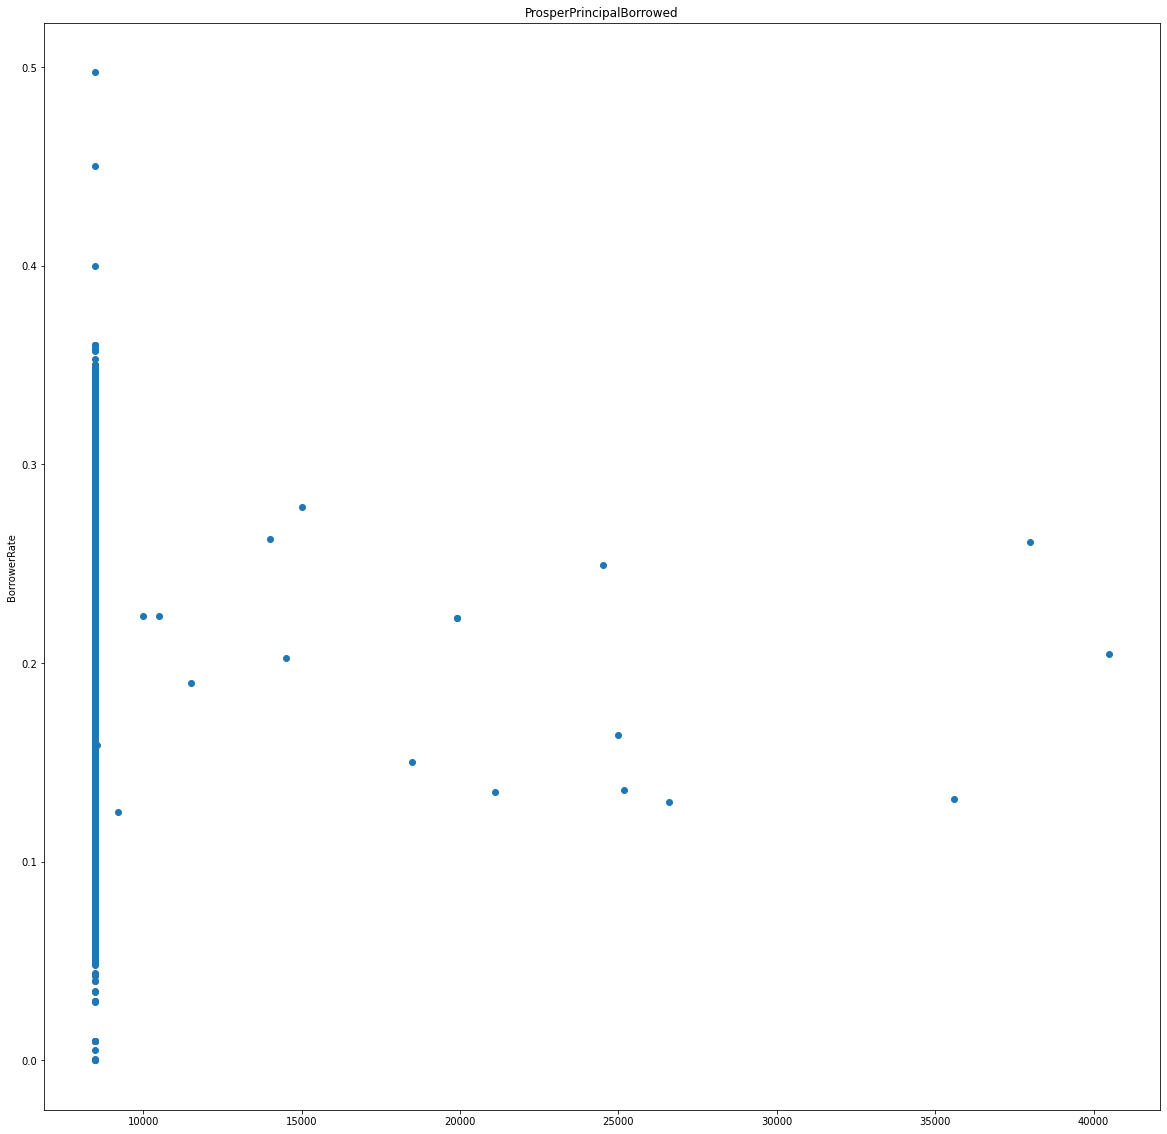

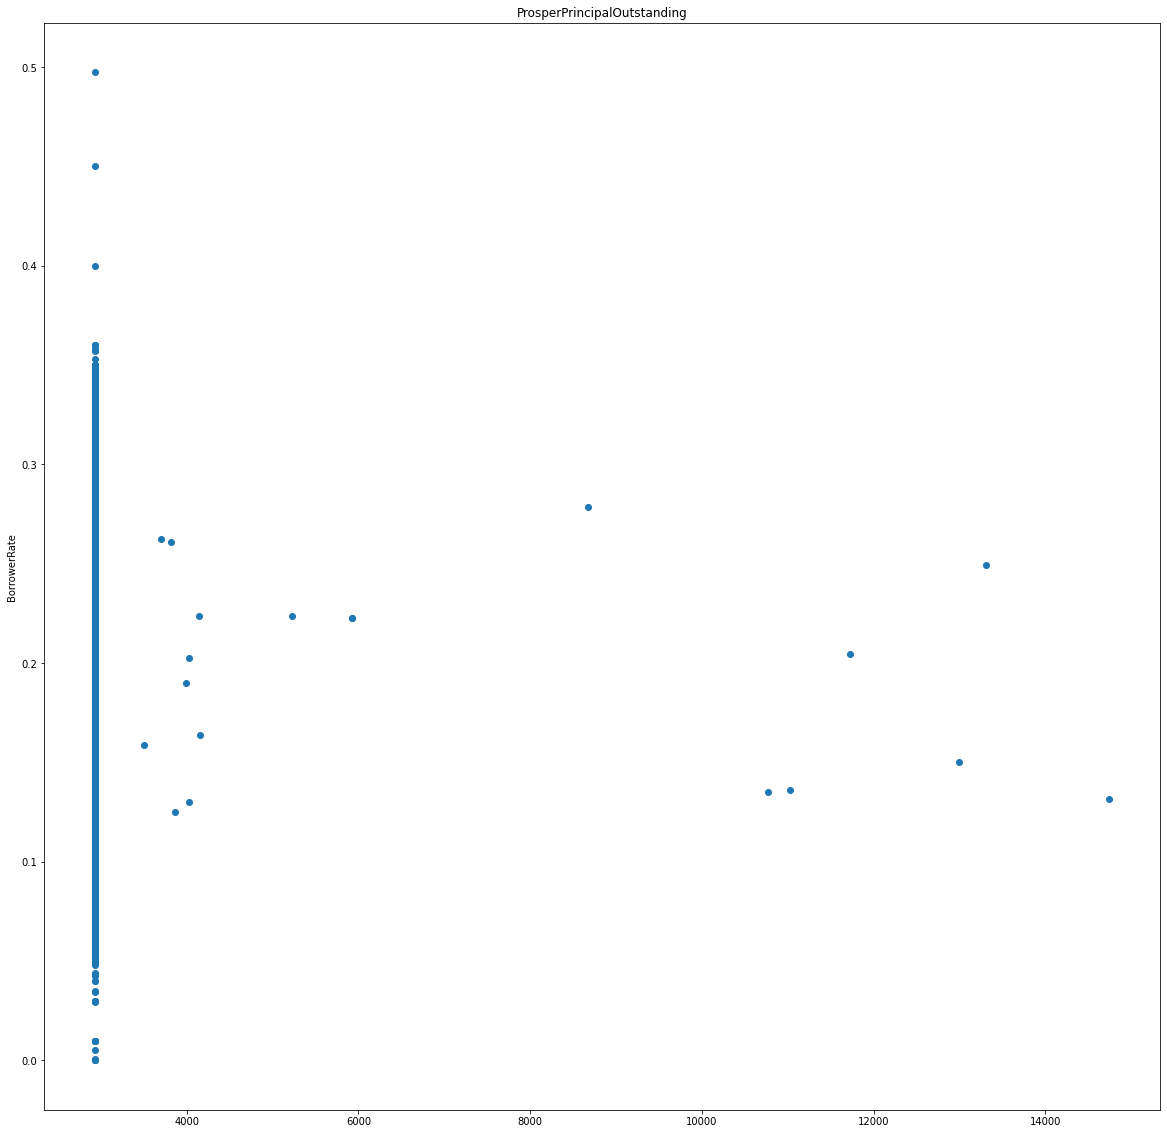

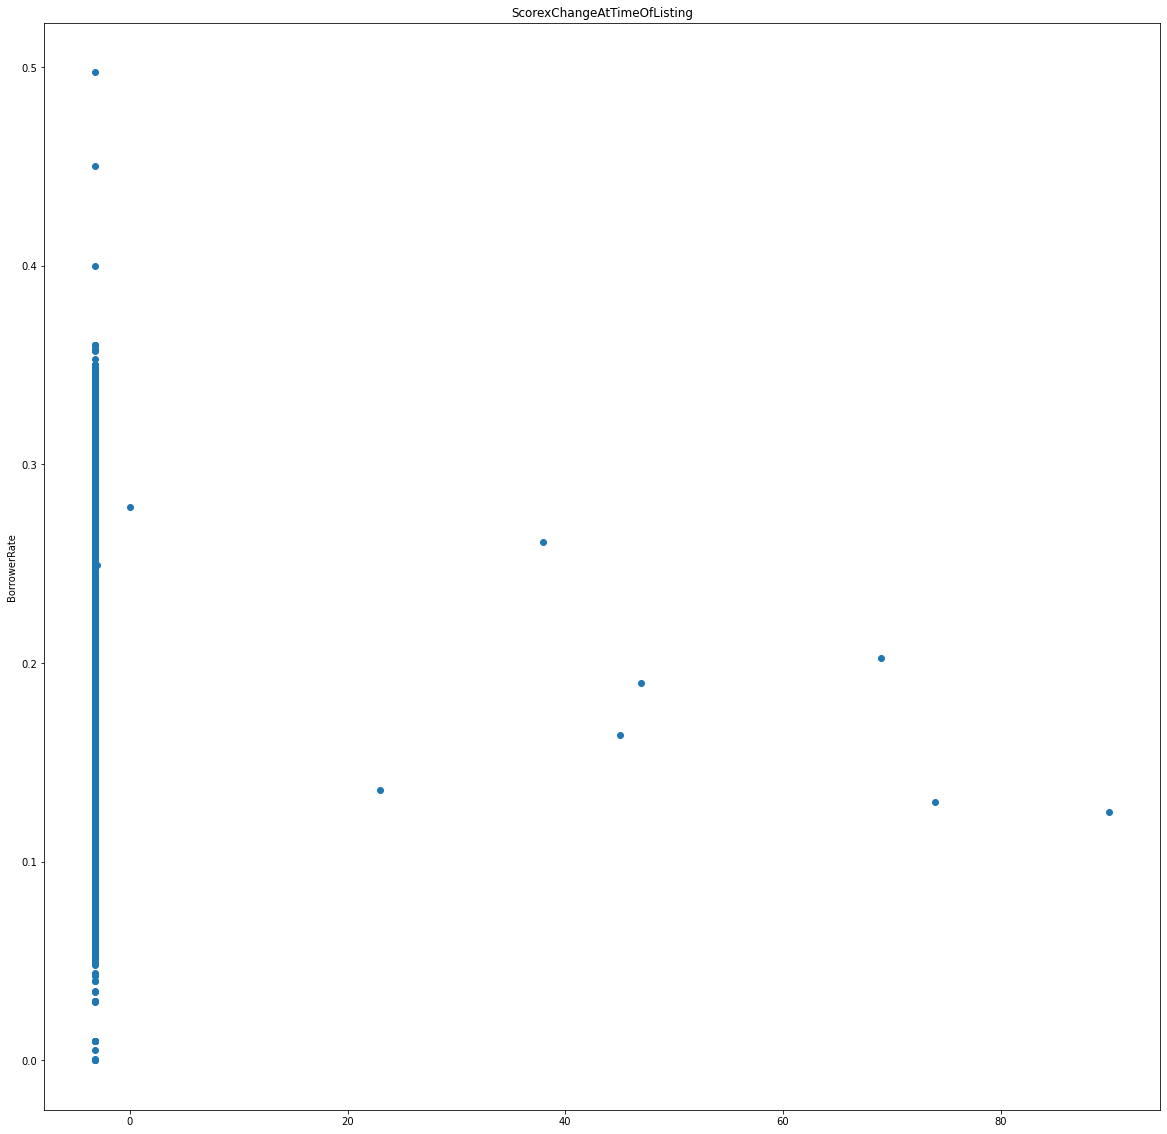

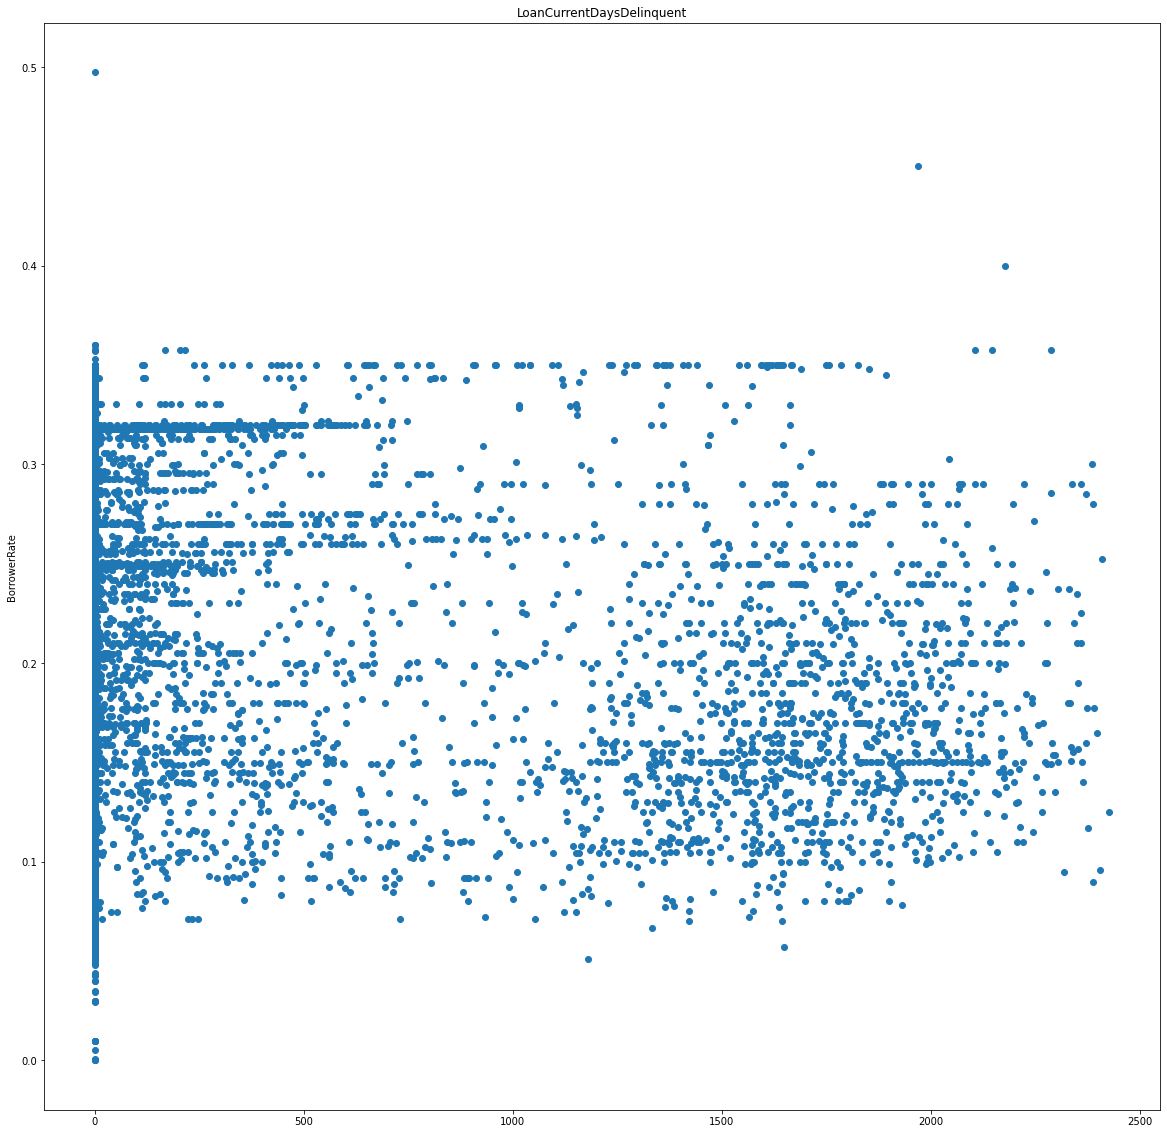

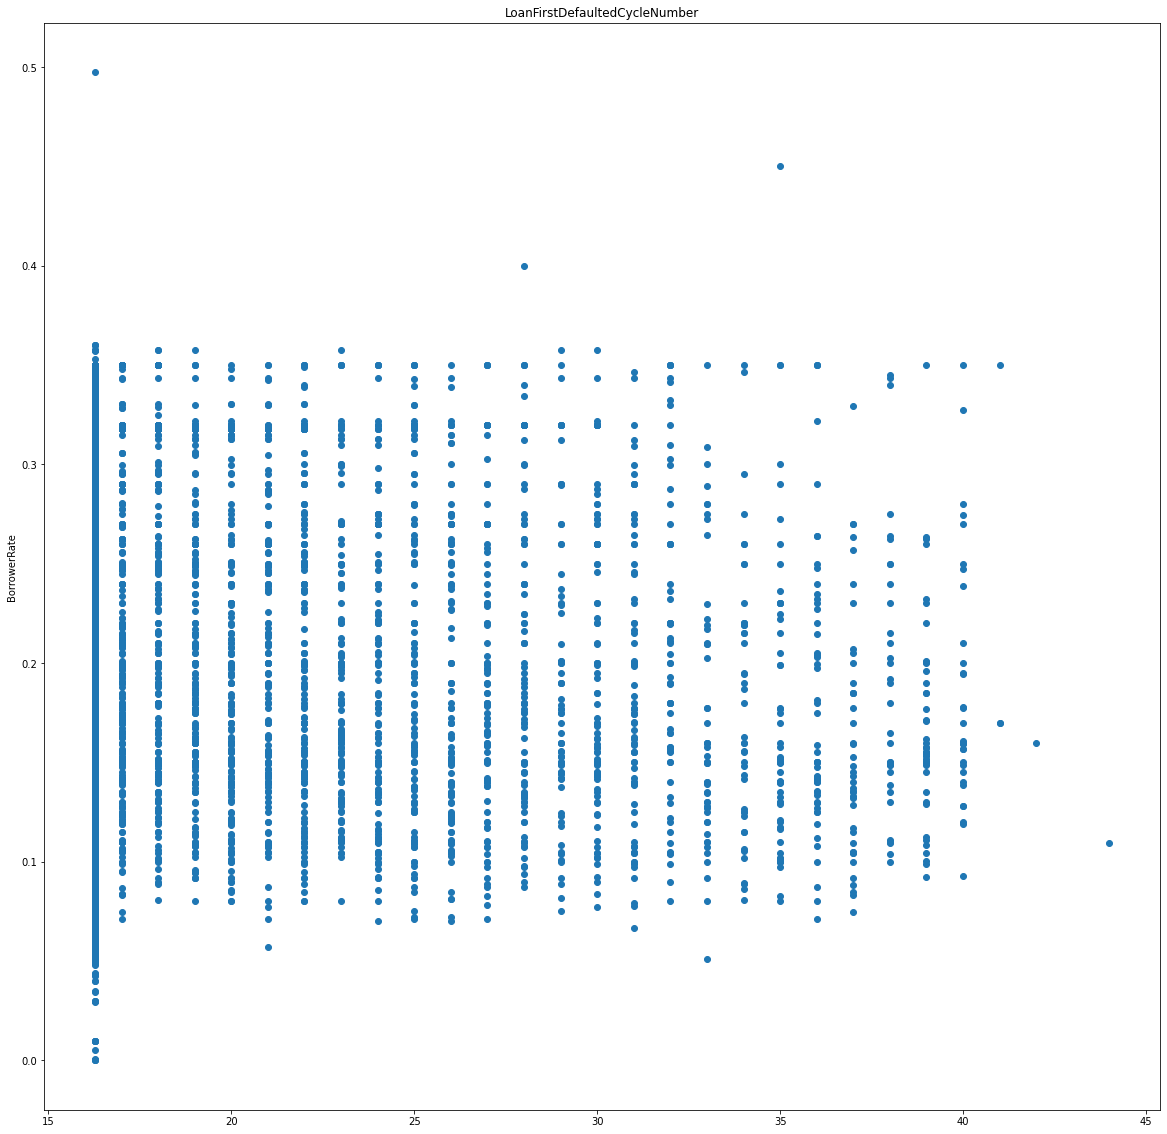

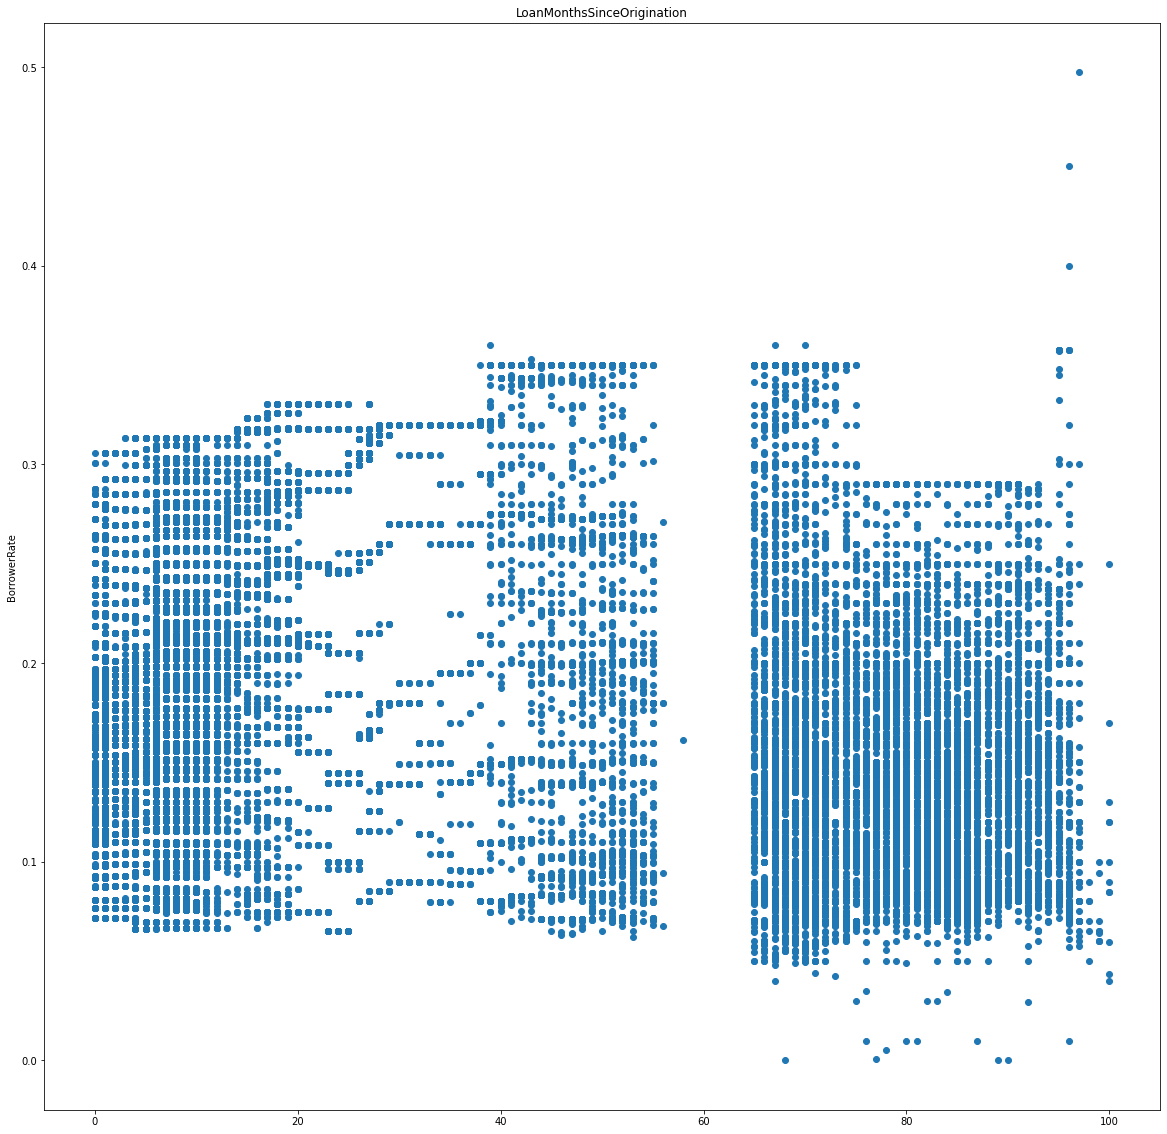

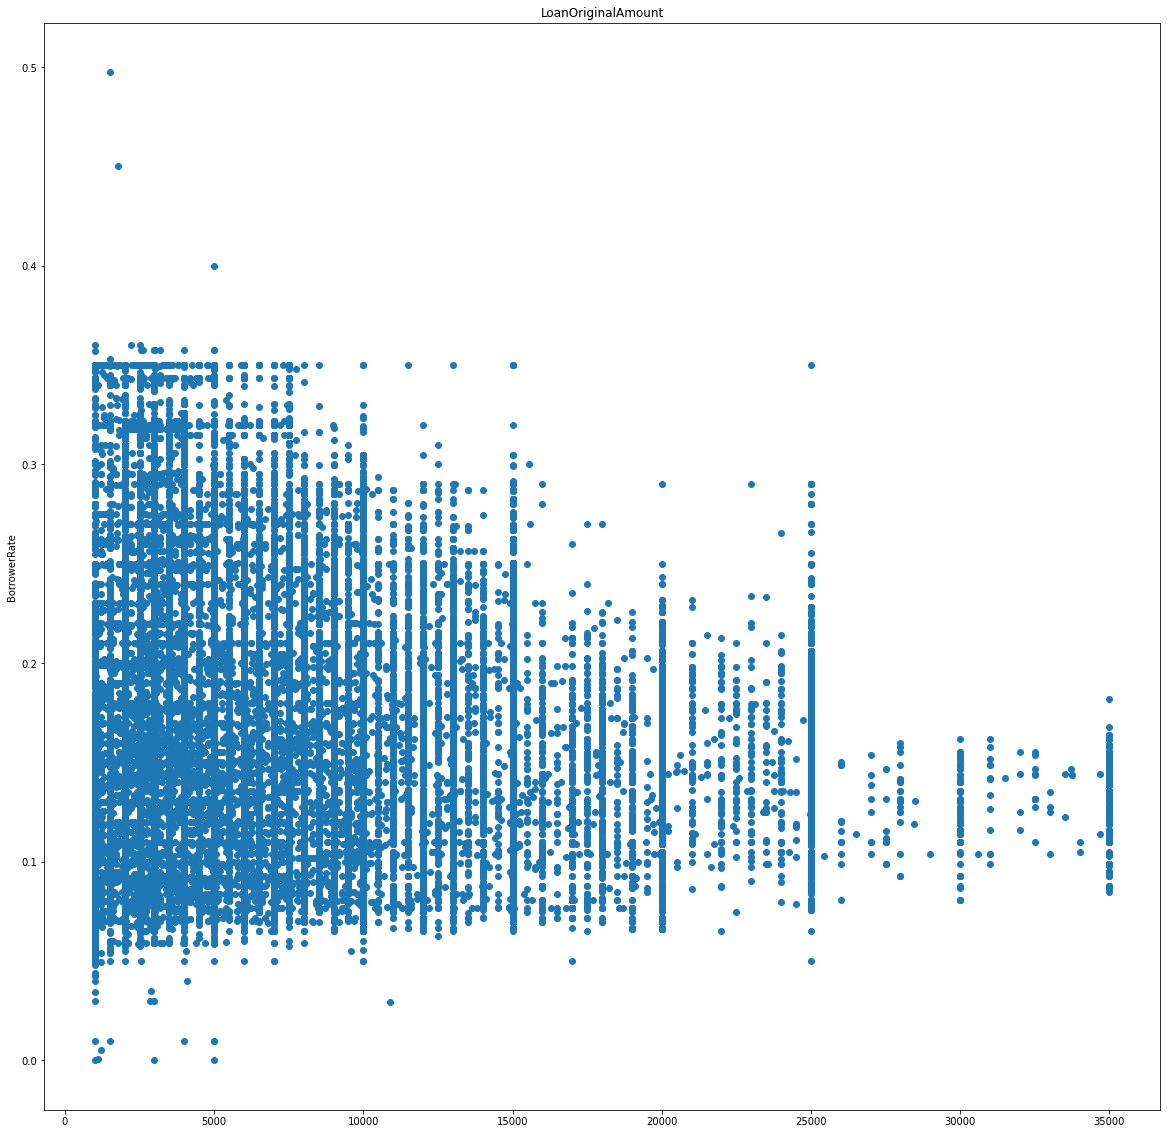

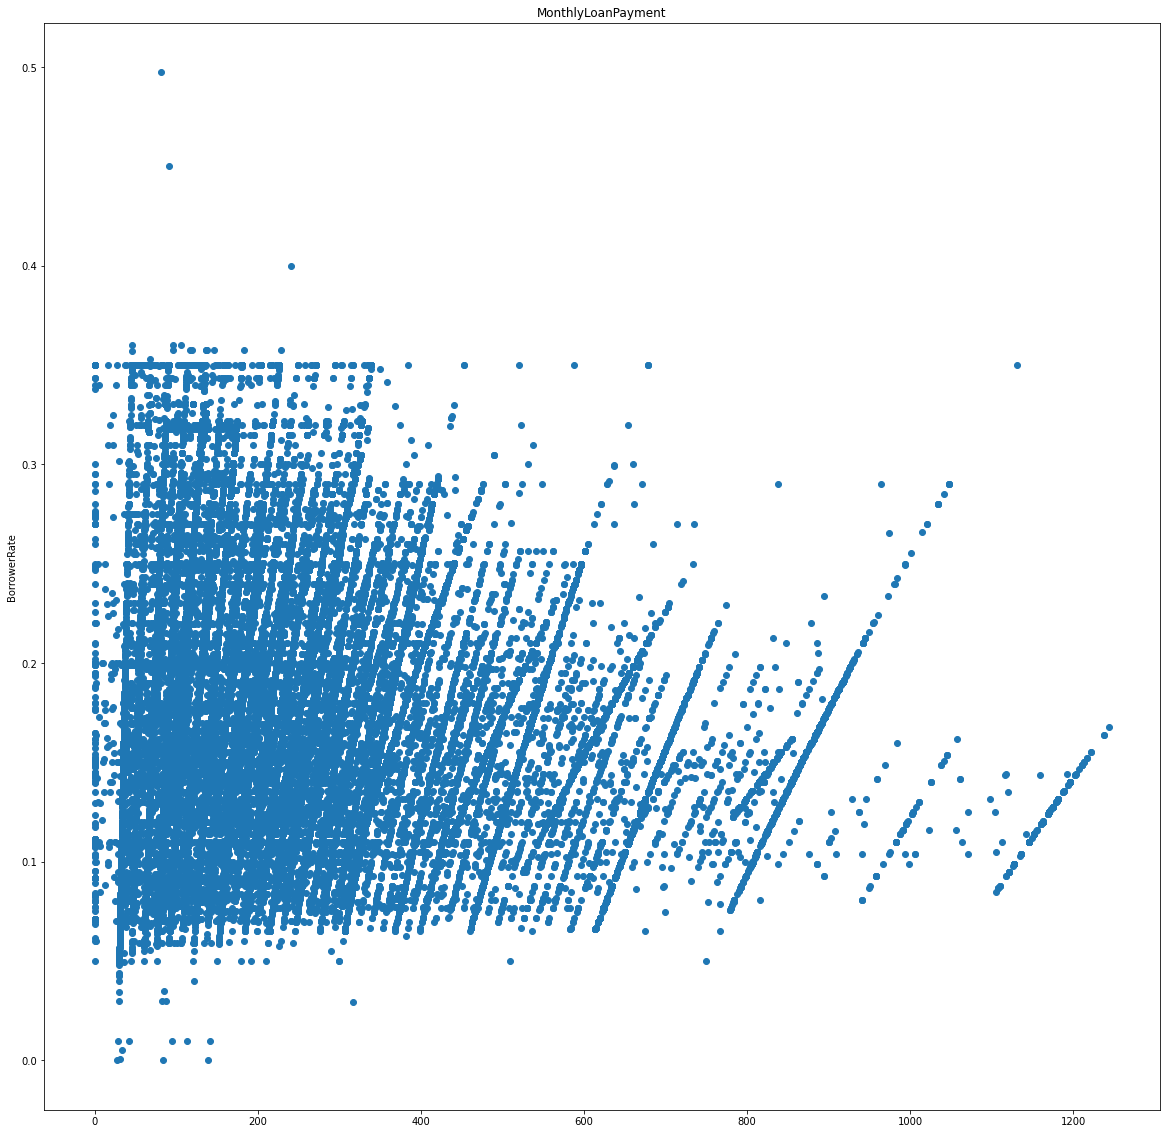

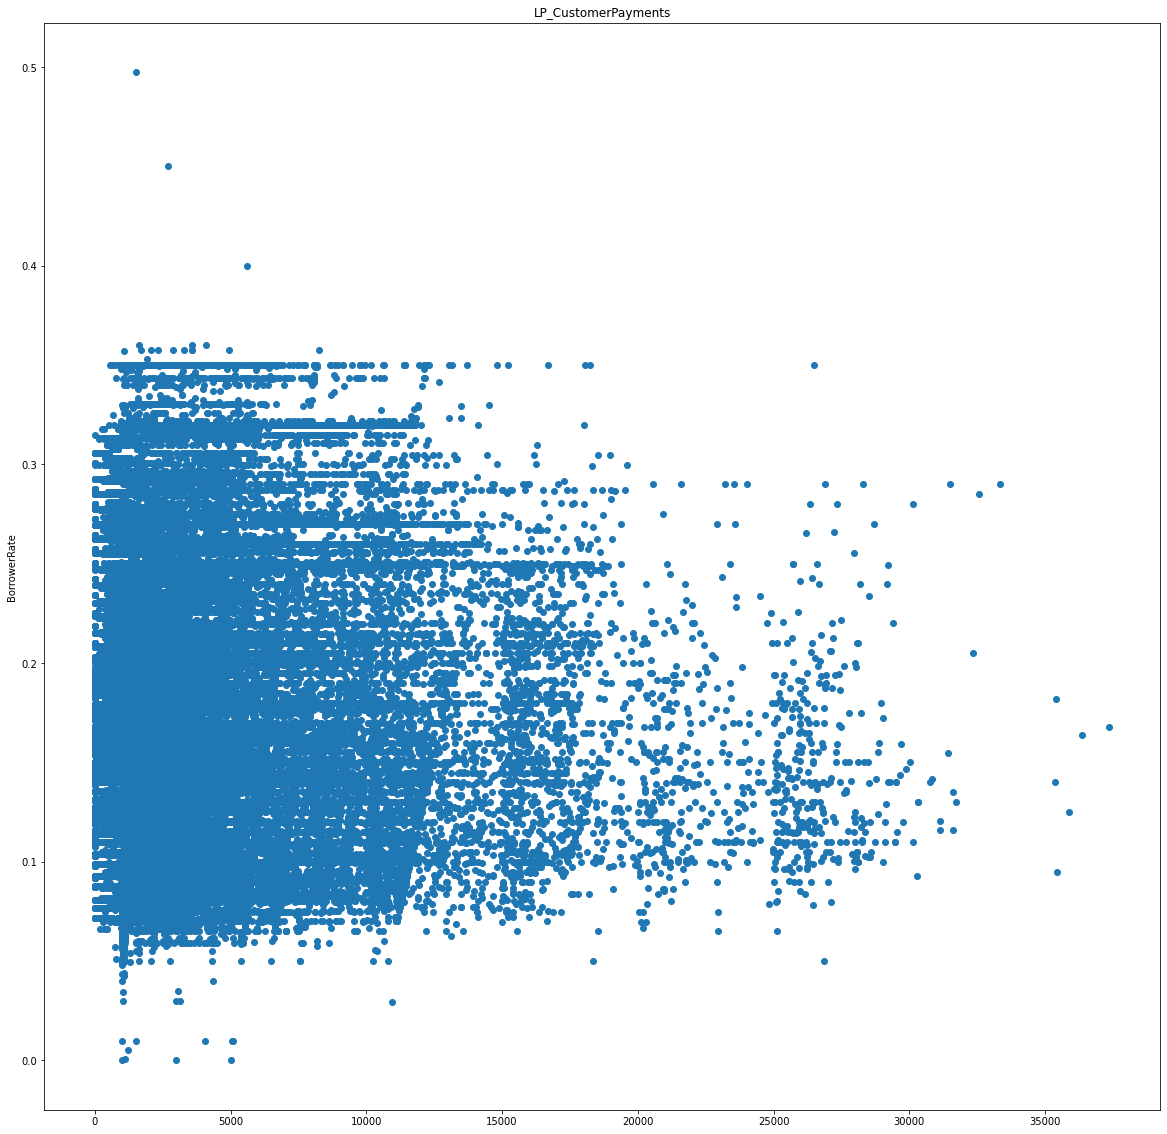

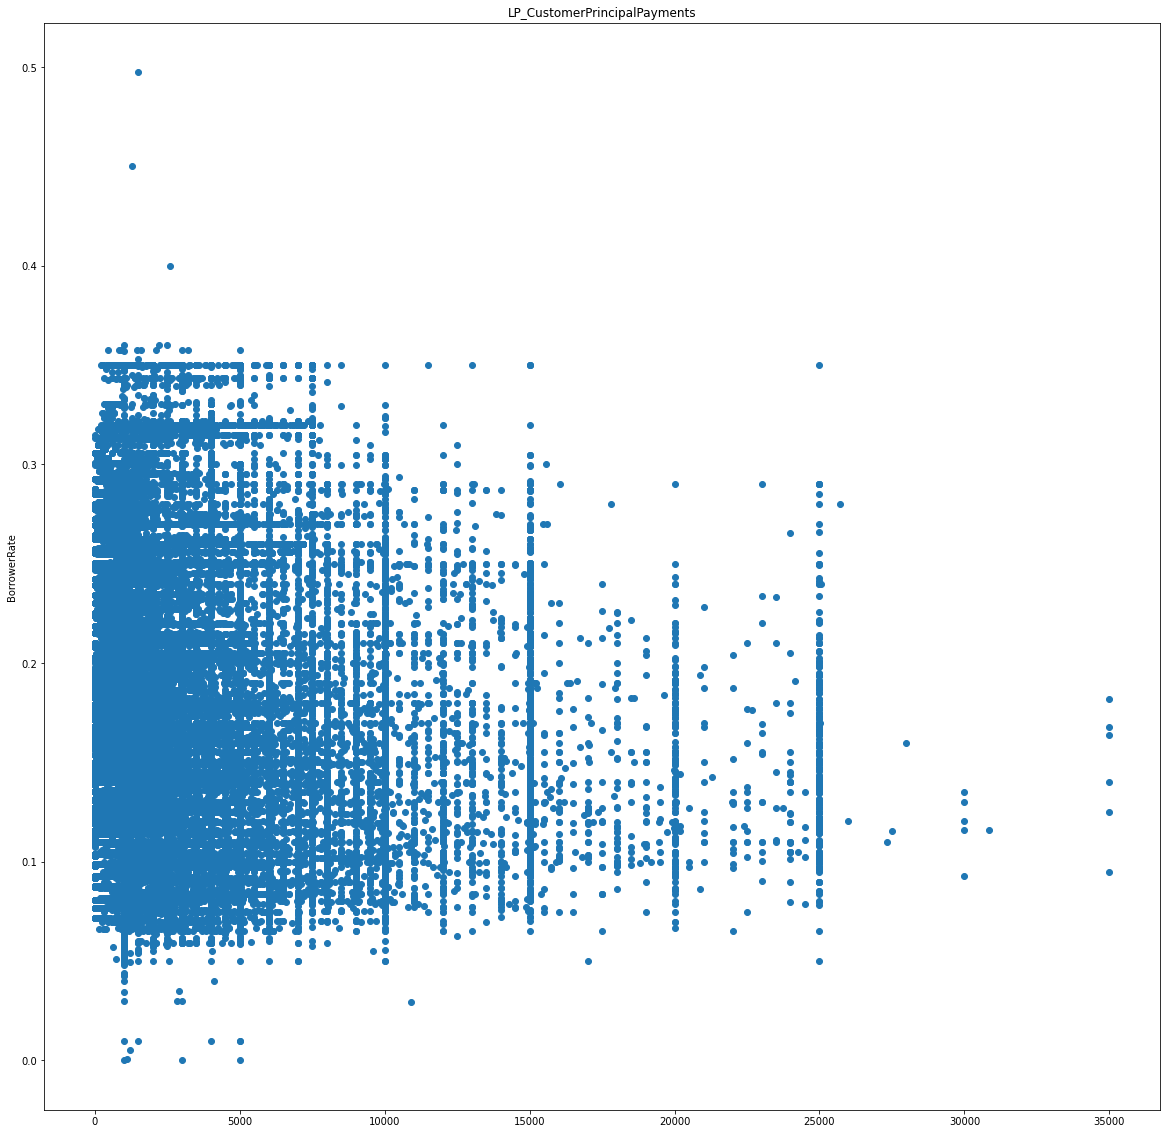

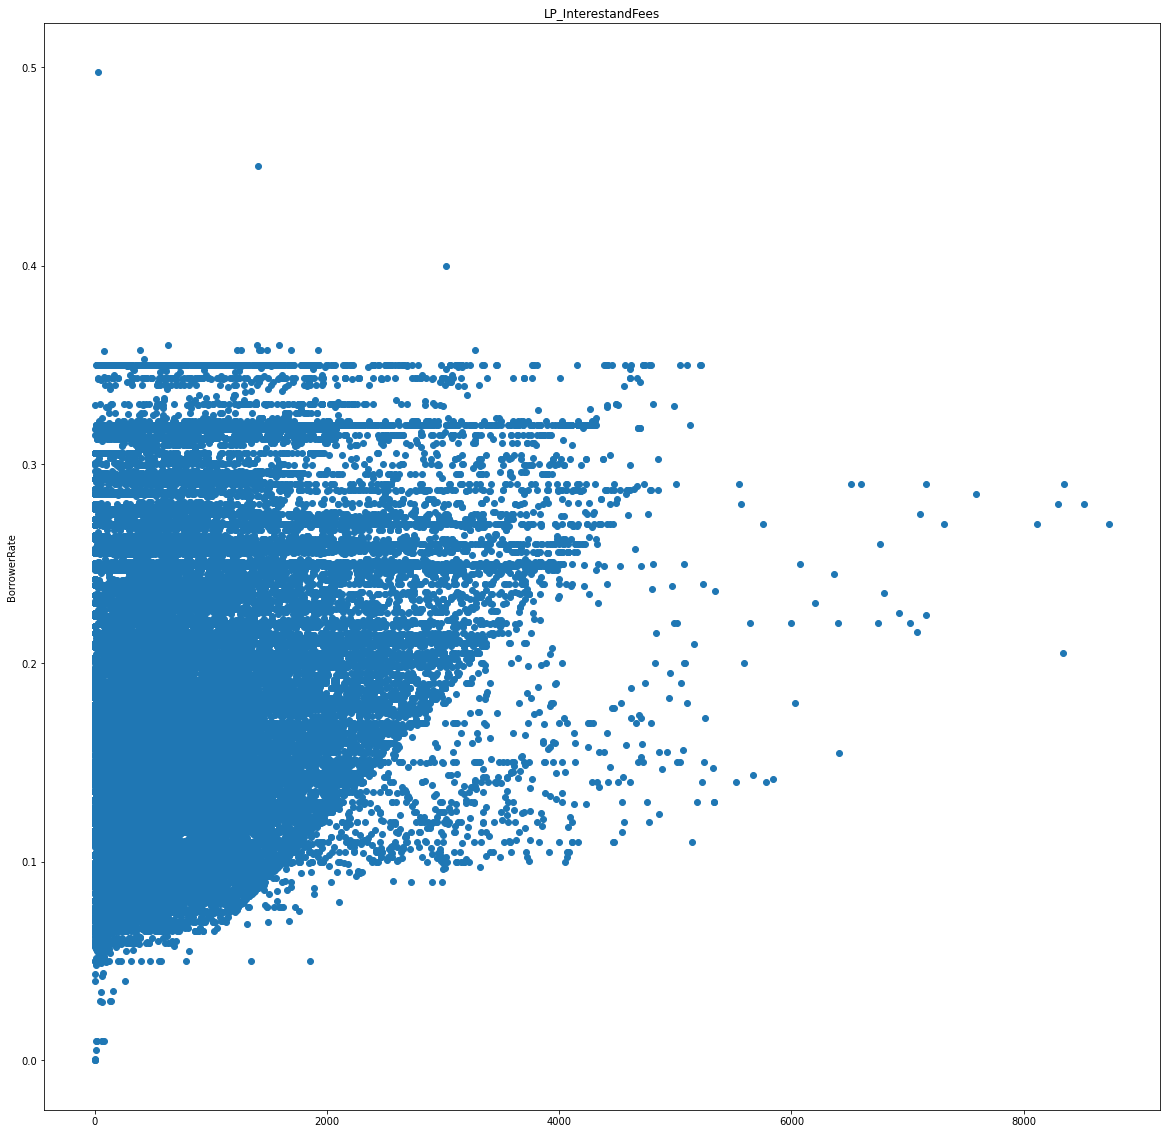

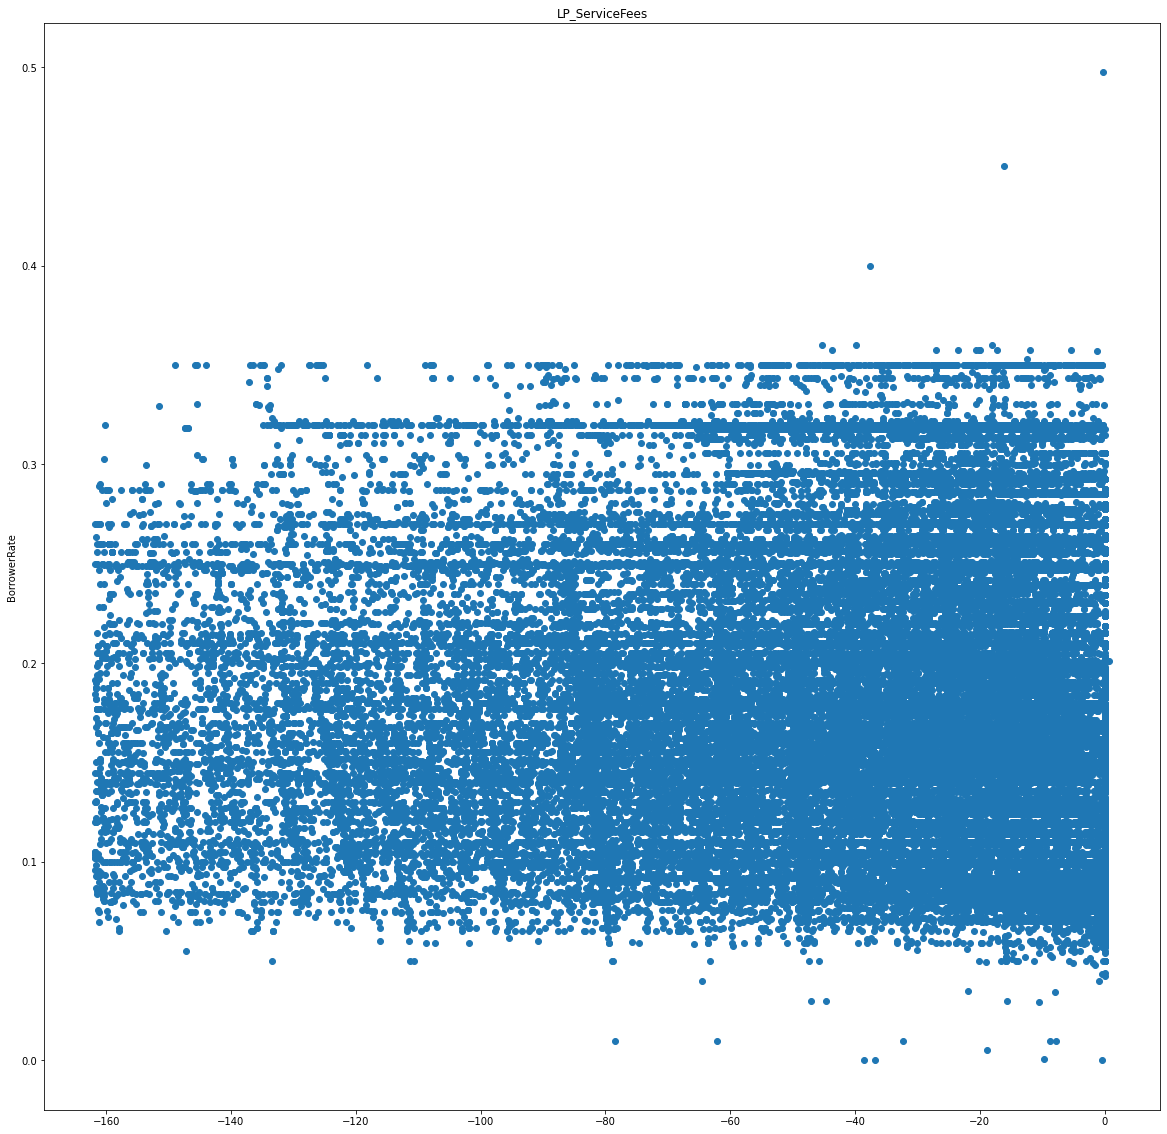

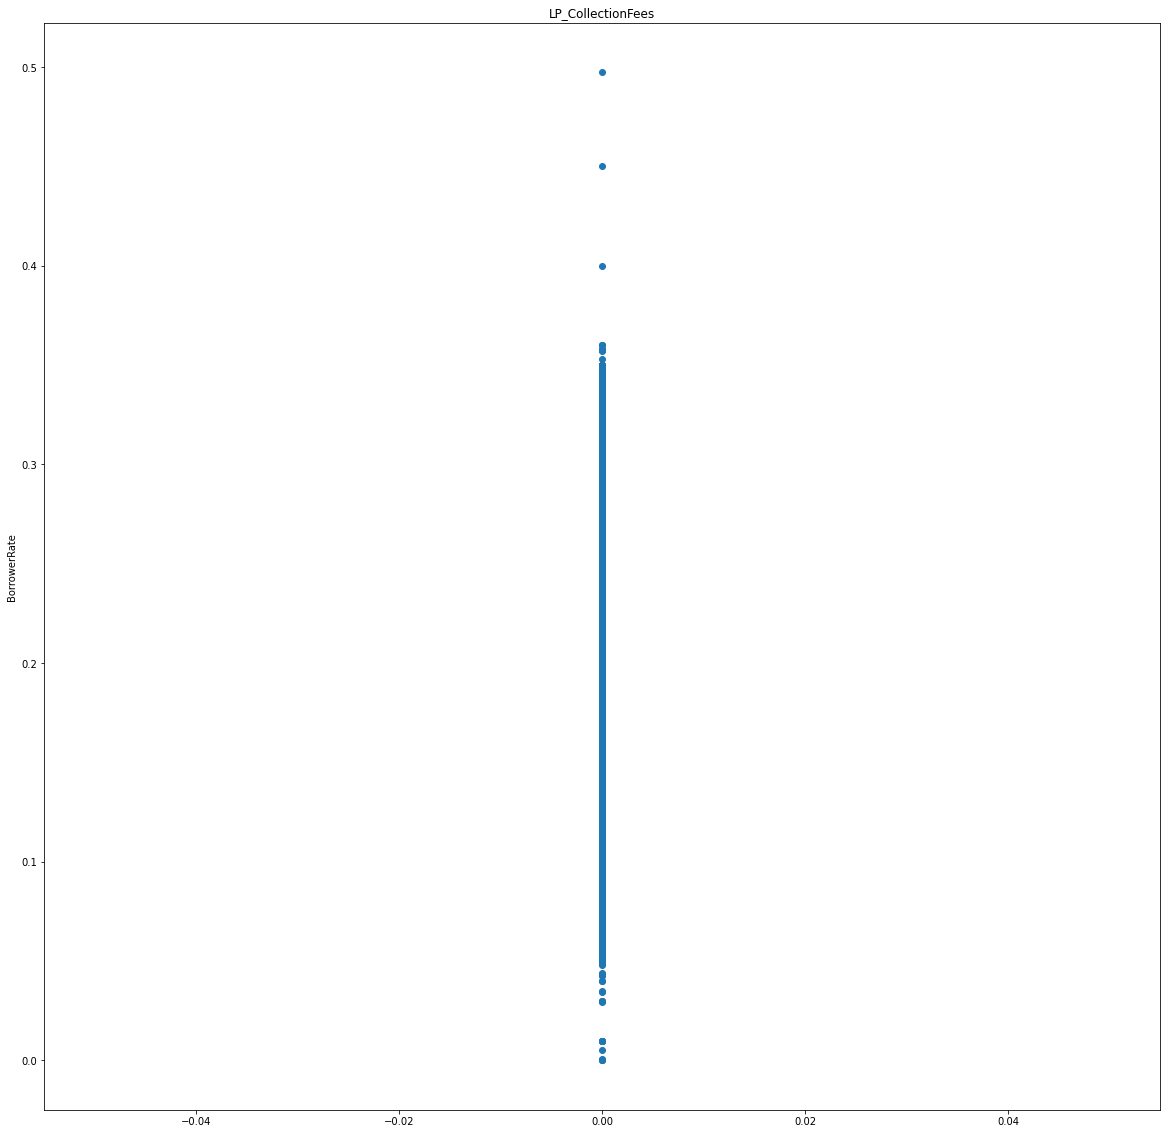

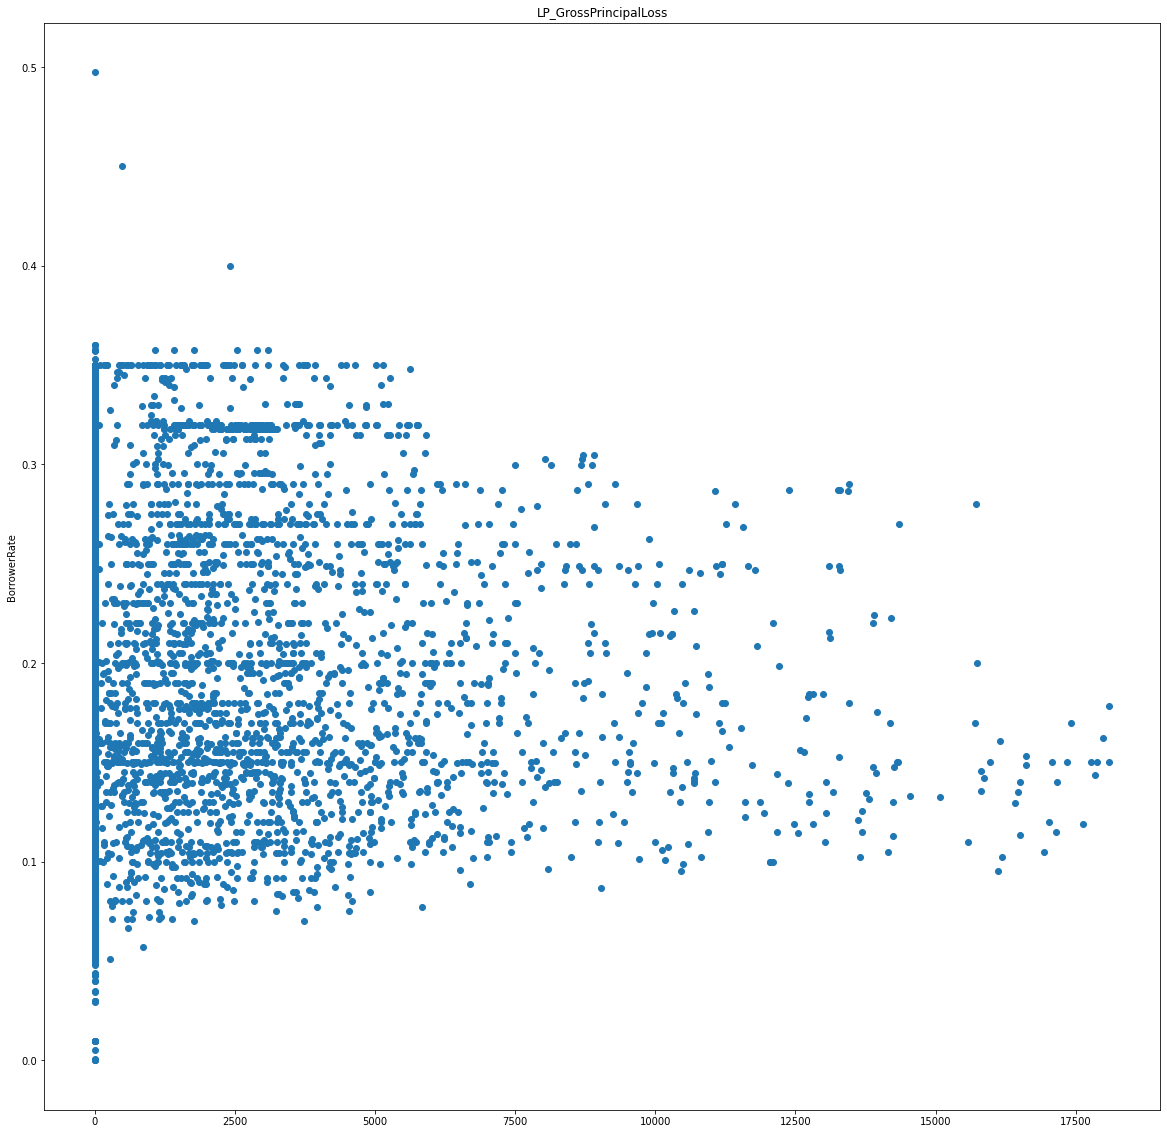

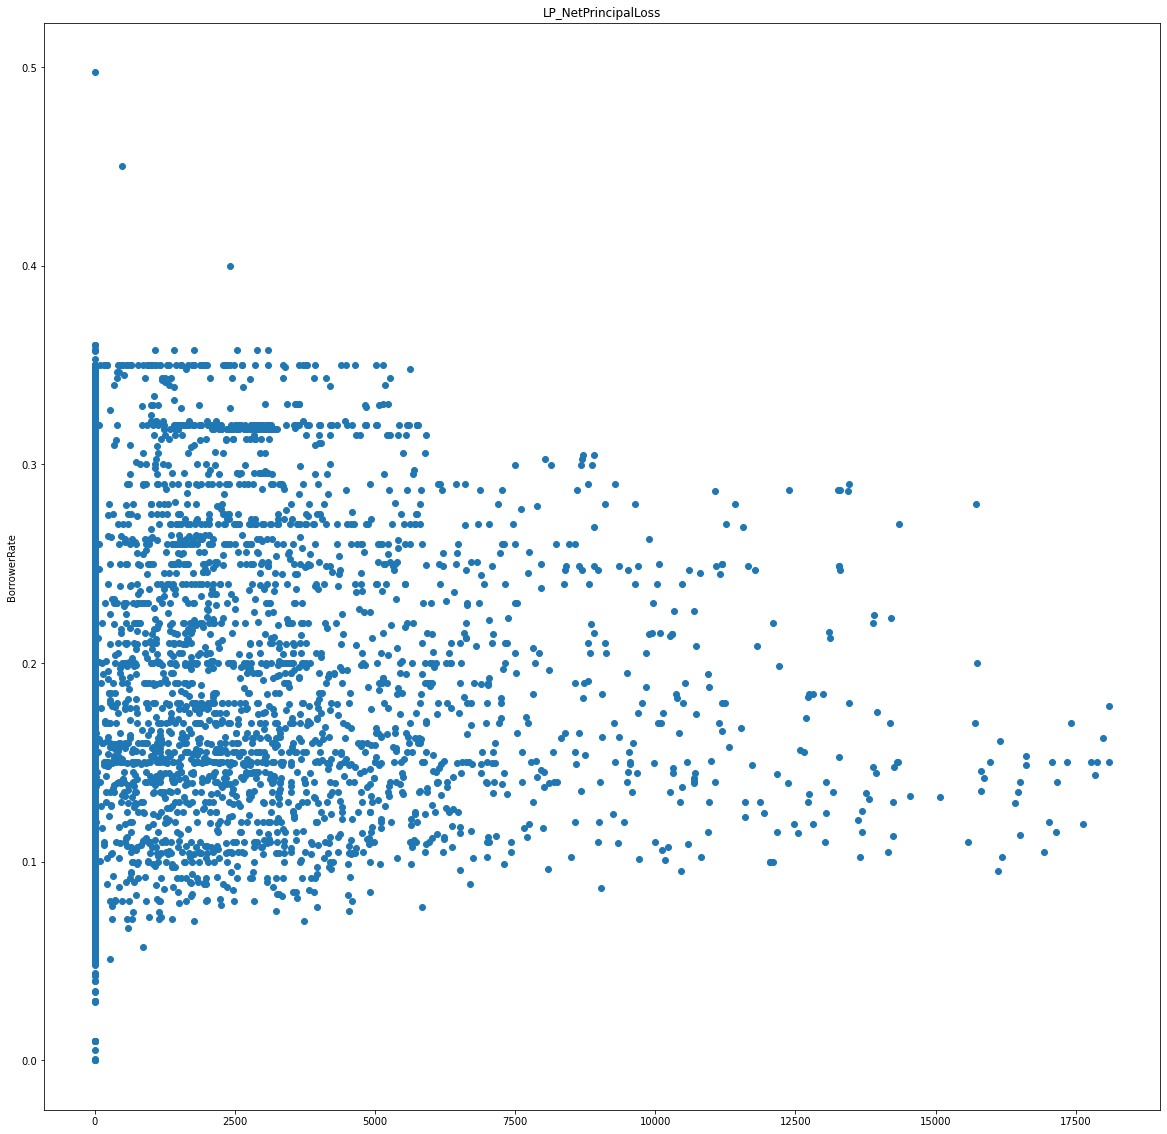

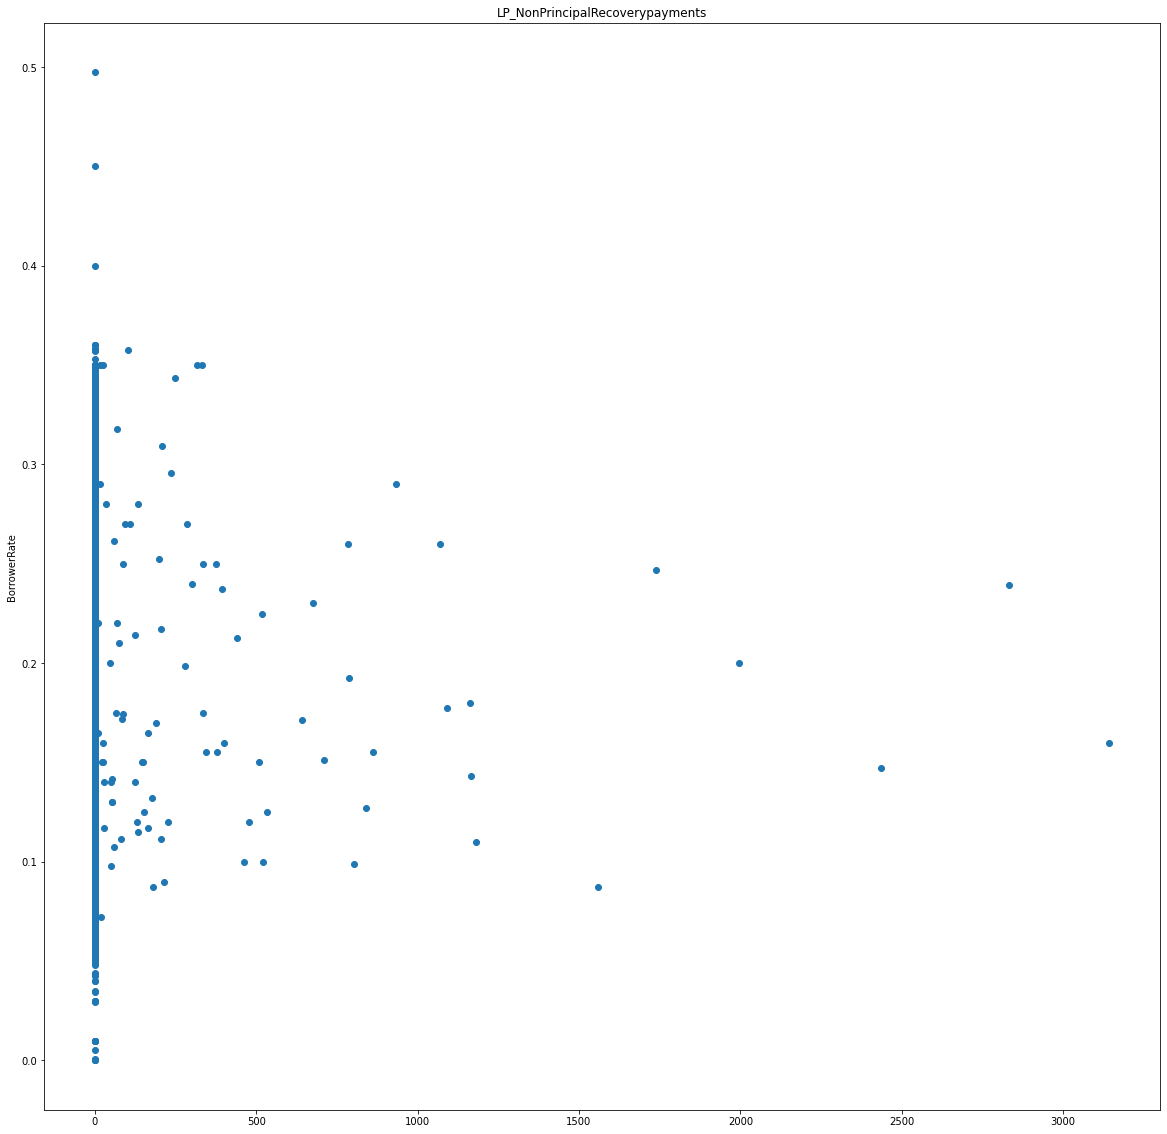

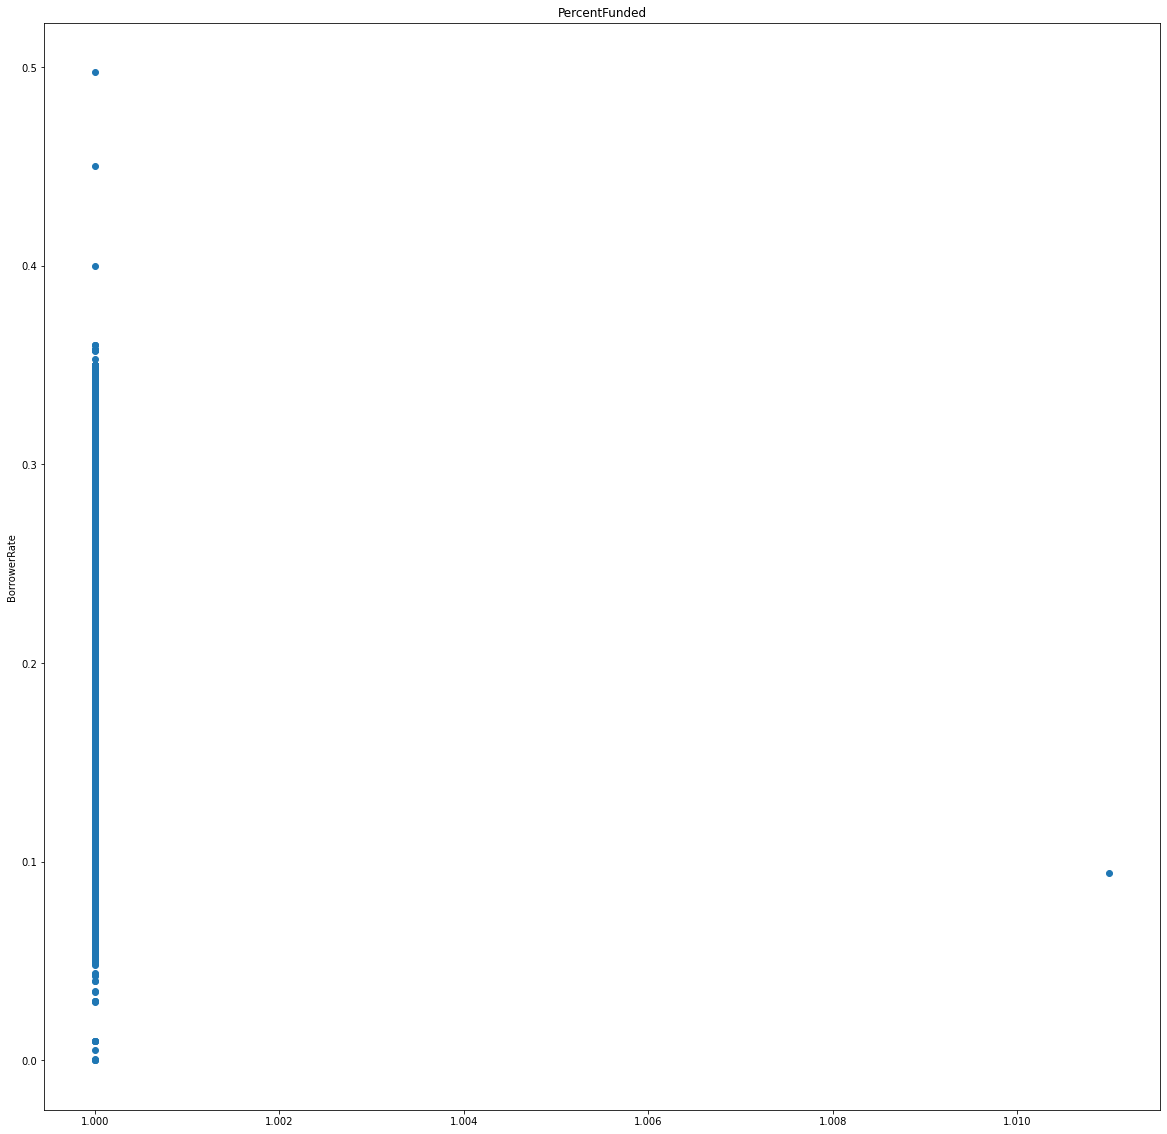

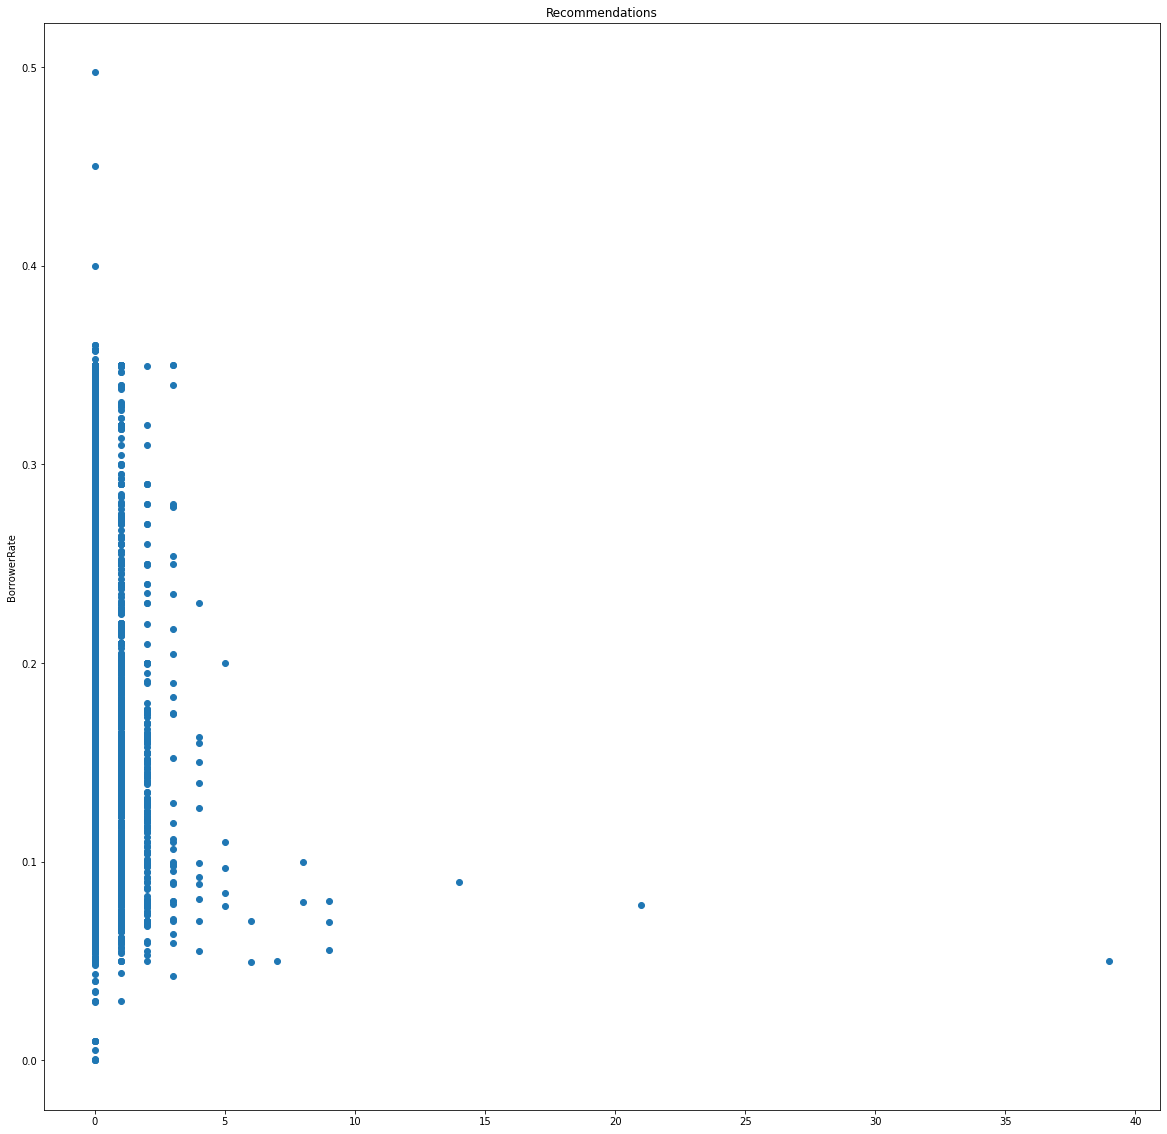

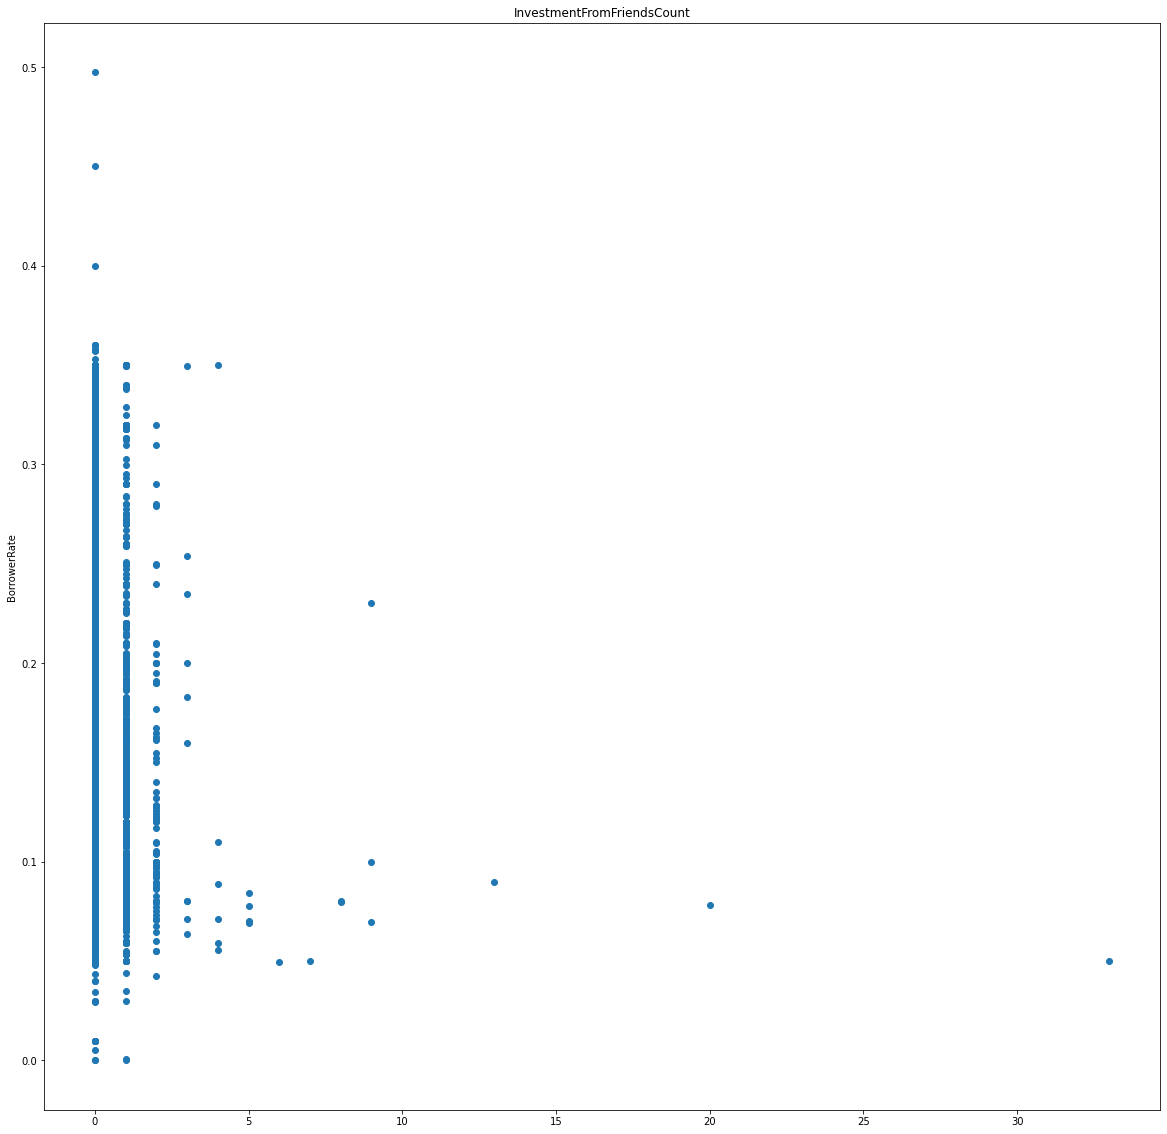

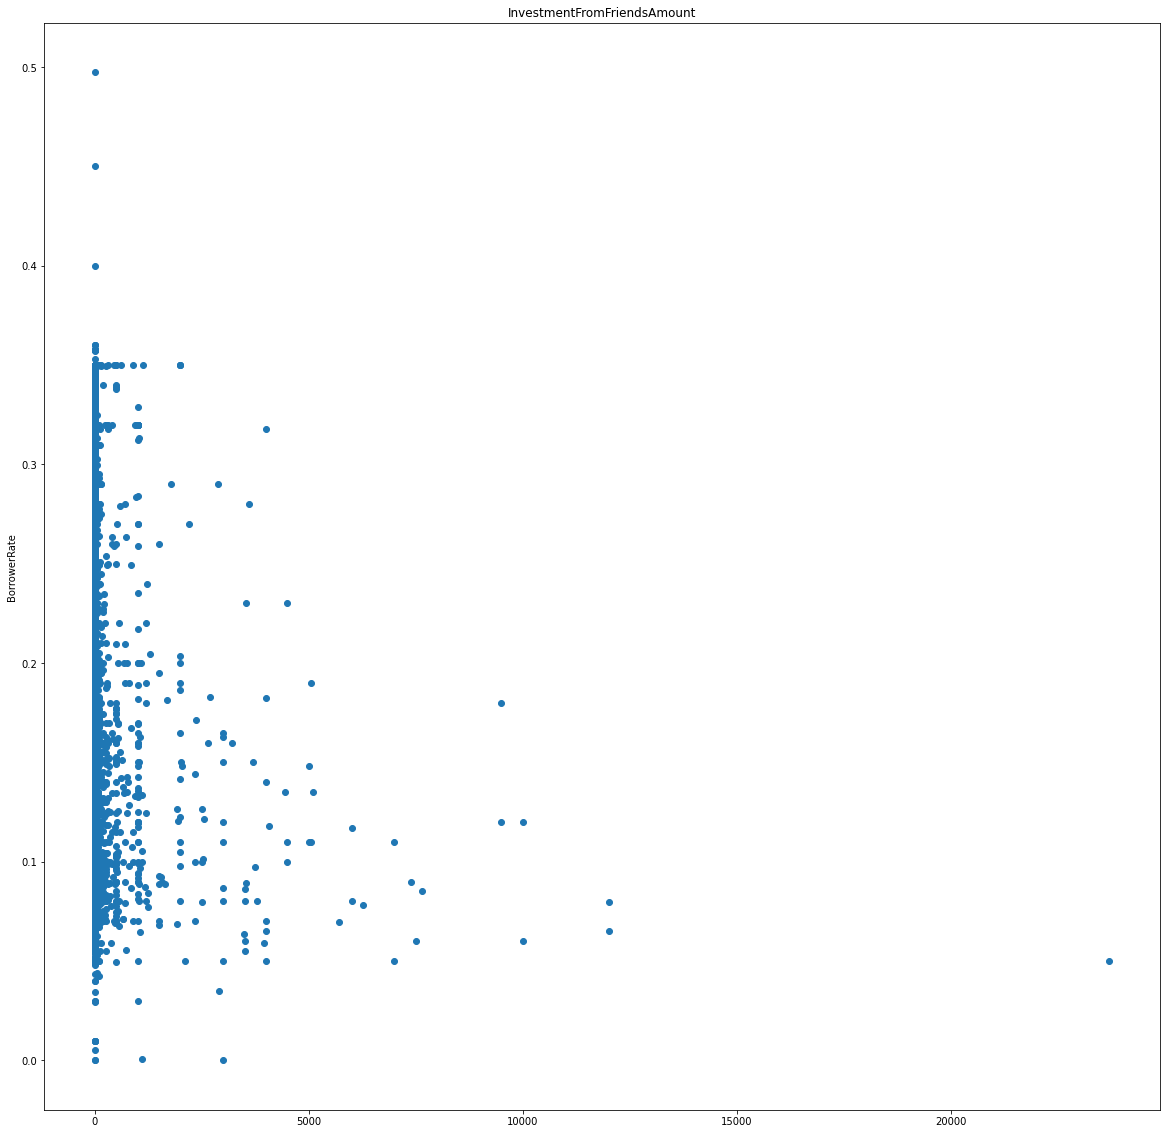

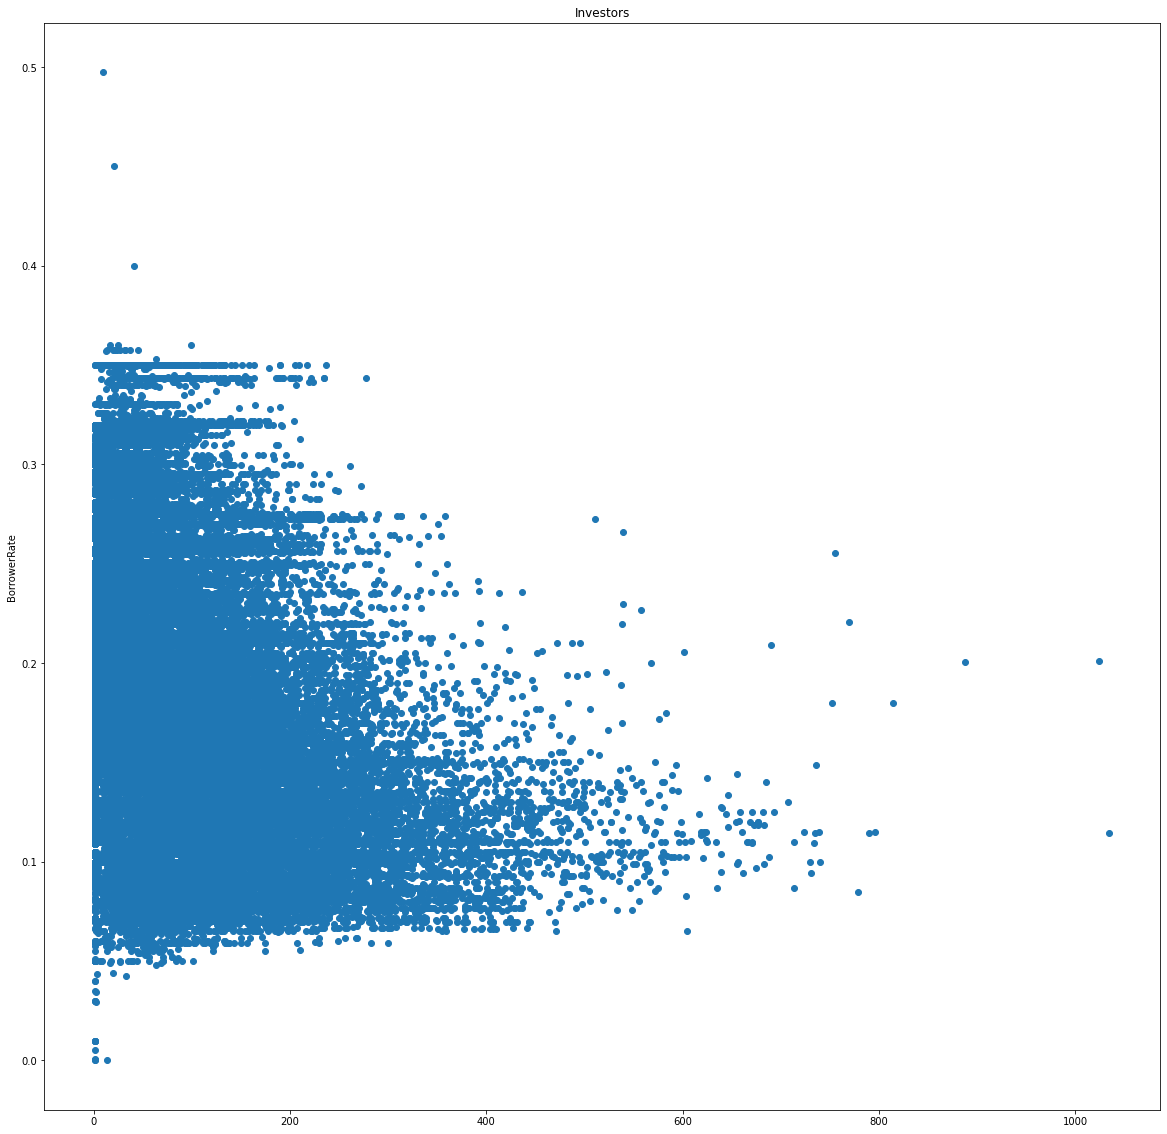

In [68]:
num = df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df[num]
for numeric in BM_num:
    plt.figure(figsize=(20,20))
    plt.scatter(BM_num[numeric], BM_num['BorrowerRate'])
    plt.title(numeric)
    plt.ylabel('BorrowerRate')
    plt.show()

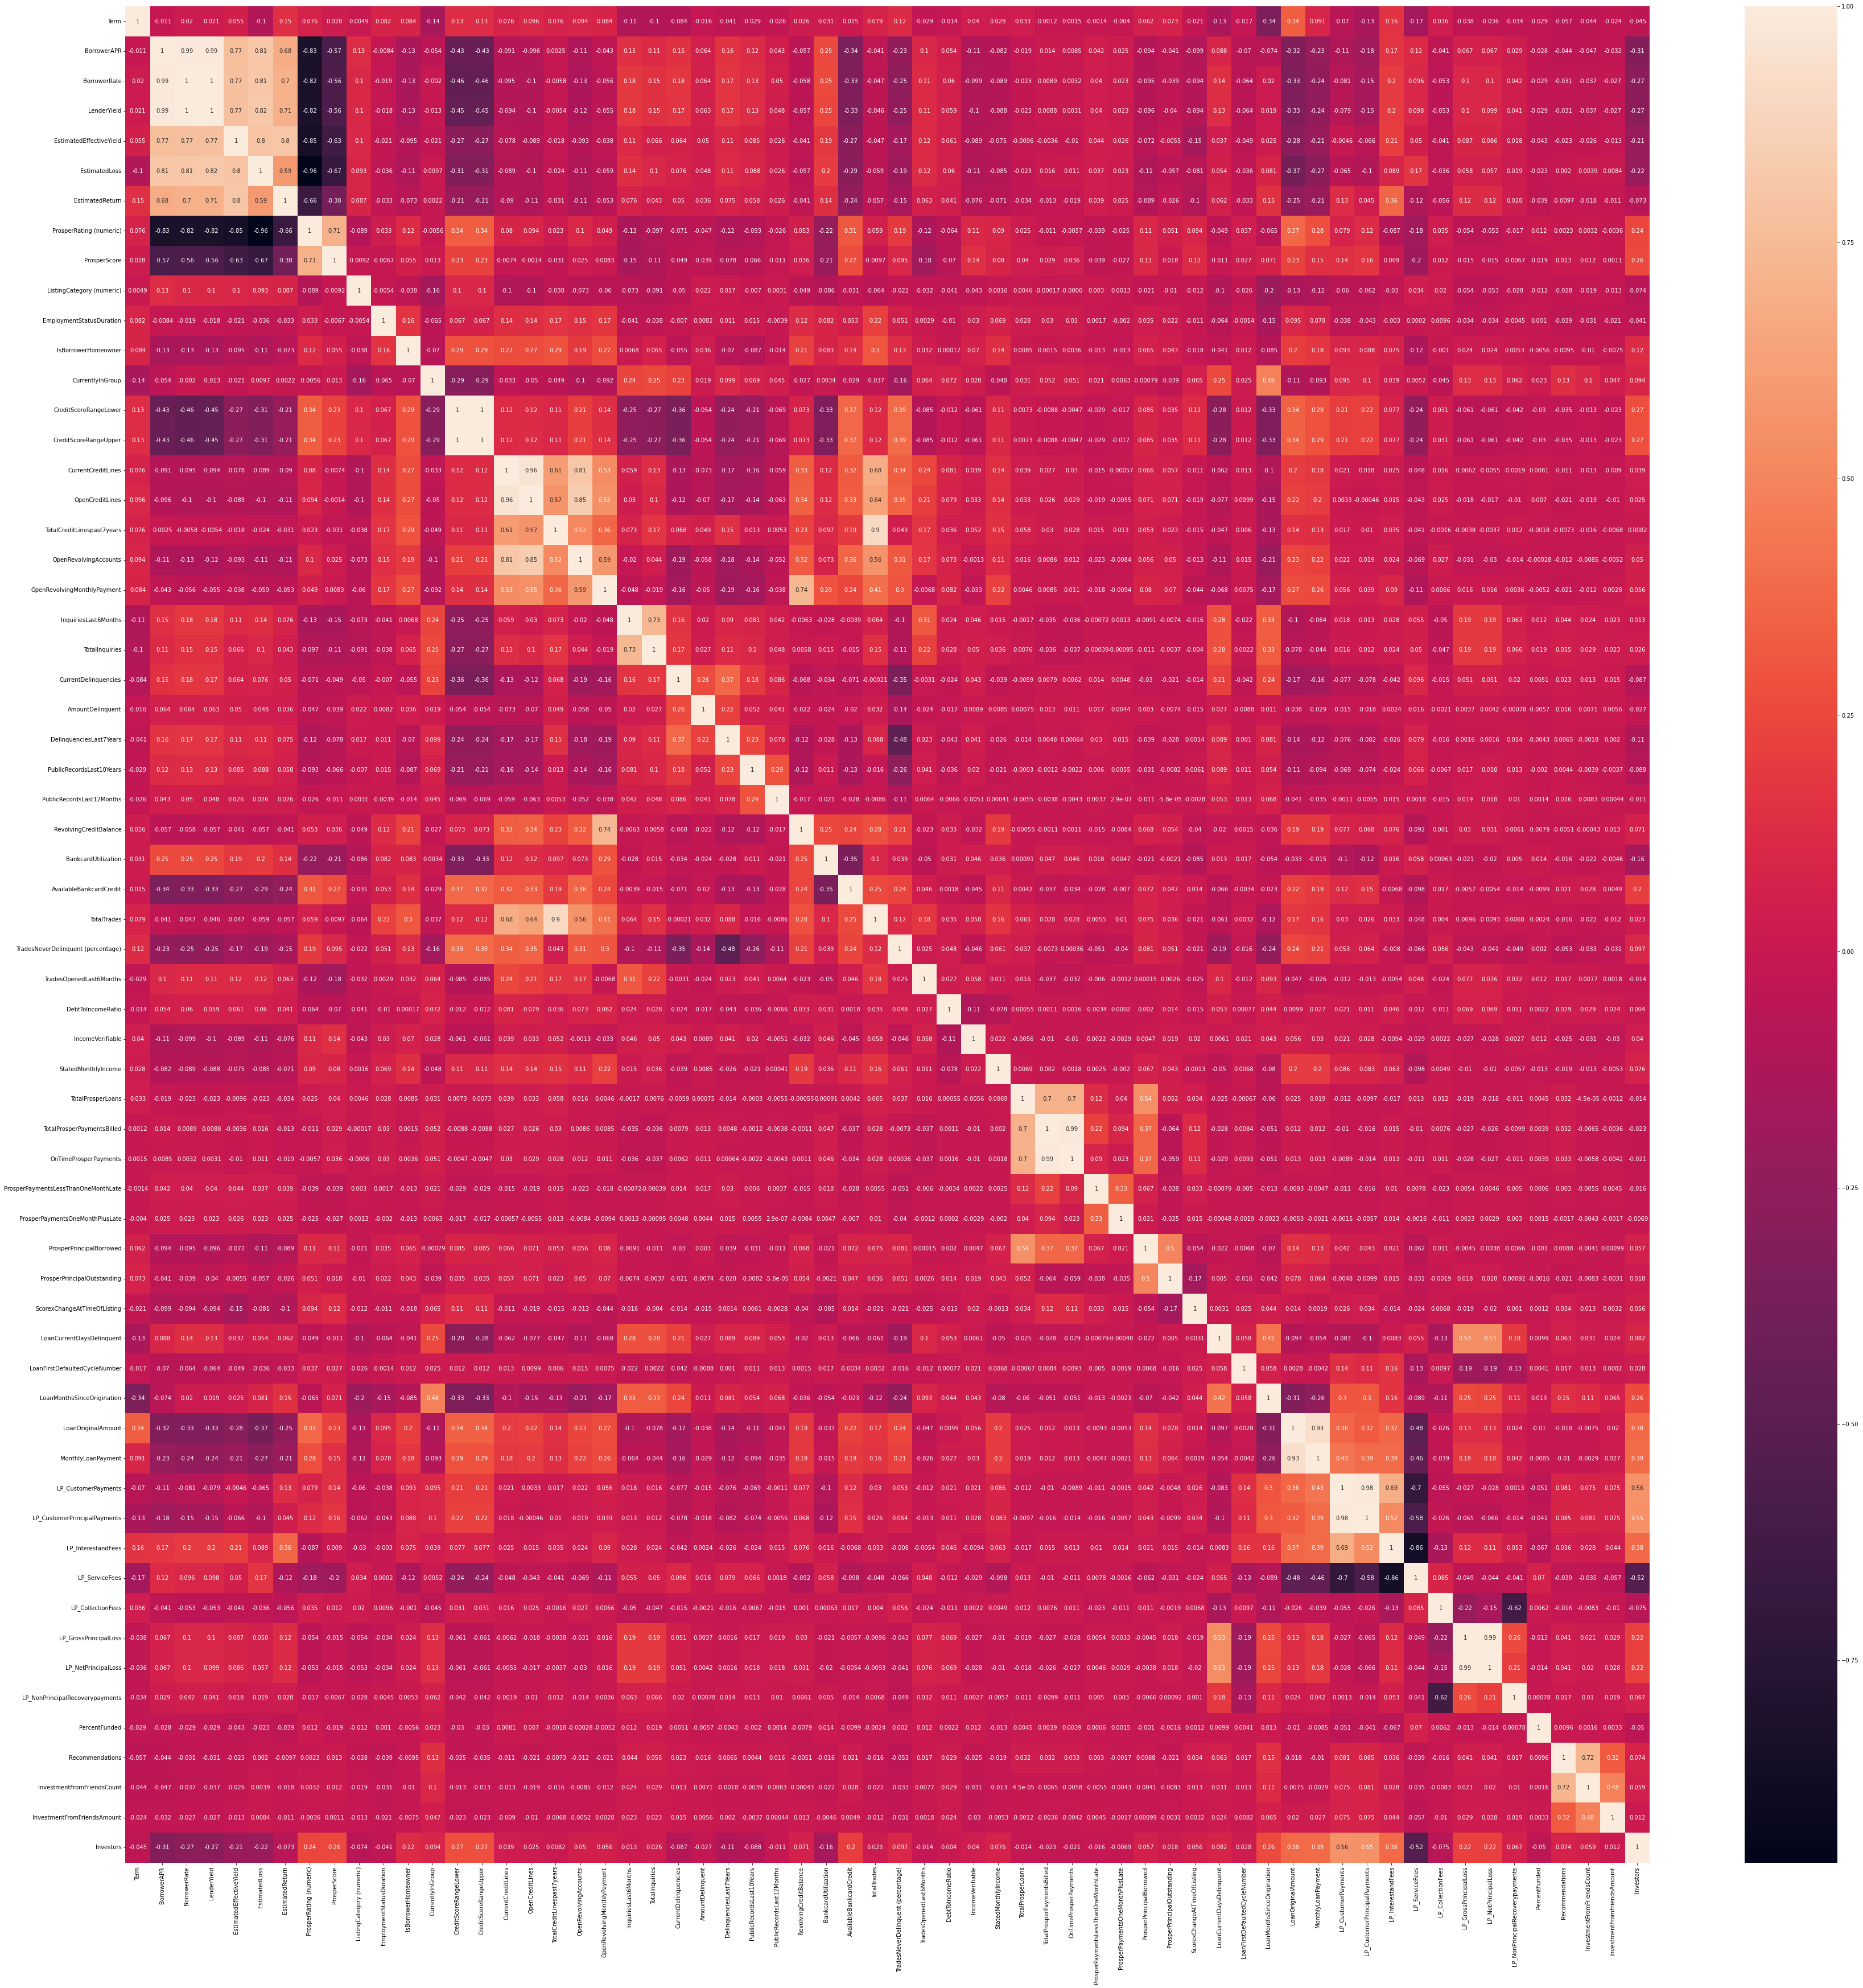

In [58]:
plt.figure(figsize=(60,60)) 
sns.heatmap(df.corr(),annot = True)
plt.show()

# Answering some research questions:

**What is the Credit grade with the highest number of borrowers?**

Text(0.5, 0, 'CreditGrade')

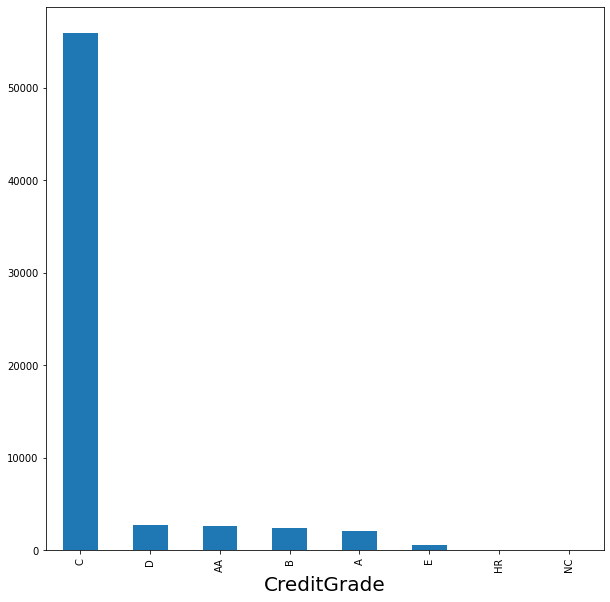

In [69]:
plt.figure(figsize=(10,10))
df['CreditGrade'].value_counts().plot.bar()
plt.xlabel('CreditGrade', fontsize=20)  

**What is the highest number of Borrower rate?**

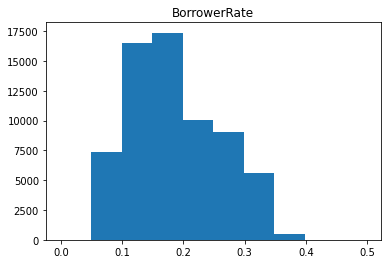

In [71]:
plt.hist(df['BorrowerRate'])
plt.title("BorrowerRate")
plt.show()

**Does the highest number of Lender Yield is also between 0.1 and 0.2?**

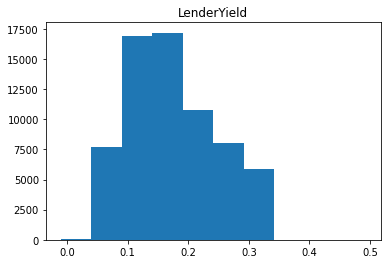

In [73]:
plt.hist(df['LenderYield'])
plt.title("LenderYield")
plt.show()

**Does higher Credit Grade leads to higher Monthly loan payment?**

<Axes: xlabel='CreditGrade', ylabel='MonthlyLoanPayment'>

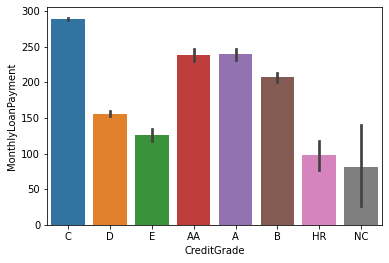

In [75]:
sns.barplot(x='CreditGrade', y='MonthlyLoanPayment', data=df)

# Label Encoding:

In [78]:
le = LabelEncoder()
cols = [ 'ProsperRating (Alpha)' ,'EmploymentStatus' , 
       'BorrowerState','Occupation' ,  'LoanOriginationQuarter' , 'LoanStatus' , 'IncomeRange']
for i in cols:
    df[i] = le.fit_transform(df[i] )

In [79]:
import warnings# warning filter
warnings.filterwarnings("ignore")

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66493 entries, 0 to 113936
Data columns (total 74 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingCreationDate                  66493 non-null  datetime64[ns]
 1   CreditGrade                          66493 non-null  object        
 2   Term                                 66493 non-null  float64       
 3   LoanStatus                           66493 non-null  int64         
 4   ClosedDate                           66493 non-null  object        
 5   BorrowerAPR                          66493 non-null  float64       
 6   BorrowerRate                         66493 non-null  float64       
 7   LenderYield                          66493 non-null  float64       
 8   EstimatedEffectiveYield              66493 non-null  float64       
 9   EstimatedLoss                        66493 non-null  float64       
 10  EstimatedRetur

In [83]:
cat_cols = df.select_dtypes(include=['category','object','boolean']).columns
for col in cat_cols:
            df[col] = le.fit_transform(df[col])

# Hot Encoding:

In [80]:
lis = ['IsBorrowerHomeowner' , 'CurrentlyInGroup' ,'IncomeVerifiable' ]
for i in lis :
    df[i][df[i] == True] = 1
    df[i][df[i] == False] = 0  

In [84]:
df.head()

ListingCreationDate  CreditGrade  Term  LoanStatus  ClosedDate  \
0 2007-08-26 19:09:29.263            3  36.0           1         964   
1 2014-02-27 08:28:07.900            3  36.0           1        2575   
3 2012-10-22 11:02:35.010            3  36.0           1        2575   
5 2013-12-14 08:26:37.093            3  36.0           1        2575   
6 2013-04-12 09:52:56.147            3  36.0           1        2575   

   BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0      0.16516        0.1580       0.1380                 0.168661   
1      0.12016        0.0920       0.0820                 0.079600   
3      0.12528        0.0974       0.0874                 0.084900   
5      0.15425        0.1314       0.1214                 0.115670   
6      0.31032        0.2712       0.2612                 0.238200   

   EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
0       0.080306         0.096068                 4.072243   
1       0.024900         0.054700                 6.000000   
3       0.024900         0.060000                 6.000000   
5       0.044900         0.070770                 5.000000   
6       0.127500         0.110700                 2.000000   

   ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
0                      3      5.950067                        0.0   
1                      0      7.000000                        2.0   
3                      0      9.000000                       16.0   
5                      2     10.000000                        1.0   
6                      5      2.000000                        1.0   

   BorrowerState  Occupation  EmploymentStatus  EmploymentStatusDuration  \
0              5          35                 7                       2.0   
1              5          41                 0                      44.0   
3             10          50                 0                     113.0   
5             32          41                 0                      82.0   
6             16          48                 0                     172.0   

   IsBorrowerHomeowner  CurrentlyInGroup  CreditScoreRangeLower  \
0                    1                 1                  640.0   
1                    0                 0                  680.0   
3                    1                 0                  800.0   
5                    1                 0                  740.0   
6                    0                 0                  680.0   

   CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
0                  659.0              2001-10-11                 5.0   
1                  699.0              1996-03-18                14.0   
3                  819.0              1983-02-28                 5.0   
5                  759.0              1973-03-01                21.0   
6                  699.0              2000-09-29                10.0   

   OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0              4.0                        12.0                    1.0   
1             14.0                        29.0                   13.0   
3              5.0                        29.0                    7.0   
5             17.0                        49.0                   13.0   
6              7.0                        20.0                    6.0   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                         24.0                   3.0             3.0   
1                        389.0                   3.0             5.0   
3                        115.0                   0.0             1.0   
5                       1410.0                   0.0             2.0   
6                        214.0                   0.0             0.0   

   CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0                   2.0             472.0                      4.0   
1                   0.0               0.0                  

In [86]:
df.shape

(66493, 74)